In [50]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import timeit
import random

from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [2]:
with np.load('cifar4-overfeat-split.npz', allow_pickle=False) as data:
    split_data = dict(data.items())

for key in split_data.keys():
    locals()[key] = split_data[key]

### Create a logistic regression estimator with an optional PCA preprocessing step.
### Tune the regularization strength and the number of components using grid search with cross-validation. Try with and without PCA.

In [100]:
alphas = [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3]

In [19]:
# Create pipeline, with optional pca step
start = timeit.default_timer()


pipe = Pipeline([
    ('pca', None), # Optional step
    ('logreg', SGDClassifier(loss = 'log', max_iter=1000, tol=1e-3, random_state=0, n_jobs=-1, verbose=1))
])

# Create cross-validation object, tuning regularization strength alpha and number of components
grid_cv = GridSearchCV(pipe, [{
    'logreg__alpha': alphas, 
}, {
    'pca': [PCA()],
    # using the results from data exploration
    'pca__n_components': [62, 176, 408, 1072],
    'logreg__alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3]
}], 
cv=StratifiedKFold(n_splits=5, random_state=0))

# Fit estimator
grid_cv.fit(X_tr, y_tr)

stop = timeit.default_timer()
print('CV grid search done in {:.2f} minutes'.format((stop - start)/60))

-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1



Norm: 2565.69, NNZs: 4096, Bias: -65.377608, T: 3200, Avg. loss: 2848.231456
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 2538.98, NNZs: 4096, Bias: -23.494709, T: 3200, Avg. loss: 2062.095818
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 2711.58, NNZs: 4096, Bias: -52.851911, T: 3200, Avg. loss: 2558.873296
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 2364.80, NNZs: 4096, Bias: -3.168560, T: 3200, Avg. loss: 2525.074449
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 1919.25, NNZs: 4096, Bias: -77.432340, T: 6400, Avg. loss: 823.942220
Total training time: 0.12 seconds.
-- Epoch 3
Norm: 1813.23, NNZs: 4096, Bias: -12.239143, T: 6400, Avg. loss: 755.626222
Total training time: 0.11 seconds.
Norm: 1845.87, NNZs: 4096, Bias: -22.721225, T: 6400, Avg. loss: 627.774642
Total training time: 0.10 seconds.
-- Epoch 3
-- Epoch 3
Norm: 1973.86, NNZs: 4096, Bias: -59.461422, T: 6400, Avg. loss: 799.104805
Total training time: 0.

-- Epoch 21
Norm: 618.84, NNZs: 4096, Bias: -67.370032, T: 67200, Avg. loss: 25.222730
Total training time: 0.79 seconds.
Convergence after 21 epochs took 0.79 seconds


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.7s finished


-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1



Norm: 2582.65, NNZs: 4096, Bias: -32.902341, T: 3200, Avg. loss: 2103.755909
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 2751.26, NNZs: 4096, Bias: -34.435933, T: 3200, Avg. loss: 2748.579166
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 2569.32, NNZs: 4096, Bias: -63.747729, T: 3200, Avg. loss: 2552.803946
Total training time: 0.11 seconds.
-- Epoch 2
Norm: 1898.14, NNZs: 4096, Bias: -31.915417, T: 6400, Avg. loss: 638.597166
Total training time: 0.08 seconds.
-- Epoch 3
Norm: 2413.39, NNZs: 4096, Bias: -1.927657, T: 3200, Avg. loss: 2412.506951
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 2001.62, NNZs: 4096, Bias: -51.973943, T: 6400, Avg. loss: 961.573182
Total training time: 0.11 seconds.
-- Epoch 3
Norm: 1914.86, NNZs: 4096, Bias: -75.225147, T: 6400, Avg. loss: 793.420557
Total training time: 0.15 seconds.
-- Epoch 3
Norm: 1547.04, NNZs: 4096, Bias: -36.802385, T: 9600, Avg. loss: 348.932603
Total training time: 0.

Norm: 620.17, NNZs: 4096, Bias: -87.805830, T: 70400, Avg. loss: 22.658828
Total training time: 0.79 seconds.
-- Epoch 23
Norm: 607.73, NNZs: 4096, Bias: -4.438390, T: 67200, Avg. loss: 21.116465
Total training time: 0.81 seconds.
-- Epoch 22
Norm: 606.55, NNZs: 4096, Bias: -88.042961, T: 73600, Avg. loss: 19.346779
Total training time: 0.83 seconds.
-- Epoch 24
Norm: 593.75, NNZs: 4096, Bias: -4.322040, T: 70400, Avg. loss: 22.717892
Total training time: 0.85 seconds.
Convergence after 22 epochs took 0.85 seconds
Norm: 592.13, NNZs: 4096, Bias: -88.866143, T: 76800, Avg. loss: 18.599294
Total training time: 0.86 seconds.
-- Epoch 25
Norm: 580.33, NNZs: 4096, Bias: -88.808657, T: 80000, Avg. loss: 17.892726
Total training time: 0.90 seconds.
-- Epoch 26
Norm: 569.43, NNZs: 4096, Bias: -89.392563, T: 83200, Avg. loss: 16.382434
Total training time: 0.93 seconds.
-- Epoch 27
Norm: 558.03, NNZs: 4096, Bias: -89.355155, T: 86400, Avg. loss: 17.183068
Total training time: 0.96 seconds.
Conv

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.9s finished


-- Epoch 1-- Epoch 1-- Epoch 1


-- Epoch 1
Norm: 2400.46, NNZs: 4096, Bias: -58.963835, T: 3200, Avg. loss: 2725.000795
Total training time: 0.07 seconds.
Norm: 2659.31, NNZs: 4096, Bias: -52.883712, T: 3200, Avg. loss: 2816.684048Norm: 2627.67, NNZs: 4096, Bias: -21.873891, T: 3200, Avg. loss: 2275.746286-- Epoch 2

Total training time: 0.08 seconds.

Total training time: 0.09 seconds.
-- Epoch 2-- Epoch 2

Norm: 1909.08, NNZs: 4096, Bias: -70.361898, T: 6400, Avg. loss: 849.371158
Total training time: 0.09 seconds.
-- Epoch 3
Norm: 2357.24, NNZs: 4096, Bias: -27.320837, T: 3200, Avg. loss: 2373.794699
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 1946.05, NNZs: 4096, Bias: -62.192693, T: 6400, Avg. loss: 792.384249Norm: 1864.09, NNZs: 4096, Bias: -24.107759, T: 6400, Avg. loss: 606.361488
Total training time: 0.11 seconds.

Total training time: 0.13 seconds.
-- Epoch 3
-- Epoch 3
Norm: 1592.97, NNZs: 4096, Bias: -81.137063, T: 9600, Avg. loss: 511.855624
Total training time: 0

Norm: 624.58, NNZs: 4096, Bias: -76.952835, T: 64000, Avg. loss: 25.241665
Total training time: 0.78 seconds.
-- Epoch 21
Norm: 614.39, NNZs: 4096, Bias: -30.426894, T: 64000, Avg. loss: 26.285507
Total training time: 0.71 seconds.
Convergence after 20 epochs took 0.72 seconds
Norm: 610.34, NNZs: 4096, Bias: -76.715502, T: 67200, Avg. loss: 24.090878
Total training time: 0.81 seconds.
-- Epoch 22
Norm: 595.54, NNZs: 4096, Bias: -77.000662, T: 70400, Avg. loss: 23.190499
Total training time: 0.84 seconds.
-- Epoch 23
Norm: 581.79, NNZs: 4096, Bias: -76.879929, T: 73600, Avg. loss: 18.786514
Total training time: 0.87 seconds.
-- Epoch 24
Norm: 568.46, NNZs: 4096, Bias: -76.757826, T: 76800, Avg. loss: 19.080672
Total training time: 0.91 seconds.
Convergence after 24 epochs took 0.91 seconds


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.8s finished


-- Epoch 1-- Epoch 1-- Epoch 1


-- Epoch 1Norm: 2680.59, NNZs: 4096, Bias: -46.934068, T: 3200, Avg. loss: 2563.568151Norm: 2682.24, NNZs: 4096, Bias: -45.797771, T: 3200, Avg. loss: 2840.233938
Total training time: 0.06 seconds.

Total training time: 0.08 seconds.
-- Epoch 2-- Epoch 2


Norm: 1914.42, NNZs: 4096, Bias: -54.666125, T: 6400, Avg. loss: 812.005162
Total training time: 0.09 seconds.
-- Epoch 3
Norm: 2353.55, NNZs: 4096, Bias: -8.267502, T: 3200, Avg. loss: 2257.995701
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 1675.16, NNZs: 4096, Bias: -61.473004, T: 9600, Avg. loss: 461.428865
Total training time: 0.12 seconds.
-- Epoch 4
Norm: 1999.94, NNZs: 4096, Bias: -57.354246, T: 6400, Avg. loss: 892.655588
Total training time: 0.15 seconds.
-- Epoch 3
Norm: 2702.72, NNZs: 4096, Bias: -26.108699, T: 3200, Avg. loss: 2236.619303
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 1722.68, NNZs: 4096, Bias: -10.574456, T: 6400, Avg. loss: 730.925429
Total training time: 0.

Norm: 583.60, NNZs: 4096, Bias: -48.925878, T: 60800, Avg. loss: 19.654617
Total training time: 0.76 seconds.
-- Epoch 20
Norm: 568.92, NNZs: 4096, Bias: -48.701093, T: 64000, Avg. loss: 17.176518
Total training time: 0.79 seconds.
-- Epoch 21
Norm: 552.01, NNZs: 4096, Bias: -48.655610, T: 67200, Avg. loss: 15.477761
Total training time: 0.82 seconds.
-- Epoch 22
Norm: 539.03, NNZs: 4096, Bias: -49.248044, T: 70400, Avg. loss: 14.944462
Total training time: 0.86 seconds.
-- Epoch 23
Norm: 527.20, NNZs: 4096, Bias: -49.136234, T: 73600, Avg. loss: 15.500335
Total training time: 0.89 seconds.
Convergence after 23 epochs took 0.89 seconds


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.9s finished


-- Epoch 1-- Epoch 1
-- Epoch 1
-- Epoch 1

Norm: 2697.91, NNZs: 4096, Bias: -28.251078, T: 3200, Avg. loss: 2750.631075
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 2307.82, NNZs: 4096, Bias: -8.381661, T: 3200, Avg. loss: 2308.491936
Total training time: 0.11 seconds.
Norm: 2608.23, NNZs: 4096, Bias: -58.046198, T: 3200, Avg. loss: 2825.279736-- Epoch 2

Total training time: 0.10 seconds.
-- Epoch 2
Norm: 2608.65, NNZs: 4096, Bias: -38.073553, T: 3200, Avg. loss: 2172.105496
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 1970.06, NNZs: 4096, Bias: -27.348051, T: 6400, Avg. loss: 824.400007
Total training time: 0.14 seconds.
-- Epoch 3
Norm: 1893.50, NNZs: 4096, Bias: -74.202871, T: 6400, Avg. loss: 810.204131
Total training time: 0.15 seconds.
-- Epoch 3
Norm: 1834.08, NNZs: 4096, Bias: -10.431626, T: 6400, Avg. loss: 746.391603
Total training time: 0.18 seconds.
-- Epoch 3
Norm: 1638.13, NNZs: 4096, Bias: -33.207850, T: 9600, Avg. loss: 444.599924
Total training time: 0.

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.7s finished


-- Epoch 1-- Epoch 1-- Epoch 1


Norm: 327.32, NNZs: 4096, Bias: -12.263438, T: 3200, Avg. loss: 567.498854Norm: 288.34, NNZs: 4096, Bias: -5.212657, T: 3200, Avg. loss: 541.528649
Total training time: 0.06 seconds.
-- Epoch 2

Total training time: 0.09 seconds.
-- Epoch 2
-- Epoch 1Norm: 318.72, NNZs: 4096, Bias: -1.620261, T: 3200, Avg. loss: 465.858646

Total training time: 0.10 seconds.
-- Epoch 2
Norm: 227.71, NNZs: 4096, Bias: -13.384537, T: 6400, Avg. loss: 91.791149
Total training time: 0.14 seconds.
-- Epoch 3
Norm: 306.65, NNZs: 4096, Bias: -17.943100, T: 3200, Avg. loss: 602.584331
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 201.05, NNZs: 4096, Bias: -6.101079, T: 6400, Avg. loss: 92.069112
Total training time: 0.12 seconds.
-- Epoch 3
Norm: 206.94, NNZs: 4096, Bias: -2.460399, T: 6400, Avg. loss: 71.134607
Total training time: 0.15 seconds.
-- Epoch 3
Norm: 182.77, NNZs: 4096, Bias: -13.505981, T: 9600, Avg. loss: 51.947869
Total training time: 0.19 seconds.
-- Epoc

Norm: 61.47, NNZs: 4096, Bias: -22.907200, T: 70400, Avg. loss: 2.443178
Total training time: 1.29 seconds.
Convergence after 22 epochs took 1.29 seconds
Norm: 55.87, NNZs: 4096, Bias: -14.277577, T: 80000, Avg. loss: 1.661254
Total training time: 1.39 seconds.
Convergence after 25 epochs took 1.39 seconds


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.3s finished


-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1



Norm: 331.16, NNZs: 4096, Bias: -14.086189, T: 3200, Avg. loss: 551.136665Norm: 303.43, NNZs: 4096, Bias: -4.518721, T: 3200, Avg. loss: 496.652967
Total training time: 0.06 seconds.
-- Epoch 2

Total training time: 0.11 seconds.
-- Epoch 2
Norm: 308.32, NNZs: 4096, Bias: 2.774488, T: 3200, Avg. loss: 436.792523
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 335.35, NNZs: 4096, Bias: -12.107847, T: 3200, Avg. loss: 569.190410
Total training time: 0.11 seconds.
-- Epoch 2
Norm: 218.28, NNZs: 4096, Bias: -15.122511, T: 6400, Avg. loss: 96.984279
Total training time: 0.16 seconds.
-- Epoch 3
Norm: 200.84, NNZs: 4096, Bias: -4.155608, T: 6400, Avg. loss: 83.795522
Total training time: 0.12 seconds.
-- Epoch 3
Norm: 201.73, NNZs: 4096, Bias: 3.085967, T: 6400, Avg. loss: 73.779009
Total training time: 0.15 seconds.
-- Epoch 3
Norm: 216.22, NNZs: 4096, Bias: -13.887668, T: 6400, Avg. loss: 103.430994
Total training time: 0.20 seconds.
-- Epoch

-- Epoch 23
Norm: 57.59, NNZs: 4096, Bias: -4.003434, T: 73600, Avg. loss: 1.864752
Total training time: 1.36 seconds.
-- Epoch 24
Norm: 56.29, NNZs: 4096, Bias: -3.946635, T: 76800, Avg. loss: 1.851946
Total training time: 1.40 seconds.
-- Epoch 25
Norm: 55.15, NNZs: 4096, Bias: -3.945650, T: 80000, Avg. loss: 1.793437
Total training time: 1.44 seconds.
-- Epoch 26
Norm: 53.92, NNZs: 4096, Bias: -3.924002, T: 83200, Avg. loss: 1.416087
Total training time: 1.48 seconds.
-- Epoch 27
Norm: 52.85, NNZs: 4096, Bias: -3.943310, T: 86400, Avg. loss: 1.355622
Total training time: 1.52 seconds.
-- Epoch 28
Norm: 51.55, NNZs: 4096, Bias: -3.956220, T: 89600, Avg. loss: 1.201222
Total training time: 1.56 seconds.
-- Epoch 29
Norm: 50.67, NNZs: 4096, Bias: -3.950404, T: 92800, Avg. loss: 1.133261
Total training time: 1.62 seconds.
-- Epoch 30
Norm: 49.86, NNZs: 4096, Bias: -3.977731, T: 96000, Avg. loss: 1.154153
Total training time: 1.66 seconds.
Convergence after 30 epochs took 1.66 seconds


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.6s finished


-- Epoch 1-- Epoch 1

-- Epoch 1Norm: 330.68, NNZs: 4096, Bias: -10.135169, T: 3200, Avg. loss: 605.119834Norm: 324.62, NNZs: 4096, Bias: -0.485859, T: 3200, Avg. loss: 468.374620-- Epoch 1
Total training time: 0.09 seconds.

-- Epoch 2

Total training time: 0.11 seconds.
-- Epoch 2

Norm: 312.46, NNZs: 4096, Bias: -19.379811, T: 3200, Avg. loss: 585.043130
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 214.84, NNZs: 4096, Bias: -11.162397, T: 6400, Avg. loss: 89.377656
Total training time: 0.15 seconds.
-- Epoch 3
Norm: 207.44, NNZs: 4096, Bias: -0.130101, T: 6400, Avg. loss: 73.284678
Total training time: 0.14 seconds.
-- Epoch 3
Norm: 296.00, NNZs: 4096, Bias: -8.455594, T: 3200, Avg. loss: 524.378388
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 198.07, NNZs: 4096, Bias: -8.407946, T: 6400, Avg. loss: 78.327558
Total training time: 0.13 seconds.
-- Epoch 3
Norm: 216.82, NNZs: 4096, Bias: -20.979146, T: 6400, Avg. loss: 103.355107
Total training time: 0.14 seconds.
-- Epo

-- Epoch 21
Norm: 57.43, NNZs: 4096, Bias: -1.260771, T: 67200, Avg. loss: 1.803919
Total training time: 1.38 seconds.
Convergence after 21 epochs took 1.38 seconds
Norm: 61.04, NNZs: 4096, Bias: -12.754884, T: 67200, Avg. loss: 2.334189
Total training time: 1.39 seconds.
-- Epoch 22
Norm: 63.95, NNZs: 4096, Bias: -24.209720, T: 64000, Avg. loss: 2.887239
Total training time: 1.33 seconds.
-- Epoch 21
Norm: 60.00, NNZs: 4096, Bias: -8.424443, T: 67200, Avg. loss: 2.129616
Total training time: 1.35 seconds.
-- Epoch 22
Norm: 59.63, NNZs: 4096, Bias: -12.788419, T: 70400, Avg. loss: 2.344041
Total training time: 1.44 seconds.
Convergence after 22 epochs took 1.44 seconds
Norm: 62.48, NNZs: 4096, Bias: -24.272691, T: 67200, Avg. loss: 2.576705
Total training time: 1.39 seconds.
-- Epoch 22
Norm: 58.44, NNZs: 4096, Bias: -8.381310, T: 70400, Avg. loss: 1.646238
Total training time: 1.39 seconds.
-- Epoch 23
Norm: 60.75, NNZs: 4096, Bias: -24.315156, T: 70400, Avg. loss: 2.278574
Total trai

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.6s finished


-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1



Norm: 331.23, NNZs: 4096, Bias: -11.898297, T: 3200, Avg. loss: 595.774330Norm: 336.02, NNZs: 4096, Bias: -5.613354, T: 3200, Avg. loss: 491.023494

Total training time: 0.09 seconds.
Total training time: 0.07 seconds.Norm: 296.45, NNZs: 4096, Bias: -6.427863, T: 3200, Avg. loss: 480.431783
Total training time: 0.08 seconds.

-- Epoch 2
-- Epoch 2
-- Epoch 2
Norm: 338.66, NNZs: 4096, Bias: -11.314312, T: 3200, Avg. loss: 519.376867
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 226.69, NNZs: 4096, Bias: -12.888340, T: 6400, Avg. loss: 101.770936
Total training time: 0.14 seconds.
-- Epoch 3
Norm: 219.06, NNZs: 4096, Bias: -6.190609, T: 6400, Avg. loss: 79.220678
Total training time: 0.12 seconds.
-- Epoch 3
Norm: 189.75, NNZs: 4096, Bias: -7.418910, T: 6400, Avg. loss: 84.454608Norm: 218.88, NNZs: 4096, Bias: -12.733816, T: 6400, Avg. loss: 88.012639
Total training time: 0.13 seconds.

Total training time: 0.14 seconds.-- Epoch 3

-- Epo

Norm: 63.88, NNZs: 4096, Bias: -13.165153, T: 64000, Avg. loss: 2.647912
Total training time: 1.23 seconds.
-- Epoch 21
Norm: 62.36, NNZs: 4096, Bias: -13.183723, T: 67200, Avg. loss: 2.250392
Total training time: 1.27 seconds.
-- Epoch 22
Norm: 60.85, NNZs: 4096, Bias: -13.180527, T: 70400, Avg. loss: 2.143363
Total training time: 1.30 seconds.
-- Epoch 23
Norm: 59.27, NNZs: 4096, Bias: -13.182370, T: 73600, Avg. loss: 1.845455
Total training time: 1.34 seconds.
-- Epoch 24
Norm: 57.97, NNZs: 4096, Bias: -13.119462, T: 76800, Avg. loss: 1.863415
Total training time: 1.38 seconds.
Convergence after 24 epochs took 1.38 seconds


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.3s finished


-- Epoch 1-- Epoch 1
-- Epoch 1

Norm: 325.95, NNZs: 4096, Bias: -18.202103, T: 3200, Avg. loss: 600.788907Norm: 335.48, NNZs: 4096, Bias: -9.572644, T: 3200, Avg. loss: 585.186595Norm: 312.00, NNZs: 4096, Bias: -6.592885, T: 3200, Avg. loss: 502.696369
Total training time: 0.09 seconds.
-- Epoch 1-- Epoch 2

Total training time: 0.08 seconds.
-- Epoch 2


Total training time: 0.10 seconds.
-- Epoch 2
Norm: 206.38, NNZs: 4096, Bias: -6.716239, T: 6400, Avg. loss: 83.505258
Total training time: 0.12 seconds.
-- Epoch 3
Norm: 327.34, NNZs: 4096, Bias: -5.754631, T: 3200, Avg. loss: 480.874245
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 219.13, NNZs: 4096, Bias: -9.252229, T: 6400, Avg. loss: 94.178983
Total training time: 0.16 seconds.
-- Epoch 3
Norm: 221.43, NNZs: 4096, Bias: -20.348935, T: 6400, Avg. loss: 104.334171
Total training time: 0.17 seconds.
-- Epoch 3
Norm: 182.13, NNZs: 4096, Bias: -10.208662, T: 9600, Avg. loss: 52.486309
Total training time: 0.22 seconds.
Norm: 1

Norm: 61.51, NNZs: 4096, Bias: -11.062603, T: 70400, Avg. loss: 2.380006
Total training time: 1.42 seconds.
Convergence after 22 epochs took 1.42 seconds


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.3s finished


-- Epoch 1-- Epoch 1-- Epoch 1


-- Epoch 1
Norm: 34.52, NNZs: 4096, Bias: -2.180775, T: 3200, Avg. loss: 89.941501
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 31.20, NNZs: 4096, Bias: -2.109531, T: 3200, Avg. loss: 88.589425
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 33.87, NNZs: 4096, Bias: 0.620011, T: 3200, Avg. loss: 83.376802
Total training time: 0.14 seconds.
-- Epoch 2
Norm: 33.90, NNZs: 4096, Bias: -5.196906, T: 3200, Avg. loss: 100.941877
Total training time: 0.11 seconds.
-- Epoch 2
Norm: 23.27, NNZs: 4096, Bias: -2.300767, T: 6400, Avg. loss: 9.300104
Total training time: 0.20 seconds.
-- Epoch 3
Norm: 20.90, NNZs: 4096, Bias: -2.199175, T: 6400, Avg. loss: 9.320738
Total training time: 0.19 seconds.
-- Epoch 3
Norm: 21.94, NNZs: 4096, Bias: 0.545618, T: 6400, Avg. loss: 7.403539
Total training time: 0.21 seconds.
-- Epoch 3
Norm: 22.25, NNZs: 4096, Bias: -5.386276, T: 6400, Avg. loss: 10.531352
Total training time: 0.18 seconds.
-- Epoch 3
Norm: 18.30, NNZ

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.1s finished


-- Epoch 1-- Epoch 1-- Epoch 1


-- Epoch 1
Norm: 33.15, NNZs: 4096, Bias: -4.676145, T: 3200, Avg. loss: 91.283282
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 35.20, NNZs: 4096, Bias: -2.867778, T: 3200, Avg. loss: 94.614173
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 31.45, NNZs: 4096, Bias: -1.937274, T: 3200, Avg. loss: 76.510766
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 31.14, NNZs: 4096, Bias: 2.782998, T: 3200, Avg. loss: 70.904075
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 22.24, NNZs: 4096, Bias: -4.846394, T: 6400, Avg. loss: 11.086479
Total training time: 0.20 seconds.
-- Epoch 3
Norm: 22.66, NNZs: 4096, Bias: -2.995716, T: 6400, Avg. loss: 9.895473
Total training time: 0.22 seconds.
-- Epoch 3
Norm: 20.22, NNZs: 4096, Bias: -1.927805, T: 6400, Avg. loss: 8.618135
Total training time: 0.22 seconds.
-- Epoch 3
Norm: 17.48, NNZs: 4096, Bias: -4.919664, T: 9600, Avg. loss: 5.065909
Total training time: 0.28 seconds.
-- Epoch 4
Norm: 20.91, NNZ

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.2s finished


-- Epoch 1-- Epoch 1
-- Epoch 1
-- Epoch 1

Norm: 31.66, NNZs: 4096, Bias: -3.080602, T: 3200, Avg. loss: 86.983442
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 33.48, NNZs: 4096, Bias: -5.749001, T: 3200, Avg. loss: 102.369563
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 34.20, NNZs: 4096, Bias: 2.818094, T: 3200, Avg. loss: 79.940885
Total training time: 0.11 seconds.
-- Epoch 2
Norm: 34.41, NNZs: 4096, Bias: -1.424415, T: 3200, Avg. loss: 91.417693
Total training time: 0.20 seconds.
-- Epoch 2
Norm: 20.00, NNZs: 4096, Bias: -3.123702, T: 6400, Avg. loss: 8.766068
Total training time: 0.20 seconds.
-- Epoch 3
Norm: 21.17, NNZs: 4096, Bias: 2.915078, T: 6400, Avg. loss: 7.152217
Total training time: 0.18 seconds.
-- Epoch 3
Norm: 22.60, NNZs: 4096, Bias: -5.866273, T: 6400, Avg. loss: 10.570529
Total training time: 0.21 seconds.
-- Epoch 3
Norm: 22.15, NNZs: 4096, Bias: -1.535806, T: 6400, Avg. loss: 9.372506
Total training time: 0.28 seconds.
-- Epoch 3
Norm: 15.87, NNZ

-- Epoch 23
Norm: 6.01, NNZs: 4096, Bias: -6.127608, T: 67200, Avg. loss: 0.213978
Total training time: 1.36 seconds.
Convergence after 21 epochs took 1.36 seconds
Norm: 5.86, NNZs: 4096, Bias: -1.701301, T: 67200, Avg. loss: 0.221430
Total training time: 1.39 seconds.
-- Epoch 22
Norm: 5.15, NNZs: 4096, Bias: 2.701905, T: 73600, Avg. loss: 0.121346
Total training time: 1.39 seconds.
Convergence after 23 epochs took 1.39 seconds
Norm: 5.70, NNZs: 4096, Bias: -1.701966, T: 70400, Avg. loss: 0.198168
Total training time: 1.44 seconds.
-- Epoch 23
Norm: 5.57, NNZs: 4096, Bias: -1.702332, T: 73600, Avg. loss: 0.164698
Total training time: 1.48 seconds.
-- Epoch 24
Norm: 5.43, NNZs: 4096, Bias: -1.700372, T: 76800, Avg. loss: 0.156478
Total training time: 1.51 seconds.
-- Epoch 25
Norm: 5.31, NNZs: 4096, Bias: -1.701349, T: 80000, Avg. loss: 0.146244
Total training time: 1.55 seconds.
-- Epoch 26
Norm: 5.19, NNZs: 4096, Bias: -1.699932, T: 83200, Avg. loss: 0.146630
Total training time: 1.6

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.5s finished


-- Epoch 1-- Epoch 1-- Epoch 1
-- Epoch 1


Norm: 33.68, NNZs: 4096, Bias: -0.615291, T: 3200, Avg. loss: 80.721607
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 30.56, NNZs: 4096, Bias: -3.490758, T: 3200, Avg. loss: 80.958817
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 33.32, NNZs: 4096, Bias: -2.834597, T: 3200, Avg. loss: 103.277180
Total training time: 0.15 seconds.
-- Epoch 2
Norm: 35.42, NNZs: 4096, Bias: -2.125464, T: 3200, Avg. loss: 77.685641
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 21.21, NNZs: 4096, Bias: -0.696359, T: 6400, Avg. loss: 7.639160
Total training time: 0.23 seconds.
-- Epoch 3
Norm: 19.25, NNZs: 4096, Bias: -3.548968, T: 6400, Avg. loss: 8.338507
Total training time: 0.21 seconds.
-- Epoch 3
Norm: 22.35, NNZs: 4096, Bias: -2.991374, T: 6400, Avg. loss: 10.882576
Total training time: 0.23 seconds.
-- Epoch 3
Norm: 22.88, NNZs: 4096, Bias: -2.183489, T: 6400, Avg. loss: 9.136179
Total training time: 0.23 seconds.
-- Epoch 3
Norm: 15.75, N

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.3s finished


-- Epoch 1-- Epoch 1-- Epoch 1
-- Epoch 1


Norm: 32.63, NNZs: 4096, Bias: -2.572293, T: 3200, Avg. loss: 87.962255
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 34.23, NNZs: 4096, Bias: -5.775345, T: 3200, Avg. loss: 107.604745
Total training time: 0.10 seconds.
-- Epoch 2
Norm: 34.62, NNZs: 4096, Bias: -3.794217, T: 3200, Avg. loss: 91.302518
Total training time: 0.15 seconds.
-- Epoch 2
Norm: 33.88, NNZs: 4096, Bias: 0.056997, T: 3200, Avg. loss: 86.692339
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 21.15, NNZs: 4096, Bias: -2.561304, T: 6400, Avg. loss: 8.693436
Total training time: 0.20 seconds.
-- Epoch 3
Norm: 21.73, NNZs: 4096, Bias: -5.952923, T: 6400, Avg. loss: 10.221563
Total training time: 0.17 seconds.
-- Epoch 3
Norm: 22.13, NNZs: 4096, Bias: -3.774550, T: 6400, Avg. loss: 9.251664
Total training time: 0.24 seconds.
-- Epoch 3
Norm: 21.63, NNZs: 4096, Bias: -0.109944, T: 6400, Avg. loss: 7.579177
Total training time: 0.22 seconds.
-- Epoch 3
Norm: 16.29, NN

Norm: 4.95, NNZs: 4096, Bias: -2.560798, T: 86400, Avg. loss: 0.099728
Total training time: 1.44 seconds.
-- Epoch 28
Norm: 4.84, NNZs: 4096, Bias: -2.558577, T: 89600, Avg. loss: 0.083314
Total training time: 1.47 seconds.
-- Epoch 29
Norm: 4.76, NNZs: 4096, Bias: -2.558847, T: 92800, Avg. loss: 0.102441
Total training time: 1.51 seconds.
Convergence after 29 epochs took 1.51 seconds


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.4s finished


-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1



Norm: 3.04, NNZs: 4096, Bias: -0.851699, T: 3200, Avg. loss: 11.871944
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 3.45, NNZs: 4096, Bias: -0.821430, T: 3200, Avg. loss: 12.246692
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 3.26, NNZs: 4096, Bias: 0.203689, T: 3200, Avg. loss: 12.758344Norm: 3.28, NNZs: 4096, Bias: -1.472129, T: 3200, Avg. loss: 14.541753

Total training time: 0.09 seconds.
Total training time: 0.12 seconds.
-- Epoch 2
-- Epoch 2
Norm: 2.01, NNZs: 4096, Bias: -0.855734, T: 6400, Avg. loss: 0.866964
Total training time: 0.14 seconds.
-- Epoch 3
Norm: 2.13, NNZs: 4096, Bias: -1.486915, T: 6400, Avg. loss: 0.987797
Total training time: 0.20 seconds.
-- Epoch 3
Norm: 2.21, NNZs: 4096, Bias: -0.829828, T: 6400, Avg. loss: 0.893348
Total training time: 0.23 seconds.
-- Epoch 3
Norm: 1.60, NNZs: 4096, Bias: -0.857341, T: 9600, Avg. loss: 0.461916
Total training time: 0.21 seconds.
-- Epoch 4
Norm: 2.04, NNZs: 4096, B

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.8s finished


-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1



Norm: 3.11, NNZs: 4096, Bias: 0.744498, T: 3200, Avg. loss: 10.852968
Total training time: 0.10 seconds.
-- Epoch 2
Norm: 3.43, NNZs: 4096, Bias: -1.366553, T: 3200, Avg. loss: 13.049424
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 3.21, NNZs: 4096, Bias: -0.826464, T: 3200, Avg. loss: 9.984706
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 3.32, NNZs: 4096, Bias: -0.938671, T: 3200, Avg. loss: 12.667961
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 2.02, NNZs: 4096, Bias: 0.746305, T: 6400, Avg. loss: 0.683616
Total training time: 0.17 seconds.
-- Epoch 3
Norm: 2.17, NNZs: 4096, Bias: -1.379609, T: 6400, Avg. loss: 1.048753
Total training time: 0.17 seconds.
-- Epoch 3
Norm: 1.98, NNZs: 4096, Bias: -0.828407, T: 6400, Avg. loss: 0.761075
Total training time: 0.20 seconds.
-- Epoch 3
Norm: 2.23, NNZs: 4096, Bias: -0.956904, T: 6400, Avg. loss: 0.893027
Total training time: 0.25 seconds.
-- Epoch 3
Norm: 1.61, NNZs: 4096, Bia

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.8s finished


-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1



Norm: 3.18, NNZs: 4096, Bias: 1.065795, T: 3200, Avg. loss: 11.856382
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 2.94, NNZs: 4096, Bias: -1.178088, T: 3200, Avg. loss: 11.663928
Total training time: 0.11 seconds.
-- Epoch 2
Norm: 3.34, NNZs: 4096, Bias: -1.582701, T: 3200, Avg. loss: 15.635190
Total training time: 0.10 seconds.
-- Epoch 2
Norm: 3.48, NNZs: 4096, Bias: -0.731038, T: 3200, Avg. loss: 12.245478Norm: 2.06, NNZs: 4096, Bias: 1.062717, T: 6400, Avg. loss: 0.705003
Total training time: 0.16 seconds.
-- Epoch 3
Norm: 1.91, NNZs: 4096, Bias: -1.175859, T: 6400, Avg. loss: 0.818942
Total training time: 0.18 seconds.
-- Epoch 3

Total training time: 0.20 seconds.
-- Epoch 2
Norm: 2.17, NNZs: 4096, Bias: -1.596911, T: 6400, Avg. loss: 0.953964
Total training time: 0.17 seconds.
-- Epoch 3
Norm: 1.63, NNZs: 4096, Bias: 1.053732, T: 9600, Avg. loss: 0.374600
Total training time: 0.22 seconds.
-- Epoch 4
Norm: 1.53, NNZs: 4096, Bia

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.7s finished


-- Epoch 1-- Epoch 1-- Epoch 1


-- Epoch 1
Norm: 3.14, NNZs: 4096, Bias: -1.299942, T: 3200, Avg. loss: 13.157192
Total training time: 0.10 seconds.
-- Epoch 2
Norm: 3.42, NNZs: 4096, Bias: -0.798956, T: 3200, Avg. loss: 9.967507
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 1.95, NNZs: 4096, Bias: -1.301914, T: 6400, Avg. loss: 0.793992
Total training time: 0.17 seconds.
-- Epoch 3
Norm: 3.47, NNZs: 4096, Bias: 0.530281, T: 3200, Avg. loss: 10.961876
Total training time: 0.19 seconds.
Norm: 2.16, NNZs: 4096, Bias: -0.806382, T: 6400, Avg. loss: 0.900526-- Epoch 2
Total training time: 0.21 seconds.

-- Epoch 3
Norm: 3.30, NNZs: 4096, Bias: -0.706643, T: 3200, Avg. loss: 16.509919
Total training time: 0.14 seconds.
-- Epoch 2
Norm: 1.55, NNZs: 4096, Bias: -1.299223, T: 9600, Avg. loss: 0.429360
Total training time: 0.24 seconds.
-- Epoch 4
Norm: 1.72, NNZs: 4096, Bias: -0.812004, T: 9600, Avg. loss: 0.474432
Total training time: 0.28 seconds.Norm: 2.04, NNZs: 4096, Bias: 0.523895

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.9s finished


-- Epoch 1-- Epoch 1-- Epoch 1
-- Epoch 1


Norm: 3.55, NNZs: 4096, Bias: -1.077936, T: 3200, Avg. loss: 12.494977
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 3.20, NNZs: 4096, Bias: 0.173050, T: 3200, Avg. loss: 13.455323
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 3.41, NNZs: 4096, Bias: -1.403132, T: 3200, Avg. loss: 17.501202
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 3.19, NNZs: 4096, Bias: -1.130310, T: 3200, Avg. loss: 15.057753
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 2.22, NNZs: 4096, Bias: -1.083669, T: 6400, Avg. loss: 0.912075
Total training time: 0.20 seconds.
-- Epoch 3
Norm: 2.16, NNZs: 4096, Bias: -1.419812, T: 6400, Avg. loss: 0.983499
Total training time: 0.20 seconds.
-- Epoch 3
Norm: 2.02, NNZs: 4096, Bias: 0.158606, T: 6400, Avg. loss: 0.685888
Total training time: 0.18 seconds.
-- Epoch 3
Norm: 2.03, NNZs: 4096, Bias: -1.126720, T: 6400, Avg. loss: 0.789954
Total training time: 0.24 seconds.
-- Epoch 3
Norm: 1.74, NNZs: 4096, Bi

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.0s finished


-- Epoch 1-- Epoch 1-- Epoch 1


-- Epoch 1Norm: 0.39, NNZs: 4096, Bias: -0.460623, T: 3200, Avg. loss: 1.431649
Total training time: 0.12 seconds.
-- Epoch 2

Norm: 0.35, NNZs: 4096, Bias: -0.470782, T: 3200, Avg. loss: 1.379121
Total training time: 0.10 seconds.
-- Epoch 2
Norm: 0.36, NNZs: 4096, Bias: -0.154813, T: 3200, Avg. loss: 2.158424
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 0.39, NNZs: 4096, Bias: -0.084694, T: 3200, Avg. loss: 1.991887
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 0.31, NNZs: 4096, Bias: -0.471484, T: 6400, Avg. loss: 0.254407
Total training time: 0.17 seconds.
-- Epoch 3
Norm: 0.34, NNZs: 4096, Bias: -0.462508, T: 6400, Avg. loss: 0.262130
Total training time: 0.20 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 4096, Bias: -0.157635, T: 6400, Avg. loss: 0.264743
Total training time: 0.20 seconds.
-- Epoch 3
Norm: 0.34, NNZs: 4096, Bias: -0.085870, T: 6400, Avg. loss: 0.236429
Total training time: 0.16 seconds.
-- Epoch 3
Norm: 0.30, NNZs: 4096, Bias

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.5s finished


-- Epoch 1-- Epoch 1-- Epoch 1


-- Epoch 1
Norm: 0.38, NNZs: 4096, Bias: 0.010257, T: 3200, Avg. loss: 1.741476
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 0.36, NNZs: 4096, Bias: -0.482856, T: 3200, Avg. loss: 1.230832
Total training time: 0.11 seconds.
-- Epoch 2
Norm: 0.37, NNZs: 4096, Bias: -0.104810, T: 3200, Avg. loss: 1.972736
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 0.34, NNZs: 4096, Bias: 0.009059, T: 6400, Avg. loss: 0.237994
Total training time: 0.13 seconds.
-- Epoch 3
Norm: 0.31, NNZs: 4096, Bias: -0.483702, T: 6400, Avg. loss: 0.254608
Total training time: 0.18 seconds.
-- Epoch 3
Norm: 0.31, NNZs: 4096, Bias: -0.107322, T: 6400, Avg. loss: 0.269984
Total training time: 0.17 seconds.
-- Epoch 3
Norm: 0.38, NNZs: 4096, Bias: -0.487054, T: 3200, Avg. loss: 1.490881
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 0.30, NNZs: 4096, Bias: -0.483878, T: 9600, Avg. loss: 0.245687
Total training time: 0.24 seconds.
-- Epoch 4
Norm: 0.32, NNZs: 4096, Bias: 

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.5s finished


-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1



Norm: 0.39, NNZs: 4096, Bias: -0.484270, T: 3200, Avg. loss: 1.442689
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 0.38, NNZs: 4096, Bias: 0.051442, T: 3200, Avg. loss: 1.895048
Total training time: 0.10 seconds.
-- Epoch 2
Norm: 0.35, NNZs: 4096, Bias: -0.519229, T: 3200, Avg. loss: 1.426148
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 0.36, NNZs: 4096, Bias: -0.109404, T: 3200, Avg. loss: 2.350248
Total training time: 0.14 seconds.
-- Epoch 2
Norm: 0.33, NNZs: 4096, Bias: -0.486466, T: 6400, Avg. loss: 0.265107
Total training time: 0.19 seconds.
-- Epoch 3
Norm: 0.31, NNZs: 4096, Bias: -0.519601, T: 6400, Avg. loss: 0.250115
Total training time: 0.16 seconds.
-- Epoch 3
Norm: 0.34, NNZs: 4096, Bias: 0.050388, T: 6400, Avg. loss: 0.243322
Total training time: 0.18 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 4096, Bias: -0.112252, T: 6400, Avg. loss: 0.264766
Total training time: 0.22 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 4096, Bias: 

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.5s finished


-- Epoch 1-- Epoch 1-- Epoch 1

-- Epoch 1

Norm: 0.39, NNZs: 4096, Bias: -0.134469, T: 3200, Avg. loss: 1.958065
Total training time: 0.10 seconds.
-- Epoch 2
Norm: 0.36, NNZs: 4096, Bias: 0.012151, T: 3200, Avg. loss: 2.534676
Total training time: 0.10 seconds.
Norm: 0.36, NNZs: 4096, Bias: -0.503688, T: 3200, Avg. loss: 2.160701-- Epoch 2

Total training time: 0.12 seconds.
-- Epoch 2
Norm: 0.39, NNZs: 4096, Bias: -0.480048, T: 3200, Avg. loss: 1.199359
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 0.33, NNZs: 4096, Bias: -0.135656, T: 6400, Avg. loss: 0.240042
Total training time: 0.20 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 4096, Bias: 0.009523, T: 6400, Avg. loss: 0.268197
Total training time: 0.18 seconds.
-- Epoch 3
Norm: 0.30, NNZs: 4096, Bias: -0.504346, T: 6400, Avg. loss: 0.241532
Total training time: 0.20 seconds.
-- Epoch 3
Norm: 0.33, NNZs: 4096, Bias: -0.482022, T: 6400, Avg. loss: 0.264491
Total training time: 0.24 seconds.
-- Epoch 3
Norm: 0.31, NNZs: 4096, Bias: 

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s finished


-- Epoch 1-- Epoch 1-- Epoch 1

-- Epoch 1

Norm: 0.39, NNZs: 4096, Bias: -0.518130, T: 3200, Avg. loss: 1.446446
Total training time: 0.11 seconds.
-- Epoch 2
Norm: 0.36, NNZs: 4096, Bias: -0.486286, T: 3200, Avg. loss: 2.401955
Total training time: 0.10 seconds.
-- Epoch 2
Norm: 0.38, NNZs: 4096, Bias: -0.149593, T: 3200, Avg. loss: 2.152155
Total training time: 0.10 seconds.
-- Epoch 2
Norm: 0.37, NNZs: 4096, Bias: -0.103738, T: 3200, Avg. loss: 2.738962
Norm: 0.30, NNZs: 4096, Bias: -0.486677, T: 6400, Avg. loss: 0.250514Total training time: 0.18 seconds.
-- Epoch 2

Total training time: 0.19 seconds.
-- Epoch 3
Norm: 0.33, NNZs: 4096, Bias: -0.519191, T: 6400, Avg. loss: 0.271141
Total training time: 0.22 seconds.
-- Epoch 3
Norm: 0.33, NNZs: 4096, Bias: -0.151033, T: 6400, Avg. loss: 0.240573
Total training time: 0.19 seconds.
-- Epoch 3
Norm: 0.30, NNZs: 4096, Bias: -0.486955, T: 9600, Avg. loss: 0.241942
Total training time: 0.25 seconds.
-- Epoch 4
Norm: 0.32, NNZs: 4096, Bias

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s finished


-- Epoch 1-- Epoch 1

-- Epoch 1
-- Epoch 1
Norm: 0.12, NNZs: 4096, Bias: -0.202266, T: 3200, Avg. loss: 0.716341
Total training time: 0.10 seconds.
-- Epoch 2
Norm: 0.11, NNZs: 4096, Bias: -0.276489, T: 3200, Avg. loss: 0.436532
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 0.11, NNZs: 4096, Bias: 0.179551, T: 3200, Avg. loss: 0.722731
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 0.11, NNZs: 4096, Bias: -0.277445, T: 3200, Avg. loss: 0.409300
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 0.11, NNZs: 4096, Bias: -0.202540, T: 6400, Avg. loss: 0.328687
Total training time: 0.20 seconds.
-- Epoch 3
Norm: 0.11, NNZs: 4096, Bias: -0.277003, T: 6400, Avg. loss: 0.347008
Total training time: 0.22 seconds.
-- Epoch 3
Norm: 0.12, NNZs: 4096, Bias: 0.178580, T: 6400, Avg. loss: 0.331512
Total training time: 0.22 seconds.
-- Epoch 3
Norm: 0.11, NNZs: 4096, Bias: -0.277777, T: 6400, Avg. loss: 0.324362
Total training time: 0.19 seconds.
-- Epoch 3
Norm: 0.11, NNZs: 4096, Bias: 

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.3s finished


Convergence after 5 epochs took 0.33 seconds
-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1



Norm: 0.11, NNZs: 4096, Bias: -0.279937, T: 3200, Avg. loss: 0.395798
Total training time: 0.11 seconds.
-- Epoch 2
Norm: 0.11, NNZs: 4096, Bias: -0.188850, T: 3200, Avg. loss: 0.713366
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 0.12, NNZs: 4096, Bias: 0.182696, T: 3200, Avg. loss: 0.717502
Total training time: 0.14 seconds.
-- Epoch 2
Norm: 0.11, NNZs: 4096, Bias: -0.281284, T: 3200, Avg. loss: 0.448993
Total training time: 0.14 seconds.
-- Epoch 2
Norm: 0.11, NNZs: 4096, Bias: -0.280332, T: 6400, Avg. loss: 0.326855
Total training time: 0.18 seconds.
-- Epoch 3
Norm: 0.11, NNZs: 4096, Bias: -0.189086, T: 6400, Avg. loss: 0.331801
Total training time: 0.18 seconds.
-- Epoch 3
Norm: 0.11, NNZs: 4096, Bias: -0.281847, T: 6400, Avg. loss: 0.346042
Total training time: 0.21 seconds.
-- Epoch 3
Norm: 0.12, NNZs: 4096, Bias: 0.181778, T: 6400, Avg. loss: 0.328920
Total training time: 0.25 secon

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.3s finished


-- Epoch 1-- Epoch 1-- Epoch 1


-- Epoch 1
Norm: 0.11, NNZs: 4096, Bias: -0.279705, T: 3200, Avg. loss: 0.431381
Total training time: 0.10 seconds.
-- Epoch 2
Norm: 0.11, NNZs: 4096, Bias: -0.281042, T: 3200, Avg. loss: 0.424472
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 0.12, NNZs: 4096, Bias: 0.180053, T: 3200, Avg. loss: 0.714553
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 0.11, NNZs: 4096, Bias: -0.194417, T: 3200, Avg. loss: 0.685534
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 0.11, NNZs: 4096, Bias: -0.280241, T: 6400, Avg. loss: 0.345582
Total training time: 0.17 seconds.
-- Epoch 3
Norm: 0.11, NNZs: 4096, Bias: -0.281442, T: 6400, Avg. loss: 0.320839
Total training time: 0.17 seconds.
-- Epoch 3
Norm: 0.11, NNZs: 4096, Bias: -0.194693, T: 6400, Avg. loss: 0.335928
Total training time: 0.15 seconds.
-- Epoch 3
Norm: 0.12, NNZs: 4096, Bias: 0.179120, T: 6400, Avg. loss: 0.329501
Total training time: 0.17 seconds.
-- Epoch 3
Norm: 0.11, NNZs: 4096, Bias: 

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.3s finished


-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1



Norm: 0.11, NNZs: 4096, Bias: 0.192131, T: 3200, Avg. loss: 0.740331
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 0.11, NNZs: 4096, Bias: -0.279682, T: 3200, Avg. loss: 0.421612
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 0.11, NNZs: 4096, Bias: -0.218204, T: 3200, Avg. loss: 0.702788
Total training time: 0.10 seconds.
-- Epoch 2
Norm: 0.11, NNZs: 4096, Bias: -0.278072, T: 3200, Avg. loss: 0.530081
Total training time: 0.14 seconds.
-- Epoch 2
Norm: 0.12, NNZs: 4096, Bias: 0.191200, T: 6400, Avg. loss: 0.332179
Total training time: 0.14 seconds.
-- Epoch 3
Norm: 0.11, NNZs: 4096, Bias: -0.280225, T: 6400, Avg. loss: 0.347620
Total training time: 0.20 seconds.
-- Epoch 3
Norm: 0.11, NNZs: 4096, Bias: -0.218468, T: 6400, Avg. loss: 0.330550
Total training time: 0.17 seconds.
-- Epoch 3
Norm: 0.11, NNZs: 4096, Bias: 0.190703, T: 9600, Avg. loss: 0.329624
Total training time: 0.22 seconds.
-- Epoch 4
Norm: 0.11, NNZs: 4096, Bias: -

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.3s finished


-- Epoch 1-- Epoch 1-- Epoch 1

-- Epoch 1

Norm: 0.11, NNZs: 4096, Bias: -0.223951, T: 3200, Avg. loss: 0.754405
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 0.12, NNZs: 4096, Bias: 0.183254, T: 3200, Avg. loss: 0.807939
Total training time: 0.12 seconds.
-- Epoch 2Norm: 0.11, NNZs: 4096, Bias: -0.283136, T: 3200, Avg. loss: 0.444751
Total training time: 0.09 seconds.

-- Epoch 2
Norm: 0.11, NNZs: 4096, Bias: -0.275498, T: 3200, Avg. loss: 0.564577
Total training time: 0.15 seconds.
-- Epoch 2
Norm: 0.11, NNZs: 4096, Bias: -0.224261, T: 6400, Avg. loss: 0.331341
Total training time: 0.16 seconds.
-- Epoch 3
Norm: 0.11, NNZs: 4096, Bias: -0.283630, T: 6400, Avg. loss: 0.349665
Total training time: 0.16 seconds.
-- Epoch 3
Norm: 0.12, NNZs: 4096, Bias: 0.182305, T: 6400, Avg. loss: 0.329275
Total training time: 0.20 seconds.
-- Epoch 3
Norm: 0.11, NNZs: 4096, Bias: -0.275794, T: 6400, Avg. loss: 0.323303
Total training time: 0.25 seconds.
-- Epoch 3
Norm: 0.11, NNZs: 4096, Bias: 

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.3s finished


-- Epoch 1-- Epoch 1

-- Epoch 1-- Epoch 1

Norm: 0.03, NNZs: 4096, Bias: -0.158836, T: 3200, Avg. loss: 0.470448
Total training time: 0.12 seconds.
Norm: 0.03, NNZs: 4096, Bias: -0.158719, T: 3200, Avg. loss: 0.496265-- Epoch 2

Total training time: 0.13 seconds.
-- Epoch 2
Norm: 0.03, NNZs: 4096, Bias: 0.144586, T: 3200, Avg. loss: 0.659779
Total training time: 0.11 seconds.
-- Epoch 2
Norm: 0.03, NNZs: 4096, Bias: -0.149397, T: 3200, Avg. loss: 0.657654
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 0.03, NNZs: 4096, Bias: -0.158916, T: 6400, Avg. loss: 0.486267
Total training time: 0.22 seconds.
-- Epoch 3
Norm: 0.03, NNZs: 4096, Bias: -0.158994, T: 6400, Avg. loss: 0.464072
Total training time: 0.23 seconds.
-- Epoch 3
Norm: 0.03, NNZs: 4096, Bias: 0.144286, T: 6400, Avg. loss: 0.486227
Total training time: 0.21 seconds.
-- Epoch 3
Norm: 0.03, NNZs: 4096, Bias: -0.149522, T: 6400, Avg. loss: 0.478137
Total training time: 0.24 seconds.
-- Epoch 3
Norm: 0.03, NNZs: 4096, Bias: 

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.3s finished


-- Epoch 1-- Epoch 1

-- Epoch 1
Norm: 0.03, NNZs: 4096, Bias: -0.158927, T: 3200, Avg. loss: 0.496021
Total training time: 0.07 seconds.
-- Epoch 2
-- Epoch 1
Norm: 0.03, NNZs: 4096, Bias: -0.159397, T: 3200, Avg. loss: 0.470080
Total training time: 0.11 seconds.
-- Epoch 2
Norm: 0.03, NNZs: 4096, Bias: -0.159139, T: 6400, Avg. loss: 0.484019
Total training time: 0.14 seconds.
-- Epoch 3
Norm: 0.03, NNZs: 4096, Bias: -0.148383, T: 3200, Avg. loss: 0.651866
Total training time: 0.15 seconds.
-- Epoch 2
Norm: 0.03, NNZs: 4096, Bias: 0.144751, T: 3200, Avg. loss: 0.658644
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 0.03, NNZs: 4096, Bias: -0.159231, T: 9600, Avg. loss: 0.486400
Total training time: 0.22 seconds.
Norm: 0.03, NNZs: 4096, Bias: -0.159554, T: 6400, Avg. loss: 0.465567Convergence after 3 epochs took 0.22 seconds
Total training time: 0.19 seconds.
-- Epoch 3

Norm: 0.03, NNZs: 4096, Bias: -0.148504, T: 6400, Avg. loss: 0.477013
Total training time: 0.23 seconds.
-- Epo

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s finished


-- Epoch 1-- Epoch 1-- Epoch 1
-- Epoch 1


Norm: 0.03, NNZs: 4096, Bias: -0.148596, T: 3200, Avg. loss: 0.630629
Total training time: 0.11 seconds.
-- Epoch 2
Norm: 0.03, NNZs: 4096, Bias: -0.159617, T: 3200, Avg. loss: 0.471347
Total training time: 0.11 seconds.
-- Epoch 2
Norm: 0.03, NNZs: 4096, Bias: 0.144671, T: 3200, Avg. loss: 0.633155
Total training time: 0.10 seconds.
-- Epoch 2
Norm: 0.03, NNZs: 4096, Bias: -0.148711, T: 6400, Avg. loss: 0.480812
Total training time: 0.18 seconds.
-- Epoch 3
Norm: 0.03, NNZs: 4096, Bias: -0.159790, T: 6400, Avg. loss: 0.462352
Total training time: 0.18 seconds.
-- Epoch 3
Norm: 0.03, NNZs: 4096, Bias: 0.144376, T: 6400, Avg. loss: 0.486031
Total training time: 0.18 seconds.
-- Epoch 3
Norm: 0.03, NNZs: 4096, Bias: -0.159229, T: 3200, Avg. loss: 0.494775
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 0.03, NNZs: 4096, Bias: -0.148786, T: 9600, Avg. loss: 0.480758
Total training time: 0.25 seconds.
Convergence after 3 epochs took 0.25 seco

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s finished


-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1



Norm: 0.03, NNZs: 4096, Bias: -0.151597, T: 3200, Avg. loss: 0.629070
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 0.03, NNZs: 4096, Bias: -0.158911, T: 3200, Avg. loss: 0.479363
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 0.03, NNZs: 4096, Bias: -0.159184, T: 3200, Avg. loss: 0.494342
Total training time: 0.14 seconds.
-- Epoch 2
Norm: 0.03, NNZs: 4096, Bias: 0.145639, T: 3200, Avg. loss: 0.635284
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 0.03, NNZs: 4096, Bias: -0.151699, T: 6400, Avg. loss: 0.477678
Total training time: 0.16 seconds.
-- Epoch 3
Norm: 0.03, NNZs: 4096, Bias: -0.159392, T: 6400, Avg. loss: 0.486131
Total training time: 0.22 seconds.
-- Epoch 3
Norm: 0.03, NNZs: 4096, Bias: -0.159076, T: 6400, Avg. loss: 0.458659
Total training time: 0.22 seconds.
-- Epoch 3
Norm: 0.03, NNZs: 4096, Bias: 0.145340, T: 6400, Avg. loss: 0.485802
Total training time: 0.20 seconds.
-- Epoch 3
Norm: 0.03, NNZs: 4096, Bias: 

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s finished


-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1



Norm: 0.03, NNZs: 4096, Bias: 0.145081, T: 3200, Avg. loss: 0.665185
Total training time: 0.10 seconds.
-- Epoch 2
Norm: 0.03, NNZs: 4096, Bias: -0.159569, T: 3200, Avg. loss: 0.496700
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 0.03, NNZs: 4096, Bias: -0.158335, T: 3200, Avg. loss: 0.486762
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 0.03, NNZs: 4096, Bias: -0.150651, T: 3200, Avg. loss: 0.651849
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 0.03, NNZs: 4096, Bias: 0.144772, T: 6400, Avg. loss: 0.485516
Total training time: 0.18 seconds.
-- Epoch 3
Norm: 0.03, NNZs: 4096, Bias: -0.159774, T: 6400, Avg. loss: 0.486960
Total training time: 0.21 seconds.
-- Epoch 3
Norm: 0.03, NNZs: 4096, Bias: -0.158480, T: 6400, Avg. loss: 0.464030
Total training time: 0.24 seconds.
-- Epoch 3
Norm: 0.03, NNZs: 4096, Bias: 0.144593, T: 9600, Avg. loss: 0.484945
Total training time: 0.23 seconds.
Convergence after 3 epochs took 0.23 secon

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s finished


-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1



Norm: 0.01, NNZs: 4096, Bias: -0.089623, T: 3200, Avg. loss: 0.578498
Total training time: 0.10 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 4096, Bias: -0.088667, T: 3200, Avg. loss: 0.662041
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 4096, Bias: -0.089623, T: 3200, Avg. loss: 0.570996
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 4096, Bias: 0.087046, T: 3200, Avg. loss: 0.695076
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 4096, Bias: -0.089697, T: 6400, Avg. loss: 0.580084
Total training time: 0.16 seconds.
Convergence after 2 epochs took 0.16 seconds
Norm: 0.01, NNZs: 4096, Bias: -0.088734, T: 6400, Avg. loss: 0.567332
Total training time: 0.16 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 4096, Bias: 0.086955, T: 6400, Avg. loss: 0.597162
Total training time: 0.20 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 4096, Bias: -0.089693, T: 6400, Avg. loss: 0.569794
Total training time: 0.21 seconds.
-- Epoc

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s finished


-- Epoch 1-- Epoch 1-- Epoch 1


-- Epoch 1
Norm: 0.01, NNZs: 4096, Bias: -0.089743, T: 3200, Avg. loss: 0.571380Norm: 0.01, NNZs: 4096, Bias: -0.089695, T: 3200, Avg. loss: 0.578898
Total training time: 0.10 seconds.
Total training time: 0.12 seconds.
-- Epoch 2

-- Epoch 2
Norm: 0.01, NNZs: 4096, Bias: -0.089813, T: 6400, Avg. loss: 0.570143
Total training time: 0.17 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 4096, Bias: -0.088567, T: 3200, Avg. loss: 0.660429
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 4096, Bias: -0.089769, T: 6400, Avg. loss: 0.580684
Total training time: 0.19 seconds.
Convergence after 2 epochs took 0.19 seconds
Norm: 0.01, NNZs: 4096, Bias: 0.087083, T: 3200, Avg. loss: 0.694108
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 4096, Bias: -0.089854, T: 9600, Avg. loss: 0.570076
Total training time: 0.23 seconds.
Convergence after 3 epochs took 0.23 seconds
Norm: 0.01, NNZs: 4096, Bias: -0.088635, T: 6400, Avg. loss: 0.566810
Total t

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s finished


-- Epoch 1-- Epoch 1
-- Epoch 1
-- Epoch 1

Norm: 0.01, NNZs: 4096, Bias: 0.087159, T: 3200, Avg. loss: 0.679895
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 4096, Bias: -0.088680, T: 3200, Avg. loss: 0.647787
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 4096, Bias: -0.089739, T: 3200, Avg. loss: 0.569039
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 4096, Bias: -0.089760, T: 3200, Avg. loss: 0.579723
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 4096, Bias: -0.088747, T: 6400, Avg. loss: 0.567538
Total training time: 0.14 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 4096, Bias: 0.087067, T: 6400, Avg. loss: 0.597165
Total training time: 0.17 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 4096, Bias: -0.089811, T: 6400, Avg. loss: 0.570363
Total training time: 0.15 seconds.
Convergence after 2 epochs took 0.15 seconds
Norm: 0.01, NNZs: 4096, Bias: -0.088786, T: 9600, Avg. loss: 0.567379
Total training time: 0.21 seconds.
Converg

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s finished


-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1



Norm: 0.01, NNZs: 4096, Bias: -0.089578, T: 3200, Avg. loss: 0.569727
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 4096, Bias: -0.089791, T: 3200, Avg. loss: 0.579041
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 4096, Bias: 0.087034, T: 3200, Avg. loss: 0.677836
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 4096, Bias: -0.088665, T: 3200, Avg. loss: 0.647918
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 4096, Bias: -0.089649, T: 6400, Avg. loss: 0.569694
Total training time: 0.21 seconds.
Convergence after 2 epochs took 0.21 seconds
Norm: 0.01, NNZs: 4096, Bias: 0.086942, T: 6400, Avg. loss: 0.597595
Total training time: 0.21 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 4096, Bias: -0.089864, T: 6400, Avg. loss: 0.580677
Total training time: 0.22 seconds.
Convergence after 2 epochs took 0.22 seconds
Norm: 0.01, NNZs: 4096, Bias: -0.088731, T: 6400, Avg. loss: 0.565366
Total tr

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s finished


-- Epoch 1-- Epoch 1-- Epoch 1


-- Epoch 1
Norm: 0.01, NNZs: 4096, Bias: -0.088609, T: 3200, Avg. loss: 0.660681
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 4096, Bias: -0.089757, T: 3200, Avg. loss: 0.580319
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 4096, Bias: -0.089541, T: 3200, Avg. loss: 0.570282
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 4096, Bias: -0.088676, T: 6400, Avg. loss: 0.566752
Total training time: 0.16 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 4096, Bias: 0.086900, T: 3200, Avg. loss: 0.691365
Total training time: 0.10 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 4096, Bias: -0.089831, T: 6400, Avg. loss: 0.580072
Total training time: 0.20 seconds.
Convergence after 2 epochs took 0.20 seconds
Norm: 0.01, NNZs: 4096, Bias: -0.089612, T: 6400, Avg. loss: 0.569016
Total training time: 0.23 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 4096, Bias: 0.086808, T: 6400, Avg. loss: 0.598754
Total training time: 0.16 seconds.
-- Epoc

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s finished


-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1


Norm: 738.36, NNZs: 62, Bias: -2344.229590, T: 3200, Avg. loss: 1224.473201
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 867.50, NNZs: 62, Bias: -2374.190199, T: 3200, Avg. loss: 1229.807912

Total training time: 0.06 seconds.
-- Epoch 2
Norm: 780.47, NNZs: 62, Bias: -2278.456070, T: 3200, Avg. loss: 1226.885510
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 482.75, NNZs: 62, Bias: -2455.373108, T: 6400, Avg. loss: 319.591276
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 726.73, NNZs: 62, Bias: -2206.201344, T: 3200, Avg. loss: 1302.280027
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 546.01, NNZs: 62, Bias: -2554.544347, T: 6400, Avg. loss: 318.216479
Total training time: 0.07 seconds.
-- Epoch 3
Norm: 464.33, NNZs: 62, Bias: -2448.020990, T: 6400, Avg. loss: 280.185410
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 467.98, NNZs: 62, Bias: -2418.493408, T: 9600, Avg. loss: 211.724537
Total training time: 0.05 seco

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1-- Epoch 1-- Epoch 1
-- Epoch 1


Norm: 726.94, NNZs: 62, Bias: -2183.332509, T: 3200, Avg. loss: 1235.069905Norm: 768.23, NNZs: 62, Bias: -2343.103385, T: 3200, Avg. loss: 1198.571525Norm: 769.49, NNZs: 62, Bias: -2552.173446, T: 3200, Avg. loss: 1352.654126Norm: 789.62, NNZs: 62, Bias: -2242.463521, T: 3200, Avg. loss: 1314.709013

Total training time: 0.04 seconds.
-- Epoch 2
Total training time: 0.05 seconds.
-- Epoch 2

Total training time: 0.02 seconds.
-- Epoch 2

Norm: 482.96, NNZs: 62, Bias: -2376.760674, T: 6400, Avg. loss: 359.682588Norm: 494.88, NNZs: 62, Bias: -2320.005469, T: 6400, Avg. loss: 324.325248Total training time: 0.07 seconds.
-- Epoch 2
Norm: 477.77, NNZs: 62, Bias: -2503.249351, T: 6400, Avg. loss: 289.975778
Total training time: 0.04 seconds.
-- Epoch 3

Total training time: 0.02 seconds.
-- Epoch 3
Norm: 484.04, NNZs: 62, Bias: -2712.453840, T: 6400, Avg. loss: 353.852108
Total training time: 0.07 seconds.
-- Epoch 3
Norm: 448.44, NNZs: 62, Bias: -

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1


Norm: 612.64, NNZs: 62, Bias: -2061.472450, T: 3200, Avg. loss: 1208.139963Norm: 658.38, NNZs: 62, Bias: -2136.053853, T: 3200, Avg. loss: 1232.945271

Total training time: 0.05 seconds.
Norm: 809.39, NNZs: 62, Bias: -2613.264102, T: 3200, Avg. loss: 1323.342940
Total training time: 0.07 seconds.
-- Epoch 2
-- Epoch 2
Norm: 412.24, NNZs: 62, Bias: -2299.952717, T: 6400, Avg. loss: 319.004913

Total training time: 0.05 seconds.
-- Epoch 3
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 752.07, NNZs: 62, Bias: -2337.429494, T: 3200, Avg. loss: 1274.608685
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 431.64, NNZs: 62, Bias: -2223.466511, T: 6400, Avg. loss: 335.370450
Total training time: 0.07 seconds.
-- Epoch 3
Norm: 412.24, NNZs: 62, Bias: -2282.228625, T: 9600, Avg. loss: 208.546804
Total training time: 0.05 seconds.
-- Epoch 4
Norm: 427.93, NNZs: 62, Bias: -2228.715776, T: 9600, Avg. loss: 228.331238Norm: 432.82, NNZs: 62, Bias: -

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1



Norm: 776.79, NNZs: 62, Bias: -2654.156527, T: 3200, Avg. loss: 1322.280972Norm: 783.05, NNZs: 62, Bias: -2090.039824, T: 3200, Avg. loss: 1225.456746Norm: 771.34, NNZs: 62, Bias: -2420.319251, T: 3200, Avg. loss: 1172.315030Norm: 744.59, NNZs: 62, Bias: -2143.080535, T: 3200, Avg. loss: 1132.835948

Total training time: 0.05 seconds.
-- Epoch 2
Total training time: 0.02 seconds.
-- Epoch 2

Total training time: 0.07 seconds.
-- Epoch 2
Norm: 461.55, NNZs: 62, Bias: -2298.000578, T: 6400, Avg. loss: 307.025599
Total training time: 0.07 seconds.
-- Epoch 3

Norm: 501.58, NNZs: 62, Bias: -2282.630036, T: 6400, Avg. loss: 313.146800Norm: 512.11, NNZs: 62, Bias: -2736.439456, T: 6400, Avg. loss: 329.297332Total training time: 0.04 seconds.
-- Epoch 2

Total training time: 0.02 seconds.
-- Epoch 3

Total training time: 0.06 seconds.
-- Epoch 3
Norm: 413.38, NNZs: 62, Bias: -2285.097026, T: 9600, Avg. loss: 201.163832
Total training time: 0.07 seco

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1-- Epoch 1-- Epoch 1
-- Epoch 1


Norm: 676.51, NNZs: 62, Bias: -2409.916787, T: 3200, Avg. loss: 1204.058691Norm: 737.44, NNZs: 62, Bias: -2416.214903, T: 3200, Avg. loss: 1310.039710
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 717.01, NNZs: 62, Bias: -2180.796483, T: 3200, Avg. loss: 1200.780278
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 525.46, NNZs: 62, Bias: -2512.289580, T: 6400, Avg. loss: 303.092705
Total training time: 0.05 seconds.

Total training time: 0.02 seconds.
-- Epoch 2
-- Epoch 3
Norm: 735.14, NNZs: 62, Bias: -2248.507261, T: 3200, Avg. loss: 1293.855364
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 497.05, NNZs: 62, Bias: -2560.393689, T: 6400, Avg. loss: 325.430494
Total training time: 0.07 seconds.
-- Epoch 3
Norm: 420.34, NNZs: 62, Bias: -2504.453634, T: 9600, Avg. loss: 191.058542
Total training time: 0.05 seconds.
-- Epoch 4
Norm: 495.79, NNZs: 62, Bias: -2360.270163, T: 6400, Avg. loss: 326.751615
Total training time: 0.02 seco

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1-- Epoch 1-- Epoch 1
-- Epoch 1Norm: 1184.80, NNZs: 176, Bias: -2225.537157, T: 3200, Avg. loss: 1210.753173

Total training time: 0.04 seconds.
-- Epoch 2


Norm: 1150.53, NNZs: 176, Bias: -2286.627752, T: 3200, Avg. loss: 1263.735848Norm: 1290.12, NNZs: 176, Bias: -2348.198050, T: 3200, Avg. loss: 1337.078680
Total training time: 0.06 seconds.
-- Epoch 2

Total training time: 0.02 seconds.
Norm: 843.87, NNZs: 176, Bias: -2397.451033, T: 6400, Avg. loss: 306.260074Norm: 1144.68, NNZs: 176, Bias: -2279.756011, T: 3200, Avg. loss: 1133.605808-- Epoch 2

Total training time: 0.03 seconds.
-- Epoch 2

Total training time: 0.05 seconds.
-- Epoch 3
Norm: 783.05, NNZs: 176, Bias: -2430.840220, T: 6400, Avg. loss: 313.533644
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 914.44, NNZs: 176, Bias: -2499.208513, T: 6400, Avg. loss: 279.944427
Total training time: 0.06 seconds.
-- Epoch 3
Norm: 770.00, NNZs: 176, Bias: -2491.036154, T: 6400, Avg. loss: 237.778091Norm: 741.54, NNZs:

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1-- Epoch 1-- Epoch 1
-- Epoch 1Norm: 1256.15, NNZs: 176, Bias: -2503.980294, T: 3200, Avg. loss: 1313.524232

Total training time: 0.07 seconds.
-- Epoch 2


Norm: 1270.80, NNZs: 176, Bias: -2138.738128, T: 3200, Avg. loss: 1272.785716Norm: 1317.14, NNZs: 176, Bias: -2243.787846, T: 3200, Avg. loss: 1274.722378Norm: 873.46, NNZs: 176, Bias: -2631.824569, T: 6400, Avg. loss: 289.169554
Total training time: 0.06 seconds.

Total training time: 0.02 seconds.
-- Epoch 2

Total training time: 0.07 seconds.
-- Epoch 3
Norm: 1166.96, NNZs: 176, Bias: -2457.267946, T: 3200, Avg. loss: 1231.645569
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 772.46, NNZs: 176, Bias: -2306.225609, T: 6400, Avg. loss: 298.468452
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 702.53, NNZs: 176, Bias: -2616.052029, T: 9600, Avg. loss: 181.786794
Total training time: 0.08 seconds.
-- Epoch 4
Norm: 810.77, NNZs: 176, Bias: -2615.513216, T: 6400, Avg. loss: 250.531337-- Epoch 2
Norm: 668.42, NNZs:

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1
-- Epoch 1Norm: 1189.20, NNZs: 176, Bias: -2651.285151, T: 3200, Avg. loss: 1352.563694-- Epoch 1
-- Epoch 1
Total training time: 0.06 seconds.

-- Epoch 2

Norm: 1207.35, NNZs: 176, Bias: -2124.697759, T: 3200, Avg. loss: 1177.116020
Total training time: 0.02 seconds.Norm: 1176.49, NNZs: 176, Bias: -2109.659039, T: 3200, Avg. loss: 1182.620421Norm: 1212.37, NNZs: 176, Bias: -2329.220758, T: 3200, Avg. loss: 1218.635493Norm: 894.65, NNZs: 176, Bias: -2725.502228, T: 6400, Avg. loss: 284.699294
Total training time: 0.05 seconds.
-- Epoch 2
Total training time: 0.07 seconds.
-- Epoch 3


-- Epoch 2

Total training time: 0.04 seconds.
-- Epoch 2
Norm: 830.15, NNZs: 176, Bias: -2302.956629, T: 6400, Avg. loss: 312.639870
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 756.26, NNZs: 176, Bias: -2680.986245, T: 9600, Avg. loss: 170.513089
Total training time: 0.07 seconds.
-- Epoch 4
Norm: 780.79, NNZs: 176, Bias: -2292.403305, T: 6400, Avg. loss: 301.560218Norm: 848.73, NNZs:

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1



Norm: 1273.25, NNZs: 176, Bias: -2452.639983, T: 3200, Avg. loss: 1191.181114Norm: 1144.98, NNZs: 176, Bias: -2230.027510, T: 3200, Avg. loss: 1204.519575
Total training time: 0.02 seconds.

Total training time: 0.05 seconds.
-- Epoch 2
Norm: 1279.78, NNZs: 176, Bias: -2245.734198, T: 3200, Avg. loss: 1204.874744Norm: 1237.73, NNZs: 176, Bias: -2571.196740, T: 3200, Avg. loss: 1317.926461
Total training time: 0.03 seconds.
-- Epoch 2
-- Epoch 2

Total training time: 0.07 seconds.
-- Epoch 2
Norm: 842.36, NNZs: 176, Bias: -2407.792869, T: 6400, Avg. loss: 302.160266
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 832.56, NNZs: 176, Bias: -2402.040275, T: 6400, Avg. loss: 261.161467Norm: 838.66, NNZs: 176, Bias: -2678.962475, T: 6400, Avg. loss: 273.906366
Total training time: 0.07 seconds.
-- Epoch 3

Total training time: 0.04 seconds.
-- Epoch 3
Norm: 812.54, NNZs: 176, Bias: -2587.530677, T: 6400, Avg. loss: 242.283076
Total training tim

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1



Norm: 1200.82, NNZs: 176, Bias: -2152.471169, T: 3200, Avg. loss: 1291.900285
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 1184.08, NNZs: 176, Bias: -2498.734856, T: 3200, Avg. loss: 1191.931442
Norm: 1256.94, NNZs: 176, Bias: -2493.870092, T: 3200, Avg. loss: 1386.777909Total training time: 0.02 seconds.
-- Epoch 2

Total training time: 0.07 seconds.
-- Epoch 2
Norm: 1175.19, NNZs: 176, Bias: -2176.716005, T: 3200, Avg. loss: 1238.823308Norm: 841.52, NNZs: 176, Bias: -2354.568339, T: 6400, Avg. loss: 290.047253
Total training time: 0.06 seconds.
-- Epoch 3

Total training time: 0.04 seconds.
-- Epoch 2
Norm: 825.88, NNZs: 176, Bias: -2619.085971, T: 6400, Avg. loss: 251.515917Norm: 848.02, NNZs: 176, Bias: -2599.310191, T: 6400, Avg. loss: 299.008549
Total training time: 0.07 seconds.
-- Epoch 3

Total training time: 0.02 seconds.
-- Epoch 3
Norm: 688.08, NNZs: 176, Bias: -2363.715547, T: 9600, Avg. loss: 192.502014
Total training tim

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1-- Epoch 1-- Epoch 1
-- Epoch 1


Norm: 1397.77, NNZs: 408, Bias: -2176.705266, T: 3200, Avg. loss: 1269.142845
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 1423.42, NNZs: 408, Bias: -2194.804969, T: 3200, Avg. loss: 1242.091614Norm: 1508.65, NNZs: 408, Bias: -2344.716638, T: 3200, Avg. loss: 1312.097362
Total training time: 0.05 seconds.
-- Epoch 2

Total training time: 0.07 seconds.
-- Epoch 2
Norm: 1394.41, NNZs: 408, Bias: -2258.684396, T: 3200, Avg. loss: 1186.709967
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 964.56, NNZs: 408, Bias: -2327.127068, T: 6400, Avg. loss: 273.914840
Total training time: 0.04 seconds.
-- Epoch 3
Norm: 1059.22, NNZs: 408, Bias: -2351.705310, T: 6400, Avg. loss: 288.194298
Total training time: 0.06 seconds.Norm: 1078.12, NNZs: 408, Bias: -2521.117856, T: 6400, Avg. loss: 264.981649Norm: 964.45, NNZs: 408, Bias: -2443.260159, T: 6400, Avg. loss: 216.255370

Total training time: 0.07 seconds.
-- Epoch 3

Total training time: 0.02 s

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1



Norm: 1543.83, NNZs: 408, Bias: -2354.237240, T: 3200, Avg. loss: 1204.746911
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 1374.96, NNZs: 408, Bias: -2176.795557, T: 3200, Avg. loss: 1257.816953Norm: 1358.23, NNZs: 408, Bias: -2352.997761, T: 3200, Avg. loss: 1215.783777
Total training time: 0.06 seconds.

Total training time: 0.03 seconds.
-- Epoch 2
-- Epoch 2
Norm: 1492.13, NNZs: 408, Bias: -2539.532350, T: 3200, Avg. loss: 1333.437753
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 1074.87, NNZs: 408, Bias: -2488.404594, T: 6400, Avg. loss: 276.281203
Total training time: 0.02 seconds.
Norm: 954.22, NNZs: 408, Bias: -2503.783958, T: 6400, Avg. loss: 236.331560
Total training time: 0.04 seconds.
Norm: 978.60, NNZs: 408, Bias: -2346.828910, T: 6400, Avg. loss: 274.410058-- Epoch 3
-- Epoch 3

Total training time: 0.07 seconds.
-- Epoch 3
Norm: 1074.35, NNZs: 408, Bias: -2683.957995, T: 6400, Avg. loss: 259.291904
Total training t

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1



Norm: 1414.75, NNZs: 408, Bias: -2123.879816, T: 3200, Avg. loss: 1173.222337
Norm: 1482.24, NNZs: 408, Bias: -2152.413655, T: 3200, Avg. loss: 1183.383830Total training time: 0.04 seconds.
Norm: 1429.36, NNZs: 408, Bias: -2594.131718, T: 3200, Avg. loss: 1293.631582
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 1409.82, NNZs: 408, Bias: -2303.853278, T: 3200, Avg. loss: 1212.395839
Total training time: 0.06 seconds.
-- Epoch 2

Total training time: 0.03 seconds.
-- Epoch 2
-- Epoch 2
Norm: 1073.66, NNZs: 408, Bias: -2738.669036, T: 6400, Avg. loss: 272.701716
Total training time: 0.06 seconds.
-- Epoch 3
Norm: 979.86, NNZs: 408, Bias: -2291.496264, T: 6400, Avg. loss: 286.560675
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 1041.70, NNZs: 408, Bias: -2278.302802, T: 6400, Avg. loss: 264.369020
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 998.20, NNZs: 408, Bias: -2467.900768, T: 6400, Avg. loss: 225.467624
Total training t

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1



Norm: 1484.69, NNZs: 408, Bias: -2203.767837, T: 3200, Avg. loss: 1242.071935Norm: 1453.80, NNZs: 408, Bias: -2630.210152, T: 3200, Avg. loss: 1334.147973Norm: 1390.89, NNZs: 408, Bias: -2212.518508, T: 3200, Avg. loss: 1175.421807Norm: 1436.54, NNZs: 408, Bias: -2385.607894, T: 3200, Avg. loss: 1157.933050
Total training time: 0.07 seconds.
-- Epoch 2

Total training time: 0.04 seconds.

Total training time: 0.05 seconds.
-- Epoch 2

Total training time: 0.02 seconds.
-- Epoch 2
-- Epoch 2
Norm: 1056.01, NNZs: 408, Bias: -2681.443034, T: 6400, Avg. loss: 250.366160Norm: 1023.73, NNZs: 408, Bias: -2537.980132, T: 6400, Avg. loss: 210.815037
Total training time: 0.03 seconds.

Total training time: 0.07 seconds.
-- Epoch 3
-- Epoch 3
Norm: 1082.80, NNZs: 408, Bias: -2326.200394, T: 6400, Avg. loss: 275.054608Norm: 994.41, NNZs: 408, Bias: -2358.854731, T: 6400, Avg. loss: 227.816930
Total training time: 0.06 seconds.
-- Epoch 3

Total training 

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1-- Epoch 1-- Epoch 1

-- Epoch 1
Norm: 1487.83, NNZs: 408, Bias: -2511.205827, T: 3200, Avg. loss: 1381.110876Norm: 1403.79, NNZs: 408, Bias: -2237.326425, T: 3200, Avg. loss: 1208.921424
Total training time: 0.04 seconds.
-- Epoch 2


Total training time: 0.06 seconds.
-- Epoch 2
Norm: 1454.85, NNZs: 408, Bias: -2202.296631, T: 3200, Avg. loss: 1277.188355Norm: 1034.09, NNZs: 408, Bias: -2385.796034, T: 6400, Avg. loss: 272.300196Norm: 1416.15, NNZs: 408, Bias: -2398.672208, T: 3200, Avg. loss: 1180.329390
Total training time: 0.03 seconds.
-- Epoch 2

Total training time: 0.04 seconds.

Total training time: 0.02 seconds.
-- Epoch 2
-- Epoch 3
Norm: 1067.80, NNZs: 408, Bias: -2608.630682, T: 6400, Avg. loss: 268.629802
Total training time: 0.06 seconds.
-- Epoch 3
Norm: 1043.90, NNZs: 408, Bias: -2552.466634, T: 6400, Avg. loss: 207.950646
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 1054.75, NNZs: 408, Bias: -2384.113036, T: 6400, Avg. loss: 278.980968
Total training

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1-- Epoch 1-- Epoch 1
-- Epoch 1


Norm: 1617.13, NNZs: 1072, Bias: -2305.479940, T: 3200, Avg. loss: 1289.989723
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 1583.98, NNZs: 1072, Bias: -2352.010592, T: 3200, Avg. loss: 1148.694083
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 1588.93, NNZs: 1072, Bias: -2127.965100, T: 3200, Avg. loss: 1178.512752Norm: 1668.52, NNZs: 1072, Bias: -2498.127275, T: 3200, Avg. loss: 1330.470337
Total training time: 0.04 seconds.
-- Epoch 2

Total training time: 0.05 seconds.
-- Epoch 2
Norm: 1245.12, NNZs: 1072, Bias: -2407.984833, T: 6400, Avg. loss: 250.549196
Total training time: 0.07 seconds.
-- Epoch 3
Norm: 1134.28, NNZs: 1072, Bias: -2537.846580, T: 6400, Avg. loss: 217.390913
Total training time: 0.03 seconds.
-- Epoch 3
Norm: 1206.02, NNZs: 1072, Bias: -2633.778750, T: 6400, Avg. loss: 236.533591
Total training time: 0.05 seconds.
-- Epoch 3Norm: 1164.52, NNZs: 1072, Bias: -2253.402708, T: 6400, Avg. loss: 236.139004
Total t

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s finished


-- Epoch 1-- Epoch 1
-- Epoch 1
-- Epoch 1

Norm: 1637.61, NNZs: 1072, Bias: -2448.754418, T: 3200, Avg. loss: 1276.222486
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 1665.17, NNZs: 1072, Bias: -2209.712499, T: 3200, Avg. loss: 1223.147985
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 1640.33, NNZs: 1072, Bias: -2187.926302, T: 3200, Avg. loss: 1233.915659
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 1213.16, NNZs: 1072, Bias: -2585.279554, T: 6400, Avg. loss: 223.389268
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 1574.11, NNZs: 1072, Bias: -2426.973332, T: 3200, Avg. loss: 1210.694833
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 1205.97, NNZs: 1072, Bias: -2342.547841, T: 6400, Avg. loss: 275.513940Norm: 1191.45, NNZs: 1072, Bias: -2325.942359, T: 6400, Avg. loss: 253.329130
Total training time: 0.04 seconds.

Total training time: 0.08 seconds.
-- Epoch 3
-- Epoch 3
Norm: 1107.79, NNZs: 1072, Bias: -2585.413462, T: 6400, Avg. loss: 211.982625
Total 

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s finished


-- Epoch 1-- Epoch 1
-- Epoch 1-- Epoch 1

Norm: 1581.31, NNZs: 1072, Bias: -2124.789769, T: 3200, Avg. loss: 1167.636865

Total training time: 0.04 seconds.
-- Epoch 2
Norm: 1548.75, NNZs: 1072, Bias: -2453.312366, T: 3200, Avg. loss: 1184.275283
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 1148.59, NNZs: 1072, Bias: -2290.555066, T: 6400, Avg. loss: 250.171671
Total training time: 0.04 seconds.
-- Epoch 3
Norm: 1649.56, NNZs: 1072, Bias: -2210.506373, T: 3200, Avg. loss: 1225.662263Norm: 1610.58, NNZs: 1072, Bias: -2477.170578, T: 3200, Avg. loss: 1290.934994
Total training time: 0.06 seconds.
-- Epoch 2

Total training time: 0.02 seconds.
-- Epoch 2
Norm: 1138.01, NNZs: 1072, Bias: -2595.260075, T: 6400, Avg. loss: 210.941646
Total training time: 0.04 seconds.
-- Epoch 3Norm: 1008.37, NNZs: 1072, Bias: -2263.822544, T: 9600, Avg. loss: 140.017577
Total training time: 0.05 seconds.

-- Epoch 4
Norm: 1188.33, NNZs: 1072, Bias: -2564.657428, T: 6400, Avg. loss: 249.056804Norm: 1

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s finished


-- Epoch 1-- Epoch 1-- Epoch 1
-- Epoch 1


Norm: 1666.25, NNZs: 1072, Bias: -2211.588016, T: 3200, Avg. loss: 1220.683154
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 1612.64, NNZs: 1072, Bias: -2211.379895, T: 3200, Avg. loss: 1171.699194
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 1646.56, NNZs: 1072, Bias: -2622.161616, T: 3200, Avg. loss: 1295.202878
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 1574.38, NNZs: 1072, Bias: -2324.054814, T: 3200, Avg. loss: 1164.230012
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 1208.55, NNZs: 1072, Bias: -2343.323268, T: 6400, Avg. loss: 228.531902
Total training time: 0.08 seconds.
-- Epoch 3
Norm: 1143.68, NNZs: 1072, Bias: -2363.167652, T: 6400, Avg. loss: 222.662829
Total training time: 0.07 seconds.
Norm: 1196.58, NNZs: 1072, Bias: -2704.684473, T: 6400, Avg. loss: 243.294985-- Epoch 3

Total training time: 0.05 seconds.
-- Epoch 3
Norm: 1168.94, NNZs: 1072, Bias: -2462.284496, T: 6400, Avg. loss: 192.076373
Total 

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.3s finished


-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1



Norm: 1615.49, NNZs: 1072, Bias: -2159.763295, T: 3200, Avg. loss: 1299.613107Norm: 1580.56, NNZs: 1072, Bias: -2408.052102, T: 3200, Avg. loss: 1180.038805

Total training time: 0.06 seconds.
Total training time: 0.04 seconds.
-- Epoch 2
-- Epoch 2
Norm: 1617.08, NNZs: 1072, Bias: -2227.346452, T: 3200, Avg. loss: 1213.525281
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 1688.14, NNZs: 1072, Bias: -2478.777455, T: 3200, Avg. loss: 1372.281836
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 1132.67, NNZs: 1072, Bias: -2539.974573, T: 6400, Avg. loss: 211.245367Norm: 1146.79, NNZs: 1072, Bias: -2343.195178, T: 6400, Avg. loss: 238.253475
Total training time: 0.08 seconds.
-- Epoch 3

Norm: 1220.89, NNZs: 1072, Bias: -2574.639836, T: 6400, Avg. loss: 259.362240Total training time: 0.05 seconds.

Total training time: 0.04 seconds.
-- Epoch 3
-- Epoch 3
Norm: 1167.43, NNZs: 1072, Bias: -2337.228455, T: 6400, Avg. loss: 234.033136
Total 

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s finished


-- Epoch 1-- Epoch 1-- Epoch 1


-- Epoch 1Norm: 113.04, NNZs: 62, Bias: -486.144940, T: 3200, Avg. loss: 239.933681Norm: 99.46, NNZs: 62, Bias: -435.748421, T: 3200, Avg. loss: 249.977096Norm: 100.93, NNZs: 62, Bias: -462.148869, T: 3200, Avg. loss: 244.384898
Total training time: 0.05 seconds.


Total training time: 0.04 seconds.
-- Epoch 2
-- Epoch 2

Total training time: 0.07 seconds.
-- Epoch 2
Norm: 79.20, NNZs: 62, Bias: -480.672250, T: 6400, Avg. loss: 37.964023Norm: 76.24, NNZs: 62, Bias: -459.001148, T: 6400, Avg. loss: 39.092102

Total training time: 0.07 seconds.Total training time: 0.05 seconds.Norm: 92.85, NNZs: 62, Bias: -423.413910, T: 3200, Avg. loss: 242.352218Norm: 74.27, NNZs: 62, Bias: -433.374381, T: 6400, Avg. loss: 35.375321

Total training time: 0.04 seconds.
-- Epoch 2
-- Epoch 3

Total training time: 0.06 seconds.
-- Epoch 3Norm: 67.07, NNZs: 62, Bias: -421.372677, T: 6400, Avg. loss: 42.627079Norm: 72.90, NNZs: 62, Bias: -447.671425, T: 9600, Avg. loss: 29.2

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1-- Epoch 1-- Epoch 1


-- Epoch 1Norm: 104.12, NNZs: 62, Bias: -473.072968, T: 3200, Avg. loss: 236.249640Norm: 104.91, NNZs: 62, Bias: -451.709083, T: 3200, Avg. loss: 227.977503Norm: 108.50, NNZs: 62, Bias: -516.739539, T: 3200, Avg. loss: 259.206494
Total training time: 0.07 seconds.
-- Epoch 2


Total training time: 0.04 seconds.
-- Epoch 2

Total training time: 0.05 seconds.
-- Epoch 2
Norm: 75.28, NNZs: 62, Bias: -467.387877, T: 6400, Avg. loss: 39.982775Norm: 96.06, NNZs: 62, Bias: -458.947838, T: 3200, Avg. loss: 225.777055
Total training time: 0.07 seconds.

Total training time: 0.02 seconds.
-- Epoch 2
Norm: 67.15, NNZs: 62, Bias: -448.520009, T: 6400, Avg. loss: 46.251967-- Epoch 3

Total training time: 0.04 seconds.
Norm: 71.27, NNZs: 62, Bias: -510.061054, T: 6400, Avg. loss: 40.553840-- Epoch 3

Total training time: 0.06 seconds.
-- Epoch 3
Norm: 73.39, NNZs: 62, Bias: -455.500792, T: 6400, Avg. loss: 35.449437
Total training time: 0.02 seconds.
Norm: 71.30, NNZ

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1


Norm: 94.30, NNZs: 62, Bias: -422.420843, T: 3200, Avg. loss: 251.266785
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 88.24, NNZs: 62, Bias: -394.892934, T: 3200, Avg. loss: 241.887739
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 60.16, NNZs: 62, Bias: -421.202948, T: 6400, Avg. loss: 40.559216
Total training time: 0.04 seconds.
-- Epoch 3
Norm: 62.61, NNZs: 62, Bias: -393.687286, T: 6400, Avg. loss: 42.153324
Total training time: 0.06 seconds.
-- Epoch 3
Norm: 112.70, NNZs: 62, Bias: -552.297783, T: 3200, Avg. loss: 253.100244
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 61.80, NNZs: 62, Bias: -409.895338, T: 9600, Avg. loss: 28.835616
Total training time: 0.04 seconds.
-- Epoch 4
Norm: 57.47, NNZs: 62, Bias: -385.039144, T: 9600, Avg. loss: 29.229374
Total training time: 0.06 seconds.
-- Epoch 4
Norm: 79.28, NNZs: 62, Bias: -540.563032, T: 6400, Avg. loss: 42.266753
Total training time: 0.08 seconds.
-- Epoch 3
Norm: 56.

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1-- Epoch 1-- Epoch 1


-- Epoch 1Norm: 90.55, NNZs: 62, Bias: -456.000598, T: 3200, Avg. loss: 219.826153Norm: 122.25, NNZs: 62, Bias: -548.565174, T: 3200, Avg. loss: 274.959014
Total training time: 0.04 seconds.
-- Epoch 2

Total training time: 0.07 seconds.
-- Epoch 2Norm: 111.71, NNZs: 62, Bias: -482.813002, T: 3200, Avg. loss: 228.909920


Total training time: 0.05 seconds.
-- Epoch 2
Norm: 78.11, NNZs: 62, Bias: -476.979747, T: 6400, Avg. loss: 36.148779
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 65.36, NNZs: 62, Bias: -447.559895, T: 6400, Avg. loss: 36.467388Norm: 108.76, NNZs: 62, Bias: -423.092560, T: 3200, Avg. loss: 236.068116Norm: 80.17, NNZs: 62, Bias: -537.600171, T: 6400, Avg. loss: 43.508350
Total training time: 0.04 seconds.
-- Epoch 3
Norm: 72.45, NNZs: 62, Bias: -466.454251, T: 9600, Avg. loss: 26.987732

Total training time: 0.07 seconds.
Total training time: 0.03 seconds.
-- Epoch 3
-- Epoch 2
Norm: 67.88, NNZs: 62, Bias: -435.594579, T: 9600, A

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1-- Epoch 1-- Epoch 1
-- Epoch 1


Norm: 107.74, NNZs: 62, Bias: -508.616743, T: 3200, Avg. loss: 273.651953Norm: 100.06, NNZs: 62, Bias: -427.751142, T: 3200, Avg. loss: 225.685918
Total training time: 0.05 seconds.
-- Epoch 2

Total training time: 0.07 seconds.
-- Epoch 2
Norm: 93.77, NNZs: 62, Bias: -429.706941, T: 3200, Avg. loss: 253.599468Norm: 92.07, NNZs: 62, Bias: -467.318908, T: 3200, Avg. loss: 233.852093
Total training time: 0.02 seconds.
-- Epoch 2

Total training time: 0.03 seconds.
-- Epoch 2
Norm: 70.36, NNZs: 62, Bias: -425.195258, T: 6400, Avg. loss: 38.723357
Total training time: 0.05 seconds.
Norm: 81.34, NNZs: 62, Bias: -500.208200, T: 6400, Avg. loss: 42.573976-- Epoch 3

Total training time: 0.07 seconds.
-- Epoch 3
Norm: 58.96, NNZs: 62, Bias: -429.906204, T: 6400, Avg. loss: 38.583485
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 75.10, NNZs: 62, Bias: -459.380876, T: 6400, Avg. loss: 36.212183
Total training time: 0.04 seconds.
-- Epoch 3
Norm: 

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1-- Epoch 1-- Epoch 1
-- Epoch 1Norm: 164.83, NNZs: 176, Bias: -507.052965, T: 3200, Avg. loss: 271.772294


Total training time: 0.05 seconds.
-- Epoch 2

Norm: 156.40, NNZs: 176, Bias: -476.406037, T: 3200, Avg. loss: 245.312869
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 147.22, NNZs: 176, Bias: -464.392509, T: 3200, Avg. loss: 258.303873
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 117.83, NNZs: 176, Bias: -499.621410, T: 6400, Avg. loss: 35.475529
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 145.50, NNZs: 176, Bias: -427.045985, T: 3200, Avg. loss: 244.913897
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 108.92, NNZs: 176, Bias: -477.103000, T: 6400, Avg. loss: 27.093519
Total training time: 0.03 seconds.
-- Epoch 3
Norm: 102.78, NNZs: 176, Bias: -489.947177, T: 9600, Avg. loss: 24.302079
Total training time: 0.06 seconds.
-- Epoch 4
Norm: 105.05, NNZs: 176, Bias: -424.031683, T: 6400, Avg. loss: 36.651965
Total training time: 0.04 seconds.
-- 

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1


Norm: 166.53, NNZs: 176, Bias: -534.804192, T: 3200, Avg. loss: 265.751107Norm: 150.73, NNZs: 176, Bias: -484.791800, T: 3200, Avg. loss: 228.813324

Total training time: 0.02 seconds.
-- Epoch 2
Norm: 163.14, NNZs: 176, Bias: -403.976653, T: 3200, Avg. loss: 233.176413
Total training time: 0.05 seconds.
-- Epoch 2

Total training time: 0.07 seconds.
-- Epoch 2
Norm: 153.14, NNZs: 176, Bias: -437.697651, T: 3200, Avg. loss: 241.952528
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 102.72, NNZs: 176, Bias: -482.143708, T: 6400, Avg. loss: 31.370660
Total training time: 0.02 seconds.Norm: 118.69, NNZs: 176, Bias: -526.310730, T: 6400, Avg. loss: 33.833805Norm: 104.94, NNZs: 176, Bias: -406.459749, T: 6400, Avg. loss: 35.695088
-- Epoch 3

Total training time: 0.06 seconds.
-- Epoch 3

Total training time: 0.08 seconds.
-- Epoch 3
Norm: 107.04, NNZs: 176, Bias: -433.705400, T: 6400, Avg. loss: 34.316643
Total training time: 0.05 seconds.
-- 

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1


Norm: 145.97, NNZs: 176, Bias: -506.418098, T: 3200, Avg. loss: 253.593398Norm: 153.56, NNZs: 176, Bias: -410.570947, T: 3200, Avg. loss: 222.456631
Total training time: 0.03 seconds.
-- Epoch 2

Total training time: 0.06 seconds.
-- Epoch 2

Norm: 157.13, NNZs: 176, Bias: -473.463971, T: 3200, Avg. loss: 242.065794
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 108.60, NNZs: 176, Bias: -496.917035, T: 6400, Avg. loss: 34.371802Norm: 102.58, NNZs: 176, Bias: -411.283775, T: 6400, Avg. loss: 38.359891
Total training time: 0.04 seconds.
-- Epoch 3
Norm: 149.84, NNZs: 176, Bias: -439.530862, T: 3200, Avg. loss: 228.744259
Total training time: 0.07 seconds.

Total training time: 0.05 seconds.
-- Epoch 3
-- Epoch 2
Norm: 105.30, NNZs: 176, Bias: -469.230242, T: 6400, Avg. loss: 29.441145
Total training time: 0.03 seconds.
-- Epoch 3
Norm: 92.70, NNZs: 176, Bias: -403.855085, T: 9600, Avg. loss: 23.988265
Norm: 99.39, NNZs: 176, Bias: -486.0399

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1-- Epoch 1-- Epoch 1

-- Epoch 1Norm: 150.95, NNZs: 176, Bias: -421.629222, T: 3200, Avg. loss: 230.653858Norm: 140.09, NNZs: 176, Bias: -453.153198, T: 3200, Avg. loss: 221.847373
Total training time: 0.05 seconds.
-- Epoch 2


Total training time: 0.07 seconds.
-- Epoch 2
Norm: 155.27, NNZs: 176, Bias: -565.724949, T: 3200, Avg. loss: 279.677135

Total training time: 0.02 seconds.
-- Epoch 2
Norm: 103.75, NNZs: 176, Bias: -419.521116, T: 6400, Avg. loss: 34.830088
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 103.23, NNZs: 176, Bias: -444.316944, T: 6400, Avg. loss: 35.479526
Total training time: 0.07 seconds.
-- Epoch 3
Norm: 118.92, NNZs: 176, Bias: -551.791316, T: 6400, Avg. loss: 37.189805
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 160.75, NNZs: 176, Bias: -485.931000, T: 3200, Avg. loss: 226.212549
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 89.98, NNZs: 176, Bias: -411.966330, T: 9600, Avg. loss: 23.136736
Total training time: 0.06 seconds.
-- E

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1



Norm: 139.39, NNZs: 176, Bias: -435.822208, T: 3200, Avg. loss: 238.458725Norm: 156.94, NNZs: 176, Bias: -480.718275, T: 3200, Avg. loss: 232.085482Norm: 155.32, NNZs: 176, Bias: -429.760197, T: 3200, Avg. loss: 260.762419Norm: 155.51, NNZs: 176, Bias: -529.733852, T: 3200, Avg. loss: 294.543525
Total training time: 0.02 seconds.
-- Epoch 2

Total training time: 0.07 seconds.
-- Epoch 2

Total training time: 0.05 seconds.
-- Epoch 2

Total training time: 0.04 seconds.
-- Epoch 2
Norm: 111.06, NNZs: 176, Bias: -520.064011, T: 6400, Avg. loss: 36.898217
Total training time: 0.06 seconds.
-- Epoch 3
Norm: 108.58, NNZs: 176, Bias: -477.768200, T: 6400, Avg. loss: 27.502256Norm: 103.80, NNZs: 176, Bias: -432.169011, T: 6400, Avg. loss: 33.629010
Total training time: 0.02 seconds.
Norm: 103.38, NNZs: 176, Bias: -428.365285, T: 6400, Avg. loss: 34.835681-- Epoch 3

Total training time: 0.04 seconds.
-- Epoch 3

Total training time: 0.07 seconds.
-- 

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1-- Epoch 1-- Epoch 1
-- Epoch 1


Norm: 183.84, NNZs: 408, Bias: -438.033709, T: 3200, Avg. loss: 250.679057
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 179.89, NNZs: 408, Bias: -464.092215, T: 3200, Avg. loss: 255.138164
Norm: 186.88, NNZs: 408, Bias: -476.186763, T: 3200, Avg. loss: 260.391111Total training time: 0.02 seconds.

Total training time: 0.07 seconds.
-- Epoch 2
-- Epoch 2
Norm: 175.86, NNZs: 408, Bias: -456.735263, T: 3200, Avg. loss: 231.801273
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 128.32, NNZs: 408, Bias: -433.599624, T: 6400, Avg. loss: 33.097904
Norm: 129.91, NNZs: 408, Bias: -455.834521, T: 6400, Avg. loss: 23.690967Total training time: 0.04 seconds.
-- Epoch 3

Total training time: 0.06 seconds.
-- Epoch 3
Norm: 125.04, NNZs: 408, Bias: -456.626757, T: 6400, Avg. loss: 32.412479
Norm: 128.28, NNZs: 408, Bias: -474.348474, T: 6400, Avg. loss: 30.444626
Total training time: 0.08 seconds.
-- Epoch 3Total training time: 0.03 seconds.
-- E

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s finished


-- Epoch 1-- Epoch 1

-- Epoch 1Norm: 175.28, NNZs: 408, Bias: -443.122032, T: 3200, Avg. loss: 232.540536Norm: 187.10, NNZs: 408, Bias: -407.645900, T: 3200, Avg. loss: 226.335168
Total training time: 0.05 seconds.
-- Epoch 2
-- Epoch 1

Norm: 126.73, NNZs: 408, Bias: -438.752787, T: 6400, Avg. loss: 32.029056Total training time: 0.04 seconds.

Total training time: 0.06 seconds.
-- Epoch 3
-- Epoch 2

Norm: 108.90, NNZs: 408, Bias: -428.453156, T: 9600, Avg. loss: 21.831704Norm: 179.03, NNZs: 408, Bias: -472.375704, T: 3200, Avg. loss: 234.297778
Total training time: 0.07 seconds.
-- Epoch 4

Total training time: 0.03 seconds.
-- Epoch 2
Norm: 191.22, NNZs: 408, Bias: -493.612063, T: 3200, Avg. loss: 263.793695
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 123.74, NNZs: 408, Bias: -406.405589, T: 6400, Avg. loss: 32.796331
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 102.70, NNZs: 408, Bias: -419.949934, T: 12800, Avg. loss: 16.640418
Total training time: 0.07 seconds.
--

Norm: 85.07, NNZs: 408, Bias: -358.528634, T: 73600, Avg. loss: 7.667555
Total training time: 0.22 seconds.
-- Epoch 24
Norm: 84.87, NNZs: 408, Bias: -356.990356, T: 76800, Avg. loss: 7.694675
Total training time: 0.22 seconds.
Convergence after 24 epochs took 0.22 seconds


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1



Norm: 179.02, NNZs: 408, Bias: -447.045286, T: 3200, Avg. loss: 243.618931
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 174.97, NNZs: 408, Bias: -540.564625, T: 3200, Avg. loss: 244.894285
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 174.48, NNZs: 408, Bias: -456.305829, T: 3200, Avg. loss: 235.655945
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 184.29, NNZs: 408, Bias: -405.804127, T: 3200, Avg. loss: 224.241307
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 119.19, NNZs: 408, Bias: -442.260253, T: 6400, Avg. loss: 33.738473
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 126.91, NNZs: 408, Bias: -531.115224, T: 6400, Avg. loss: 34.107494
Total training time: 0.07 seconds.
-- Epoch 3
Norm: 127.61, NNZs: 408, Bias: -450.001947, T: 6400, Avg. loss: 27.253766
Total training time: 0.04 seconds.
-- Epoch 3
Norm: 126.32, NNZs: 408, Bias: -406.032271, T: 6400, Avg. loss: 32.416006
Total training time: 0.06 seconds.
-- 

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1-- Epoch 1-- Epoch 1
-- Epoch 1Norm: 187.00, NNZs: 408, Bias: -464.589198, T: 3200, Avg. loss: 244.555281

Total training time: 0.06 seconds.
-- Epoch 2


Norm: 181.97, NNZs: 408, Bias: -481.261619, T: 3200, Avg. loss: 228.874836
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 129.14, NNZs: 408, Bias: -458.569257, T: 6400, Avg. loss: 34.128092Norm: 187.51, NNZs: 408, Bias: -565.391309, T: 3200, Avg. loss: 275.111773
Total training time: 0.04 seconds.
-- Epoch 2

Norm: 171.25, NNZs: 408, Bias: -455.852315, T: 3200, Avg. loss: 228.100917
Total training time: 0.06 seconds.
-- Epoch 2
Total training time: 0.08 seconds.
-- Epoch 3
Norm: 125.37, NNZs: 408, Bias: -477.876057, T: 6400, Avg. loss: 25.980501
Total training time: 0.06 seconds.
-- Epoch 3
Norm: 136.16, NNZs: 408, Bias: -553.671209, T: 6400, Avg. loss: 33.954573
Total training time: 0.08 seconds.
-- Epoch 3Norm: 123.26, NNZs: 408, Bias: -450.187696, T: 6400, Avg. loss: 29.757828

Total training time: 0.10 seconds.
-- 

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1-- Epoch 1
-- Epoch 1
Norm: 175.40, NNZs: 408, Bias: -427.542510, T: 3200, Avg. loss: 256.288005-- Epoch 1

Total training time: 0.06 seconds.
-- Epoch 2

Norm: 177.81, NNZs: 408, Bias: -501.077873, T: 3200, Avg. loss: 286.012606
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 170.44, NNZs: 408, Bias: -429.993069, T: 3200, Avg. loss: 234.972887
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 180.70, NNZs: 408, Bias: -481.267549, T: 3200, Avg. loss: 227.318609
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 120.72, NNZs: 408, Bias: -424.456370, T: 6400, Avg. loss: 32.589899
Total training time: 0.07 seconds.
-- Epoch 3
Norm: 106.82, NNZs: 408, Bias: -415.187627, T: 9600, Avg. loss: 20.722274
Norm: 131.53, NNZs: 408, Bias: -490.881572, T: 6400, Avg. loss: 33.711807
Total training time: 0.03 seconds.
Total training time: 0.07 seconds.
-- Epoch 4
-- Epoch 3
Norm: 126.64, NNZs: 408, Bias: -428.219653, T: 6400, Avg. loss: 30.953320Norm: 131.54, NNZs: 408, Bias: -475.620

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1



Norm: 205.34, NNZs: 1072, Bias: -432.460563, T: 3200, Avg. loss: 249.911412
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 200.21, NNZs: 1072, Bias: -458.837692, T: 3200, Avg. loss: 233.870142
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 207.44, NNZs: 1072, Bias: -513.491895, T: 3200, Avg. loss: 278.480750
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 197.02, NNZs: 1072, Bias: -456.579412, T: 3200, Avg. loss: 240.019524
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 144.44, NNZs: 1072, Bias: -426.559208, T: 6400, Avg. loss: 32.211483
Total training time: 0.08 seconds.
-- Epoch 3
Norm: 137.88, NNZs: 1072, Bias: -459.019365, T: 6400, Avg. loss: 24.197231
Total training time: 0.07 seconds.
-- Epoch 3
Norm: 148.31, NNZs: 1072, Bias: -505.674920, T: 6400, Avg. loss: 28.189046
Total training time: 0.08 seconds.
-- Epoch 3
Norm: 141.79, NNZs: 1072, Bias: -448.022347, T: 6400, Avg. loss: 28.840351
Total training time: 0.06 seco

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.3s finished


-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1



Norm: 209.08, NNZs: 1072, Bias: -414.315284, T: 3200, Avg. loss: 237.201641
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 216.78, NNZs: 1072, Bias: -503.225007, T: 3200, Avg. loss: 265.717798
Norm: 191.41, NNZs: 1072, Bias: -438.345603, T: 3200, Avg. loss: 235.269649
Total training time: 0.04 seconds.
-- Epoch 2
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 194.69, NNZs: 1072, Bias: -481.451593, T: 3200, Avg. loss: 229.327902
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 138.05, NNZs: 1072, Bias: -477.929678, T: 6400, Avg. loss: 24.772422
Total training time: 0.04 seconds.
-- Epoch 3
Norm: 139.67, NNZs: 1072, Bias: -432.269023, T: 6400, Avg. loss: 29.198436
Total training time: 0.06 seconds.
-- Epoch 3
Norm: 149.39, NNZs: 1072, Bias: -492.981981, T: 6400, Avg. loss: 29.799457
Total training time: 0.07 seconds.
-- Epoch 3
Norm: 140.88, NNZs: 1072, Bias: -413.118279, T: 6400, Avg. loss: 30.207967
Total training time: 0.09 seco

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.3s finished


-- Epoch 1-- Epoch 1
-- Epoch 1-- Epoch 1
Norm: 198.28, NNZs: 1072, Bias: -415.956534, T: 3200, Avg. loss: 220.725924

Total training time: 0.05 seconds.

-- Epoch 2
Norm: 199.58, NNZs: 1072, Bias: -457.340016, T: 3200, Avg. loss: 242.075447
Total training time: 0.05 seconds.Norm: 195.49, NNZs: 1072, Bias: -532.761997, T: 3200, Avg. loss: 256.648420
Total training time: 0.03 seconds.

-- Epoch 2
-- Epoch 2
Norm: 197.13, NNZs: 1072, Bias: -475.962826, T: 3200, Avg. loss: 233.589125
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 139.38, NNZs: 1072, Bias: -409.485254, T: 6400, Avg. loss: 30.362645
Total training time: 0.07 seconds.
-- Epoch 3
Norm: 138.62, NNZs: 1072, Bias: -450.838881, T: 6400, Avg. loss: 30.228198
Total training time: 0.07 seconds.
-- Epoch 3
Norm: 144.65, NNZs: 1072, Bias: -519.914550, T: 6400, Avg. loss: 32.631300
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 142.42, NNZs: 1072, Bias: -470.294749, T: 6400, Avg. loss: 25.609309
Total training time: 0.06 seco

Norm: 96.00, NNZs: 1072, Bias: -377.803393, T: 60800, Avg. loss: 6.299837
Total training time: 0.38 seconds.
-- Epoch 20
Norm: 86.16, NNZs: 1072, Bias: -350.169339, T: 64000, Avg. loss: 5.114805
Total training time: 0.41 seconds.
Convergence after 20 epochs took 0.41 seconds
Norm: 95.78, NNZs: 1072, Bias: -375.983298, T: 64000, Avg. loss: 6.296996
Total training time: 0.40 seconds.
-- Epoch 21
Norm: 95.24, NNZs: 1072, Bias: -374.362322, T: 67200, Avg. loss: 5.986571
Total training time: 0.41 seconds.
-- Epoch 22
Norm: 94.90, NNZs: 1072, Bias: -372.767938, T: 70400, Avg. loss: 6.035783
Total training time: 0.43 seconds.
Convergence after 22 epochs took 0.43 seconds


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s finished


-- Epoch 1-- Epoch 1

-- Epoch 1-- Epoch 1

Norm: 191.61, NNZs: 1072, Bias: -449.618208, T: 3200, Avg. loss: 221.219373
Total training time: 0.06 seconds.
Norm: 201.81, NNZs: 1072, Bias: -560.199154, T: 3200, Avg. loss: 273.551269-- Epoch 2

Total training time: 0.05 seconds.
-- Epoch 2
Norm: 203.63, NNZs: 1072, Bias: -444.510734, T: 3200, Avg. loss: 239.289750
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 197.74, NNZs: 1072, Bias: -496.176375, T: 3200, Avg. loss: 234.600601
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 148.01, NNZs: 1072, Bias: -549.594375, T: 6400, Avg. loss: 30.527190
Total training time: 0.06 seconds.
-- Epoch 3
Norm: 130.54, NNZs: 1072, Bias: -442.391946, T: 6400, Avg. loss: 27.747848
Total training time: 0.08 seconds.
-- Epoch 3
Norm: 138.68, NNZs: 1072, Bias: -439.095146, T: 6400, Avg. loss: 31.131701
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 139.52, NNZs: 1072, Bias: -489.899474, T: 6400, Avg. loss: 24.968182
Total training time: 0.04 seco

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.3s finished


-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1



Norm: 200.78, NNZs: 1072, Bias: -520.951634, T: 3200, Avg. loss: 280.187776Norm: 192.07, NNZs: 1072, Bias: -419.833229, T: 3200, Avg. loss: 238.181973
Total training time: 0.03 seconds.
-- Epoch 2

Total training time: 0.06 seconds.
-- Epoch 2
Norm: 206.52, NNZs: 1072, Bias: -436.198308, T: 3200, Avg. loss: 255.406525
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 199.26, NNZs: 1072, Bias: -464.956284, T: 3200, Avg. loss: 229.373825
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 135.92, NNZs: 1072, Bias: -417.776682, T: 6400, Avg. loss: 28.982069
Total training time: 0.04 seconds.
-- Epoch 3
Norm: 148.07, NNZs: 1072, Bias: -512.190736, T: 6400, Avg. loss: 32.489314
Total training time: 0.08 seconds.
-- Epoch 3
Norm: 140.70, NNZs: 1072, Bias: -459.609302, T: 6400, Avg. loss: 24.859237
Total training time: 0.07 seconds.
-- Epoch 3
Norm: 138.08, NNZs: 1072, Bias: -434.728299, T: 6400, Avg. loss: 29.089161
Total training time: 0.06 seco

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.3s finished


-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1



Norm: 14.07, NNZs: 62, Bias: -83.122596, T: 3200, Avg. loss: 39.357172Norm: 12.81, NNZs: 62, Bias: -73.378579, T: 3200, Avg. loss: 39.628306Norm: 14.35, NNZs: 62, Bias: -82.431215, T: 3200, Avg. loss: 37.950751
Total training time: 0.02 seconds.
-- Epoch 2

Total training time: 0.07 seconds.
-- Epoch 2

Total training time: 0.05 seconds.
-- Epoch 2
Norm: 10.77, NNZs: 62, Bias: -64.807135, T: 3200, Avg. loss: 35.242349
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 9.97, NNZs: 62, Bias: -71.874467, T: 6400, Avg. loss: 4.292871
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 11.30, NNZs: 62, Bias: -80.946455, T: 6400, Avg. loss: 5.252364
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 11.48, NNZs: 62, Bias: -80.295733, T: 6400, Avg. loss: 4.795678
Total training time: 0.07 seconds.
-- Epoch 3
Norm: 9.03, NNZs: 62, Bias: -70.535100, T: 9600, Avg. loss: 3.360759
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 8.84, NNZs: 62, Bias

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1-- Epoch 1-- Epoch 1


Norm: 13.15, NNZs: 62, Bias: -82.937155, T: 3200, Avg. loss: 36.593528Norm: 11.39, NNZs: 62, Bias: -69.727316, T: 3200, Avg. loss: 36.497901-- Epoch 1
Norm: 13.12, NNZs: 62, Bias: -84.760068, T: 3200, Avg. loss: 38.966174Total training time: 0.05 seconds.
-- Epoch 2

Total training time: 0.07 seconds.
-- Epoch 2


Total training time: 0.03 seconds.
-- Epoch 2
Norm: 10.06, NNZs: 62, Bias: -82.706901, T: 6400, Avg. loss: 5.052960Norm: 11.69, NNZs: 62, Bias: -69.605738, T: 3200, Avg. loss: 32.582665Norm: 8.49, NNZs: 62, Bias: -67.955729, T: 6400, Avg. loss: 5.346312
Total training time: 0.07 seconds.
-- Epoch 3
Norm: 11.49, NNZs: 62, Bias: -80.832223, T: 6400, Avg. loss: 5.202472
Total training time: 0.02 seconds.

Total training time: 0.04 seconds.
-- Epoch 2

Total training time: 0.05 seconds.
-- Epoch 3
-- Epoch 3
Norm: 10.79, NNZs: 62, Bias: -80.864184, T: 9600, Avg. loss: 4.245442
Total training time: 0.07 seconds.
-- Epoch 4
Norm: 8.67, NNZs: 62, Bia

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1



Norm: 9.24, NNZs: 62, Bias: -60.613398, T: 3200, Avg. loss: 32.871909Norm: 12.19, NNZs: 62, Bias: -70.793769, T: 3200, Avg. loss: 39.197657Norm: 14.69, NNZs: 62, Bias: -88.702440, T: 3200, Avg. loss: 36.585510
Total training time: 0.07 seconds.

Total training time: 0.04 seconds.
-- Epoch 2
Norm: 12.16, NNZs: 62, Bias: -70.023617, T: 3200, Avg. loss: 36.724774
-- Epoch 2

Total training time: 0.05 seconds.
-- Epoch 2
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 10.08, NNZs: 62, Bias: -68.875700, T: 6400, Avg. loss: 4.589056Norm: 11.19, NNZs: 62, Bias: -86.448414, T: 6400, Avg. loss: 5.405357
Total training time: 0.04 seconds.
-- Epoch 3

Total training time: 0.07 seconds.
-- Epoch 3
Norm: 8.91, NNZs: 62, Bias: -68.081539, T: 6400, Avg. loss: 4.679174
Total training time: 0.06 seconds.
-- Epoch 3
Norm: 10.94, NNZs: 62, Bias: -84.737518, T: 9600, Avg. loss: 4.301943
Total training time: 0.04 seconds.
-- Epoch 4
Norm: 8.97, NNZs: 62, Bias

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1


Norm: 15.37, NNZs: 62, Bias: -99.450118, T: 3200, Avg. loss: 44.212516
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 12.47, NNZs: 62, Bias: -75.579579, T: 3200, Avg. loss: 32.565914Norm: 11.81, NNZs: 62, Bias: -71.670159, T: 3200, Avg. loss: 37.751944
Total training time: 0.05 seconds.
-- Epoch 2

Norm: 12.17, NNZs: 62, Bias: -97.049737, T: 6400, Avg. loss: 5.707572
Total training time: 0.07 seconds.
-- Epoch 3
Norm: 8.83, NNZs: 62, Bias: -69.857053, T: 6400, Avg. loss: 4.888165
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 12.13, NNZs: 62, Bias: -72.209263, T: 3200, Avg. loss: 33.095810
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 12.18, NNZs: 62, Bias: -95.227930, T: 9600, Avg. loss: 4.724806
Total training time: 0.07 seconds.
-- Epoch 4
Norm: 8.61, NNZs: 62, Bias: -68.471985, T: 9600, Avg. loss: 3.921136
Total training time: 0.06 seconds.
Norm: 11.57, NNZs: 62, Bias: -93.991884, T: 12800, Avg. loss: 4.267918
-- Epoch 4

T

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1-- Epoch 1-- Epoch 1


Norm: 12.44, NNZs: 62, Bias: -73.301914, T: 3200, Avg. loss: 41.918381Norm: 10.96, NNZs: 62, Bias: -69.705880, T: 3200, Avg. loss: 33.226428Norm: 13.77, NNZs: 62, Bias: -92.163621, T: 3200, Avg. loss: 44.004044-- Epoch 1

Total training time: 0.03 seconds.
-- Epoch 2


Total training time: 0.05 seconds.Total training time: 0.07 seconds.

-- Epoch 2
-- Epoch 2
Norm: 8.54, NNZs: 62, Bias: -71.688412, T: 6400, Avg. loss: 4.938891
Total training time: 0.04 seconds.
-- Epoch 3
Norm: 11.57, NNZs: 62, Bias: -67.424511, T: 3200, Avg. loss: 35.579137
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 9.41, NNZs: 62, Bias: -67.942293, T: 6400, Avg. loss: 4.372565
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 11.45, NNZs: 62, Bias: -89.790204, T: 6400, Avg. loss: 5.624412
Total training time: 0.07 seconds.
-- Epoch 3
Norm: 9.49, NNZs: 62, Bias: -65.831991, T: 6400, Avg. loss: 4.534566Norm: 8.60, NNZs: 62, Bias: -70.174385, T: 9600, Avg. loss: 4.069828
Total

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1



Norm: 16.46, NNZs: 176, Bias: -63.598924, T: 3200, Avg. loss: 34.416352Norm: 18.92, NNZs: 176, Bias: -84.348483, T: 3200, Avg. loss: 39.104490
Total training time: 0.05 seconds.
-- Epoch 2

Total training time: 0.07 seconds.
-- Epoch 2
Norm: 17.87, NNZs: 176, Bias: -71.776790, T: 3200, Avg. loss: 37.244219
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 18.09, NNZs: 176, Bias: -81.724597, T: 3200, Avg. loss: 40.727448
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 13.12, NNZs: 176, Bias: -61.956688, T: 6400, Avg. loss: 4.233595
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 14.67, NNZs: 176, Bias: -82.347764, T: 6400, Avg. loss: 4.109100
Total training time: 0.07 seconds.
-- Epoch 3
Norm: 13.42, NNZs: 176, Bias: -70.444633, T: 6400, Avg. loss: 3.149968
Total training time: 0.04 seconds.
-- Epoch 3
Norm: 14.32, NNZs: 176, Bias: -79.517095, T: 6400, Avg. loss: 4.554267
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 11.81, NNZ

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1


Norm: 16.96, NNZs: 176, Bias: -69.411635, T: 3200, Avg. loss: 33.654786

Total training time: 0.05 seconds.
-- Epoch 2
Norm: 19.75, NNZs: 176, Bias: -87.584670, T: 3200, Avg. loss: 39.719716
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 16.51, NNZs: 176, Bias: -80.060576, T: 3200, Avg. loss: 36.836420
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 12.86, NNZs: 176, Bias: -68.085685, T: 6400, Avg. loss: 3.278093
Total training time: 0.06 seconds.
-- Epoch 3
Norm: 14.62, NNZs: 176, Bias: -85.527783, T: 6400, Avg. loss: 4.209253
Total training time: 0.07 seconds.
-- Epoch 3
Norm: 17.91, NNZs: 176, Bias: -59.837694, T: 3200, Avg. loss: 32.891599
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 14.05, NNZs: 176, Bias: -77.743089, T: 6400, Avg. loss: 4.500002
Total training time: 0.03 seconds.
-- Epoch 3
Norm: 11.51, NNZs: 176, Bias: -66.952349, T: 9600, Avg. loss: 2.517000
Total training time: 0.06 seconds.
-- Epoch 4
Norm: 13.92, NNZ

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1



Norm: 16.63, NNZs: 176, Bias: -62.557683, T: 3200, Avg. loss: 32.051940
Total training time: 0.07 seconds.
Norm: 16.56, NNZs: 176, Bias: -70.539385, T: 3200, Avg. loss: 33.893180-- Epoch 2

Total training time: 0.02 seconds.
-- Epoch 2
Norm: 17.11, NNZs: 176, Bias: -86.600290, T: 3200, Avg. loss: 37.150793Norm: 16.80, NNZs: 176, Bias: -74.926942, T: 3200, Avg. loss: 35.407116
Total training time: 0.05 seconds.
-- Epoch 2

Total training time: 0.04 seconds.
-- Epoch 2
Norm: 11.99, NNZs: 176, Bias: -61.013415, T: 6400, Avg. loss: 4.196250
Total training time: 0.07 seconds.
-- Epoch 3
Norm: 13.17, NNZs: 176, Bias: -68.818981, T: 6400, Avg. loss: 3.516969
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 13.83, NNZs: 176, Bias: -84.428347, T: 6400, Avg. loss: 4.650880
Total training time: 0.06 seconds.
-- Epoch 3
Norm: 12.80, NNZs: 176, Bias: -72.919205, T: 6400, Avg. loss: 4.510246
Total training time: 0.04 seconds.
-- Epoch 3
Norm: 12.05, NNZ

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1


Norm: 19.92, NNZs: 176, Bias: -107.411303, T: 3200, Avg. loss: 46.216805Norm: 16.04, NNZs: 176, Bias: -71.763347, T: 3200, Avg. loss: 32.990659

Total training time: 0.05 seconds.
-- Epoch 2

Total training time: 0.07 seconds.Norm: 17.75, NNZs: 176, Bias: -75.279099, T: 3200, Avg. loss: 33.316702
-- Epoch 2

Total training time: 0.02 seconds.
-- Epoch 2
Norm: 13.23, NNZs: 176, Bias: -69.641823, T: 6400, Avg. loss: 3.826275
Total training time: 0.05 seconds.
Norm: 18.00, NNZs: 176, Bias: -67.896593, T: 3200, Avg. loss: 34.301797-- Epoch 3

Total training time: 0.04 seconds.
-- Epoch 2
Norm: 13.44, NNZs: 176, Bias: -73.671709, T: 6400, Avg. loss: 3.247920
Total training time: 0.03 seconds.
-- Epoch 3
Norm: 16.15, NNZs: 176, Bias: -105.022717, T: 6400, Avg. loss: 5.119600
Total training time: 0.07 seconds.
-- Epoch 3
Norm: 11.97, NNZs: 176, Bias: -68.210084, T: 9600, Avg. loss: 2.910168
Norm: 12.61, NNZs: 176, Bias: -72.332192, T: 9600, Avg. loss

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1



Norm: 17.62, NNZs: 176, Bias: -70.608914, T: 3200, Avg. loss: 41.300724
Total training time: 0.05 seconds.Norm: 17.15, NNZs: 176, Bias: -67.167039, T: 3200, Avg. loss: 32.384647
Norm: 16.71, NNZs: 176, Bias: -74.422623, T: 3200, Avg. loss: 35.436612-- Epoch 2

Total training time: 0.02 seconds.
-- Epoch 2

Total training time: 0.06 seconds.
-- Epoch 2
Norm: 16.75, NNZs: 176, Bias: -98.621437, T: 3200, Avg. loss: 47.073868
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 15.71, NNZs: 176, Bias: -95.797110, T: 6400, Avg. loss: 4.995596
Total training time: 0.08 seconds.
-- Epoch 3
Norm: 12.77, NNZs: 176, Bias: -65.899182, T: 6400, Avg. loss: 3.234834Norm: 11.90, NNZs: 176, Bias: -69.249610, T: 6400, Avg. loss: 4.180239
Total training time: 0.06 seconds.
-- Epoch 3

Total training time: 0.05 seconds.
-- Epoch 3
Norm: 13.51, NNZs: 176, Bias: -72.492058, T: 6400, Avg. loss: 4.243699
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 15.25, NNZ

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1-- Epoch 1
-- Epoch 1
-- Epoch 1Norm: 21.43, NNZs: 408, Bias: -84.113217, T: 3200, Avg. loss: 39.369177
Total training time: 0.05 seconds.

-- Epoch 2

Norm: 18.87, NNZs: 408, Bias: -64.391812, T: 3200, Avg. loss: 35.444064
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 16.28, NNZs: 408, Bias: -82.149867, T: 6400, Avg. loss: 3.778980Norm: 19.67, NNZs: 408, Bias: -68.007983, T: 3200, Avg. loss: 37.008651
Total training time: 0.05 seconds.

Total training time: 0.05 seconds.
-- Epoch 2
-- Epoch 3
Norm: 20.07, NNZs: 408, Bias: -83.368046, T: 3200, Avg. loss: 40.327040
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 14.44, NNZs: 408, Bias: -62.617464, T: 6400, Avg. loss: 3.885677
Total training time: 0.06 seconds.
-- Epoch 3
Norm: 14.84, NNZs: 408, Bias: -80.650616, T: 9600, Avg. loss: 2.990266
Total training time: 0.06 seconds.
-- Epoch 4
Norm: 14.12, NNZs: 408, Bias: -66.788360, T: 6400, Avg. loss: 2.804255
Total training time: 0.05 seconds.
-- Epoch 3Norm: 15.89, NNZs

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1



Norm: 20.17, NNZs: 408, Bias: -65.033570, T: 3200, Avg. loss: 33.739335
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 18.80, NNZs: 408, Bias: -71.315183, T: 3200, Avg. loss: 33.856676Norm: 19.12, NNZs: 408, Bias: -82.233984, T: 3200, Avg. loss: 37.962875
Total training time: 0.06 seconds.
-- Epoch 2

Norm: 21.39, NNZs: 408, Bias: -80.897112, T: 3200, Avg. loss: 37.534582Total training time: 0.02 seconds.
-- Epoch 2

Total training time: 0.03 seconds.
-- Epoch 2
Norm: 14.79, NNZs: 408, Bias: -63.418258, T: 6400, Avg. loss: 3.769881
Total training time: 0.06 seconds.
-- Epoch 3
Norm: 14.63, NNZs: 408, Bias: -69.812629, T: 6400, Avg. loss: 3.048887Norm: 15.47, NNZs: 408, Bias: -80.035312, T: 6400, Avg. loss: 4.459532Norm: 15.65, NNZs: 408, Bias: -79.062958, T: 6400, Avg. loss: 3.527830
Total training time: 0.03 seconds.
-- Epoch 3

Total training time: 0.05 seconds.
-- Epoch 3

Total training time: 0.08 seconds.
-- Epoch 3
Norm: 13.01, NNZ

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1



Norm: 19.17, NNZs: 408, Bias: -63.300937, T: 3200, Avg. loss: 31.680983
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 19.97, NNZs: 408, Bias: -90.463732, T: 3200, Avg. loss: 37.689393
Total training time: 0.08 seconds.Norm: 18.58, NNZs: 408, Bias: -71.636827, T: 3200, Avg. loss: 33.748992Norm: 18.28, NNZs: 408, Bias: -71.162653, T: 3200, Avg. loss: 34.413548
-- Epoch 2

Total training time: 0.05 seconds.

Total training time: 0.03 seconds.
-- Epoch 2
-- Epoch 2
Norm: 13.62, NNZs: 408, Bias: -61.819822, T: 6400, Avg. loss: 3.834573
Total training time: 0.06 seconds.
-- Epoch 3
Norm: 15.81, NNZs: 408, Bias: -88.243844, T: 6400, Avg. loss: 4.404821
Norm: 14.79, NNZs: 408, Bias: -69.981035, T: 6400, Avg. loss: 3.239325Total training time: 0.08 seconds.
Total training time: 0.05 seconds.

-- Epoch 3
Norm: 14.12, NNZs: 408, Bias: -69.357516, T: 6400, Avg. loss: 3.951888-- Epoch 3

Total training time: 0.03 seconds.
-- Epoch 3
Norm: 12.45, NNZ

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1-- Epoch 1
-- Epoch 1
-- Epoch 1Norm: 18.81, NNZs: 408, Bias: -75.965821, T: 3200, Avg. loss: 33.921436

Total training time: 0.05 seconds.
-- Epoch 2

Norm: 20.22, NNZs: 408, Bias: -72.993623, T: 3200, Avg. loss: 35.977555
Total training time: 0.06 seconds.Norm: 21.14, NNZs: 408, Bias: -106.751961, T: 3200, Avg. loss: 46.355348
Total training time: 0.03 seconds.
-- Epoch 2

-- Epoch 2
Norm: 18.95, NNZs: 408, Bias: -75.399931, T: 3200, Avg. loss: 33.427994
Norm: 14.81, NNZs: 408, Bias: -73.872563, T: 6400, Avg. loss: 3.741241Total training time: 0.02 seconds.
Total training time: 0.05 seconds.

-- Epoch 2
-- Epoch 3
Norm: 17.20, NNZs: 408, Bias: -104.262704, T: 6400, Avg. loss: 4.891948
Total training time: 0.03 seconds.
Norm: 14.44, NNZs: 408, Bias: -71.356074, T: 6400, Avg. loss: 4.026867-- Epoch 3

Total training time: 0.06 seconds.
-- Epoch 3
Norm: 13.67, NNZs: 408, Bias: -72.362773, T: 9600, Avg. loss: 2.882381Norm: 14.91, NNZs: 408, Bias: -73.674502, T: 6400, Avg. loss:

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1



Norm: 19.88, NNZs: 408, Bias: -90.505783, T: 3200, Avg. loss: 46.067616
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 19.91, NNZs: 408, Bias: -70.815923, T: 3200, Avg. loss: 41.064954
Total training time: 0.02 seconds.
Norm: 19.50, NNZs: 408, Bias: -70.577700, T: 3200, Avg. loss: 36.059800-- Epoch 2Norm: 19.75, NNZs: 408, Bias: -72.706402, T: 3200, Avg. loss: 35.099994
Total training time: 0.06 seconds.
-- Epoch 2

Total training time: 0.05 seconds.
-- Epoch 2

Norm: 16.74, NNZs: 408, Bias: -88.061925, T: 6400, Avg. loss: 4.355955Norm: 14.75, NNZs: 408, Bias: -68.746630, T: 6400, Avg. loss: 3.814378
Total training time: 0.06 seconds.
-- Epoch 3

Total training time: 0.03 seconds.
-- Epoch 3
Norm: 14.15, NNZs: 408, Bias: -69.303662, T: 6400, Avg. loss: 3.955104
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 14.97, NNZs: 408, Bias: -71.036155, T: 6400, Avg. loss: 2.817798
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 15.70, NNZ

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1



Norm: 21.74, NNZs: 1072, Bias: -70.225267, T: 3200, Avg. loss: 37.187501
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 22.93, NNZs: 1072, Bias: -83.200897, T: 3200, Avg. loss: 40.447082
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 21.91, NNZs: 1072, Bias: -79.916989, T: 3200, Avg. loss: 38.206615
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 21.23, NNZs: 1072, Bias: -67.666304, T: 3200, Avg. loss: 37.608505
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 15.42, NNZs: 1072, Bias: -69.062284, T: 6400, Avg. loss: 2.692971
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 17.22, NNZs: 1072, Bias: -80.984048, T: 6400, Avg. loss: 3.655700
Total training time: 0.08 seconds.
-- Epoch 3
Norm: 13.46, NNZs: 1072, Bias: -67.986380, T: 9600, Avg. loss: 1.934727
Total training time: 0.06 seconds.
-- Epoch 4
Norm: 16.70, NNZs: 1072, Bias: -77.767193, T: 6400, Avg. loss: 4.000227
Total training time: 0.05 seconds.
-- Epoch 3Norm: 15.

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.3s finished


-- Epoch 1-- Epoch 1
-- Epoch 1-- Epoch 1

Norm: 20.89, NNZs: 1072, Bias: -68.396238, T: 3200, Avg. loss: 32.294377

Total training time: 0.05 seconds.
-- Epoch 2
Norm: 21.50, NNZs: 1072, Bias: -83.416154, T: 3200, Avg. loss: 37.935254
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 15.07, NNZs: 1072, Bias: -67.071463, T: 6400, Avg. loss: 2.725433
Total training time: 0.06 seconds.Norm: 22.15, NNZs: 1072, Bias: -81.425494, T: 3200, Avg. loss: 38.265679
Total training time: 0.03 seconds.

-- Epoch 3-- Epoch 2

Norm: 22.08, NNZs: 1072, Bias: -57.237835, T: 3200, Avg. loss: 32.798894
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 16.79, NNZs: 1072, Bias: -81.191246, T: 6400, Avg. loss: 4.077111
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 16.24, NNZs: 1072, Bias: -79.423476, T: 6400, Avg. loss: 3.603473
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 15.41, NNZs: 1072, Bias: -79.616385, T: 9600, Avg. loss: 3.251462
Total training time: 0.06 seconds.
-- Epoch 4
Norm: 13

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s finished


-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1



Norm: 21.10, NNZs: 1072, Bias: -72.780908, T: 3200, Avg. loss: 34.564527
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 21.18, NNZs: 1072, Bias: -88.956143, T: 3200, Avg. loss: 36.975553
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 20.91, NNZs: 1072, Bias: -62.904400, T: 3200, Avg. loss: 31.629321
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 20.07, NNZs: 1072, Bias: -74.972568, T: 3200, Avg. loss: 35.191271
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 16.03, NNZs: 1072, Bias: -71.138019, T: 6400, Avg. loss: 3.050686
Total training time: 0.03 seconds.
-- Epoch 3
Norm: 17.01, NNZs: 1072, Bias: -86.638665, T: 6400, Avg. loss: 4.195455
Total training time: 0.08 seconds.
-- Epoch 3
Norm: 15.58, NNZs: 1072, Bias: -61.418759, T: 6400, Avg. loss: 3.539488
Total training time: 0.06 seconds.
-- Epoch 3
Norm: 15.59, NNZs: 1072, Bias: -72.779926, T: 6400, Avg. loss: 3.975268
Total training time: 0.06 seconds.
-- Epoch 3
Norm: 14

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.3s finished


-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1



Norm: 21.26, NNZs: 1072, Bias: -76.510768, T: 3200, Avg. loss: 33.407205
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 19.89, NNZs: 1072, Bias: -77.127797, T: 3200, Avg. loss: 32.934892
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 22.83, NNZs: 1072, Bias: -105.584976, T: 3200, Avg. loss: 46.513387
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 16.25, NNZs: 1072, Bias: -74.602811, T: 6400, Avg. loss: 2.846646
Total training time: 0.03 seconds.
-- Epoch 3
Norm: 15.78, NNZs: 1072, Bias: -74.987367, T: 6400, Avg. loss: 3.687154
Total training time: 0.06 seconds.
-- Epoch 3
Norm: 21.29, NNZs: 1072, Bias: -68.621320, T: 3200, Avg. loss: 36.245717
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 14.77, NNZs: 1072, Bias: -73.292290, T: 9600, Avg. loss: 2.016940
Total training time: 0.05 seconds.
-- Epoch 4
Norm: 18.54, NNZs: 1072, Bias: -103.026287, T: 6400, Avg. loss: 4.579377
Total training time: 0.09 seconds.
-- Epoch 3
Norm: 

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s finished


-- Epoch 1-- Epoch 1

-- Epoch 1-- Epoch 1
Norm: 21.46, NNZs: 1072, Bias: -68.228263, T: 3200, Avg. loss: 40.781817
Norm: 21.83, NNZs: 1072, Bias: -89.684460, T: 3200, Avg. loss: 45.022905
Total training time: 0.03 seconds.

-- Epoch 2
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 15.34, NNZs: 1072, Bias: -66.741754, T: 6400, Avg. loss: 3.560312
Total training time: 0.06 seconds.
Norm: 20.89, NNZs: 1072, Bias: -68.313044, T: 3200, Avg. loss: 34.156328
Total training time: 0.05 seconds.
-- Epoch 2
-- Epoch 3
Norm: 17.64, NNZs: 1072, Bias: -87.189078, T: 6400, Avg. loss: 4.274354
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 21.06, NNZs: 1072, Bias: -70.049323, T: 3200, Avg. loss: 35.405298
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 16.49, NNZs: 1072, Bias: -85.495408, T: 9600, Avg. loss: 3.252501
Total training time: 0.06 seconds.
-- Epoch 4
Norm: 15.87, NNZs: 1072, Bias: -66.732228, T: 6400, Avg. loss: 2.692227
Total training time: 0.06 seconds.
-- Epoch 3
Norm: 15

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s finished


-- Epoch 1-- Epoch 1-- Epoch 1
-- Epoch 1

Norm: 1.83, NNZs: 62, Bias: -13.035850, T: 3200, Avg. loss: 5.080413
Norm: 1.86, NNZs: 62, Bias: -14.293938, T: 3200, Avg. loss: 5.839732
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 1.22, NNZs: 62, Bias: -7.862603, T: 3200, Avg. loss: 4.329952
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 1.48, NNZs: 62, Bias: -9.608403, T: 3200, Avg. loss: 4.743850
Total training time: 0.05 seconds.
-- Epoch 2

Total training time: 0.08 seconds.
Norm: 1.67, NNZs: 62, Bias: -13.961919, T: 6400, Avg. loss: 0.783205Norm: 1.26, NNZs: 62, Bias: -9.405748, T: 6400, Avg. loss: 0.500953
Total training time: 0.02 seconds.
-- Epoch 3
-- Epoch 2
Norm: 1.65, NNZs: 62, Bias: -13.748954, T: 9600, Avg. loss: 0.702391Norm: 1.02, NNZs: 62, Bias: -7.657300, T: 6400, Avg. loss: 0.560631

Total training time: 0.02 seconds.
-- Epoch 4

Total training time: 0.03 seconds.
Norm: 1.61, NNZs: 62, Bias: -12.728922, T: 6400, Avg. loss: 0.647490Total training time: 0.05 sec

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1-- Epoch 1
-- Epoch 1Norm: 1.85, NNZs: 62, Bias: -14.148662, T: 3200, Avg. loss: 5.328217
-- Epoch 1Total training time: 0.05 seconds.

-- Epoch 2


Norm: 1.89, NNZs: 62, Bias: -14.910335, T: 3200, Avg. loss: 5.701539Norm: 1.32, NNZs: 62, Bias: -8.784605, T: 3200, Avg. loss: 3.576550Norm: 1.56, NNZs: 62, Bias: -13.842814, T: 6400, Avg. loss: 0.732520
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 1.27, NNZs: 62, Bias: -8.857463, T: 3200, Avg. loss: 4.275358
Total training time: 0.06 seconds.

Total training time: 0.03 seconds.
-- Epoch 3
-- Epoch 2
Norm: 1.18, NNZs: 62, Bias: -8.590774, T: 6400, Avg. loss: 0.488575

Total training time: 0.02 seconds.
-- Epoch 3
Norm: 1.59, NNZs: 62, Bias: -13.632724, T: 9600, Avg. loss: 0.665600Total training time: 0.05 seconds.
-- Epoch 2

Total training time: 0.06 seconds.
-- Epoch 4
Norm: 1.05, NNZs: 62, Bias: -8.464665, T: 9600, Avg. loss: 0.412609
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 1.54, NNZs: 62, Bias: -13.488844, 

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1



Norm: 1.82, NNZs: 62, Bias: -13.133798, T: 3200, Avg. loss: 4.444489Norm: 1.11, NNZs: 62, Bias: -7.560012, T: 3200, Avg. loss: 3.627292
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 1.53, NNZs: 62, Bias: -10.972732, T: 3200, Avg. loss: 4.469877
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 1.42, NNZs: 62, Bias: -9.142803, T: 3200, Avg. loss: 4.544735

Total training time: 0.02 seconds.
-- Epoch 2
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 0.89, NNZs: 62, Bias: -7.375408, T: 6400, Avg. loss: 0.530738
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 1.51, NNZs: 62, Bias: -12.839891, T: 6400, Avg. loss: 0.702319
Total training time: 0.06 seconds.
-- Epoch 3
Norm: 1.28, NNZs: 62, Bias: -10.691845, T: 6400, Avg. loss: 0.649167
Total training time: 0.03 seconds.
-- Epoch 3
Norm: 1.17, NNZs: 62, Bias: -8.902752, T: 6400, Avg. loss: 0.555982Norm: 0.89, NNZs: 62, Bias: -7.238577, T: 9600, Avg. loss: 0.441501Norm: 1.52, NNZs: 62

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1


Norm: 2.02, NNZs: 62, Bias: -16.647834, T: 3200, Avg. loss: 6.230688Norm: 1.35, NNZs: 62, Bias: -8.976958, T: 3200, Avg. loss: 3.981791

Total training time: 0.05 seconds.
-- Epoch 2
Norm: 1.55, NNZs: 62, Bias: -11.220658, T: 3200, Avg. loss: 4.043939
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 1.48, NNZs: 62, Bias: -11.036995, T: 3200, Avg. loss: 5.097681
Total training time: 0.02 seconds.

Norm: 1.81, NNZs: 62, Bias: -16.320994, T: 6400, Avg. loss: 0.828916Total training time: 0.03 seconds.
-- Epoch 2
-- Epoch 2

Total training time: 0.06 seconds.
-- Epoch 3
Norm: 1.15, NNZs: 62, Bias: -8.757709, T: 6400, Avg. loss: 0.501000
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 1.81, NNZs: 62, Bias: -16.099289, T: 9600, Avg. loss: 0.771618
Total training time: 0.06 seconds.
-- Epoch 4
Norm: 1.23, NNZs: 62, Bias: -10.773509, T: 6400, Avg. loss: 0.653574
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 1.10, NNZs: 62, Bias: -8.607159,

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1-- Epoch 1-- Epoch 1
-- Epoch 1

Norm: 1.40, NNZs: 62, Bias: -9.544516, T: 3200, Avg. loss: 4.260776

Total training time: 0.05 seconds.
-- Epoch 2
Norm: 1.59, NNZs: 62, Bias: -11.920407, T: 3200, Avg. loss: 5.956710Norm: 1.79, NNZs: 62, Bias: -15.206572, T: 3200, Avg. loss: 6.364215
Total training time: 0.03 seconds.
-- Epoch 2

Total training time: 0.08 seconds.
-- Epoch 2
Norm: 1.17, NNZs: 62, Bias: -9.302431, T: 6400, Avg. loss: 0.585042Norm: 1.35, NNZs: 62, Bias: -8.894876, T: 3200, Avg. loss: 4.113205

Total training time: 0.02 seconds.
-- Epoch 2
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 1.74, NNZs: 62, Bias: -14.858683, T: 6400, Avg. loss: 0.815490
Total training time: 0.08 seconds.
-- Epoch 3
Norm: 1.23, NNZs: 62, Bias: -11.667648, T: 6400, Avg. loss: 0.675983
Total training time: 0.03 seconds.
-- Epoch 3
Norm: 1.15, NNZs: 62, Bias: -9.124864, T: 9600, Avg. loss: 0.506358
Total training time: 0.05 seconds.
-- Epoch 4Norm: 1.13, NNZs: 62, Bias: -8.682567, T:

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1



Norm: 1.87, NNZs: 176, Bias: -9.055236, T: 3200, Avg. loss: 4.587264Norm: 2.17, NNZs: 176, Bias: -14.319563, T: 3200, Avg. loss: 6.085362Norm: 1.72, NNZs: 176, Bias: -7.364372, T: 3200, Avg. loss: 3.989027Norm: 2.21, NNZs: 176, Bias: -13.915149, T: 3200, Avg. loss: 5.526996
Total training time: 0.02 seconds.
-- Epoch 2

Total training time: 0.05 seconds.

Total training time: 0.08 seconds.
-- Epoch 2
-- Epoch 2

Total training time: 0.03 seconds.
-- Epoch 2
Norm: 1.51, NNZs: 176, Bias: -8.877661, T: 6400, Avg. loss: 0.367512
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 1.35, NNZs: 176, Bias: -7.191268, T: 6400, Avg. loss: 0.450830
Total training time: 0.08 seconds.
Norm: 1.94, NNZs: 176, Bias: -13.610892, T: 6400, Avg. loss: 0.605469-- Epoch 3

Total training time: 0.05 seconds.
-- Epoch 3
Norm: 1.91, NNZs: 176, Bias: -13.991711, T: 6400, Avg. loss: 0.714558
Total training time: 0.03 seconds.
-- Epoch 3
Norm: 1.39, NNZs: 176, Bias: -8.

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1



Norm: 2.21, NNZs: 176, Bias: -14.108857, T: 3200, Avg. loss: 5.354172Norm: 1.73, NNZs: 176, Bias: -8.663734, T: 3200, Avg. loss: 3.466908Norm: 2.21, NNZs: 176, Bias: -14.995813, T: 3200, Avg. loss: 5.532608Norm: 1.76, NNZs: 176, Bias: -7.324522, T: 3200, Avg. loss: 4.371232
Total training time: 0.02 seconds.
-- Epoch 2

Total training time: 0.08 seconds.
-- Epoch 2

Total training time: 0.05 seconds.

Total training time: 0.06 seconds.
-- Epoch 2
-- Epoch 2
Norm: 1.86, NNZs: 176, Bias: -13.811847, T: 6400, Avg. loss: 0.617765
Total training time: 0.08 seconds.
-- Epoch 3
Norm: 1.43, NNZs: 176, Bias: -8.481356, T: 6400, Avg. loss: 0.378171
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 1.32, NNZs: 176, Bias: -7.161148, T: 6400, Avg. loss: 0.446764
Total training time: 0.06 seconds.
Norm: 1.95, NNZs: 176, Bias: -14.660419, T: 6400, Avg. loss: 0.726845-- Epoch 3

Total training time: 0.05 seconds.
-- Epoch 3
Norm: 1.84, NNZs: 176, Bias: -13

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1-- Epoch 1-- Epoch 1

-- Epoch 1Norm: 1.86, NNZs: 176, Bias: -11.400524, T: 3200, Avg. loss: 4.490671Norm: 1.67, NNZs: 176, Bias: -7.001467, T: 3200, Avg. loss: 3.752751


Total training time: 0.05 seconds.

Total training time: 0.06 seconds.
-- Epoch 2
-- Epoch 2
Norm: 2.09, NNZs: 176, Bias: -12.721425, T: 3200, Avg. loss: 4.764402
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 1.82, NNZs: 176, Bias: -9.574494, T: 3200, Avg. loss: 4.315235
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 1.59, NNZs: 176, Bias: -11.112805, T: 6400, Avg. loss: 0.592867Norm: 1.23, NNZs: 176, Bias: -6.838121, T: 6400, Avg. loss: 0.441448
Total training time: 0.08 seconds.
-- Epoch 3

Total training time: 0.06 seconds.
-- Epoch 3
Norm: 1.75, NNZs: 176, Bias: -12.444791, T: 6400, Avg. loss: 0.595878Norm: 1.54, NNZs: 176, Bias: -9.354475, T: 6400, Avg. loss: 0.426758
Total training time: 0.05 seconds.

Total training time: 0.02 seconds.
-- Epoch 3
-- Epoch 3
Norm: 1.16, NNZs: 176, Bias: -6.

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1
-- Epoch 1Norm: 2.52, NNZs: 176, Bias: -17.760589, T: 3200, Avg. loss: 6.516177
Total training time: 0.03 seconds.
-- Epoch 2
-- Epoch 1Norm: 2.19, NNZs: 176, Bias: -17.435008, T: 6400, Avg. loss: 0.753180-- Epoch 1

Total training time: 0.06 seconds.
-- Epoch 3


Norm: 1.90, NNZs: 176, Bias: -10.597502, T: 3200, Avg. loss: 4.977895Norm: 1.89, NNZs: 176, Bias: -10.932555, T: 3200, Avg. loss: 4.157132
Total training time: 0.05 seconds.
-- Epoch 2

Total training time: 0.02 seconds.
-- Epoch 2
Norm: 2.15, NNZs: 176, Bias: -17.219882, T: 9600, Avg. loss: 0.681341
Total training time: 0.06 seconds.
-- Epoch 4
Norm: 1.86, NNZs: 176, Bias: -9.426455, T: 3200, Avg. loss: 3.900618
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 1.51, NNZs: 176, Bias: -10.357571, T: 6400, Avg. loss: 0.542912
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 2.12, NNZs: 176, Bias: -17.071084, T: 12800, Avg. loss: 0.629561
Total training time: 0.06 seconds.
-- Epoch 5
Norm: 1.56, NNZs: 176, Bias:

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1



Norm: 1.86, NNZs: 176, Bias: -10.846220, T: 3200, Avg. loss: 6.022487
Total training time: 0.03 seconds.
Norm: 2.16, NNZs: 176, Bias: -15.109576, T: 3200, Avg. loss: 6.548365Norm: 1.87, NNZs: 176, Bias: -10.675527, T: 3200, Avg. loss: 4.552130Norm: 1.73, NNZs: 176, Bias: -8.152689, T: 3200, Avg. loss: 4.232317
Total training time: 0.08 seconds.
-- Epoch 2

Total training time: 0.02 seconds.
-- Epoch 2

Total training time: 0.06 seconds.
-- Epoch 2
-- Epoch 2
Norm: 2.01, NNZs: 176, Bias: -14.772173, T: 6400, Avg. loss: 0.697259
Norm: 1.40, NNZs: 176, Bias: -7.978802, T: 6400, Avg. loss: 0.363851Norm: 1.56, NNZs: 176, Bias: -10.418761, T: 6400, Avg. loss: 0.551067Norm: 1.49, NNZs: 176, Bias: -10.607632, T: 6400, Avg. loss: 0.541084Total training time: 0.08 seconds.
-- Epoch 3

Total training time: 0.02 seconds.
-- Epoch 3

Total training time: 0.06 seconds.
-- Epoch 3

Total training time: 0.03 seconds.
-- Epoch 3
Norm: 1.97, NNZs: 176, Bias: -

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1-- Epoch 1-- Epoch 1

-- Epoch 1

Norm: 2.38, NNZs: 408, Bias: -14.300667, T: 3200, Avg. loss: 5.999850
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 2.02, NNZs: 408, Bias: -7.924605, T: 3200, Avg. loss: 4.296037Norm: 2.06, NNZs: 408, Bias: -9.308559, T: 3200, Avg. loss: 4.486289
Total training time: 0.05 seconds.
Norm: 2.39, NNZs: 408, Bias: -13.542087, T: 3200, Avg. loss: 5.361031
Total training time: 0.03 seconds.
-- Epoch 2

Total training time: 0.02 seconds.
-- Epoch 2
-- Epoch 2
Norm: 2.06, NNZs: 408, Bias: -13.968580, T: 6400, Avg. loss: 0.666080
Total training time: 0.06 seconds.
-- Epoch 3
Norm: 1.63, NNZs: 408, Bias: -9.124778, T: 6400, Avg. loss: 0.347390
Total training time: 0.03 seconds.
-- Epoch 3
Norm: 2.03, NNZs: 408, Bias: -13.246635, T: 6400, Avg. loss: 0.551796
Total training time: 0.02 seconds.Norm: 1.56, NNZs: 408, Bias: -7.730198, T: 6400, Avg. loss: 0.420768
Total training time: 0.05 seconds.

-- Epoch 3
-- Epoch 3
Norm: 1.96, NNZs: 408, Bias: -13

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1



Norm: 2.40, NNZs: 408, Bias: -14.986729, T: 3200, Avg. loss: 5.532773
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 2.35, NNZs: 408, Bias: -13.552958, T: 3200, Avg. loss: 5.133496
Norm: 2.02, NNZs: 408, Bias: -9.267217, T: 3200, Avg. loss: 3.813037
Total training time: 0.02 seconds.
-- Epoch 2
Total training time: 0.05 seconds.
Norm: 2.02, NNZs: 408, Bias: -7.051244, T: 3200, Avg. loss: 3.866064-- Epoch 2

Total training time: 0.03 seconds.
-- Epoch 2
Norm: 2.08, NNZs: 408, Bias: -14.656242, T: 6400, Avg. loss: 0.698266
Total training time: 0.03 seconds.
-- Epoch 3
Norm: 1.61, NNZs: 408, Bias: -9.077874, T: 6400, Avg. loss: 0.362919Norm: 1.96, NNZs: 408, Bias: -13.268681, T: 6400, Avg. loss: 0.546040
Total training time: 0.06 seconds.

Total training time: 0.03 seconds.
-- Epoch 3
-- Epoch 3
Norm: 1.46, NNZs: 408, Bias: -6.899548, T: 6400, Avg. loss: 0.402266
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 2.02, NNZs: 408, Bias: -14

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1



Norm: 1.80, NNZs: 408, Bias: -7.380200, T: 3200, Avg. loss: 3.638903
Norm: 2.29, NNZs: 408, Bias: -13.008625, T: 3200, Avg. loss: 4.463157
Total training time: 0.06 seconds.
-- Epoch 2
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 2.09, NNZs: 408, Bias: -11.689601, T: 3200, Avg. loss: 4.585121Norm: 2.00, NNZs: 408, Bias: -8.979669, T: 3200, Avg. loss: 4.179221
Total training time: 0.03 seconds.

Total training time: 0.02 seconds.
-- Epoch 2
-- Epoch 2
Norm: 1.43, NNZs: 408, Bias: -7.195108, T: 6400, Avg. loss: 0.410738
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 1.90, NNZs: 408, Bias: -12.727574, T: 6400, Avg. loss: 0.575464
Total training time: 0.06 seconds.
-- Epoch 3
Norm: 1.61, NNZs: 408, Bias: -8.780419, T: 6400, Avg. loss: 0.384957Norm: 1.74, NNZs: 408, Bias: -11.400407, T: 6400, Avg. loss: 0.575155
Total training time: 0.03 seconds.
-- Epoch 3

Total training time: 0.05 seconds.
-- Epoch 3
Norm: 1.33, NNZs: 408, Bias: -7.

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1



Norm: 2.16, NNZs: 408, Bias: -10.745535, T: 3200, Avg. loss: 5.142239
Norm: 1.98, NNZs: 408, Bias: -9.219854, T: 3200, Avg. loss: 3.936603
Total training time: 0.06 seconds.
-- Epoch 2
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 2.09, NNZs: 408, Bias: -11.241088, T: 3200, Avg. loss: 4.224004Norm: 2.57, NNZs: 408, Bias: -17.569153, T: 3200, Avg. loss: 6.291430
Total training time: 0.03 seconds.
-- Epoch 2

Total training time: 0.05 seconds.
-- Epoch 2
Norm: 1.72, NNZs: 408, Bias: -10.984203, T: 6400, Avg. loss: 0.497241
Total training time: 0.03 seconds.
-- Epoch 3
Norm: 1.62, NNZs: 408, Bias: -9.013036, T: 6400, Avg. loss: 0.349501Norm: 1.69, NNZs: 408, Bias: -10.503174, T: 6400, Avg. loss: 0.511284
Total training time: 0.03 seconds.
-- Epoch 3

Total training time: 0.06 seconds.
-- Epoch 3
Norm: 2.28, NNZs: 408, Bias: -17.242127, T: 6400, Avg. loss: 0.711561
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 1.65, NNZs: 408, Bias: -

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1



Norm: 2.15, NNZs: 408, Bias: -11.122759, T: 3200, Avg. loss: 6.100034
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 2.05, NNZs: 408, Bias: -10.242982, T: 3200, Avg. loss: 4.429609
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 2.34, NNZs: 408, Bias: -14.968525, T: 3200, Avg. loss: 6.637137Norm: 1.99, NNZs: 408, Bias: -8.459528, T: 3200, Avg. loss: 4.179044
Total training time: 0.02 seconds.
-- Epoch 2

Total training time: 0.06 seconds.
-- Epoch 2
Norm: 1.67, NNZs: 408, Bias: -10.884260, T: 6400, Avg. loss: 0.519742
Total training time: 0.03 seconds.Norm: 1.59, NNZs: 408, Bias: -8.281645, T: 6400, Avg. loss: 0.331089
-- Epoch 3
Norm: 1.68, NNZs: 408, Bias: -9.999115, T: 6400, Avg. loss: 0.502154
Total training time: 0.02 seconds.
-- Epoch 3

Total training time: 0.05 seconds.
-- Epoch 3
Norm: 2.12, NNZs: 408, Bias: -14.630159, T: 6400, Avg. loss: 0.662300
Total training time: 0.06 seconds.
-- Epoch 3
Norm: 1.61, NNZs: 408, Bias: -1

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1-- Epoch 1-- Epoch 1

-- Epoch 1

Norm: 2.52, NNZs: 1072, Bias: -14.357737, T: 3200, Avg. loss: 5.931092Norm: 2.14, NNZs: 1072, Bias: -7.579509, T: 3200, Avg. loss: 4.142047
Total training time: 0.03 seconds.

Total training time: 0.05 seconds.
-- Epoch 2
-- Epoch 2
Norm: 1.63, NNZs: 1072, Bias: -7.394035, T: 6400, Avg. loss: 0.392036
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 2.52, NNZs: 1072, Bias: -13.663940, T: 3200, Avg. loss: 5.348474Norm: 2.21, NNZs: 1072, Bias: -9.410070, T: 3200, Avg. loss: 4.390537
Total training time: 0.03 seconds.

Total training time: 0.08 seconds.
-- Epoch 2
Norm: 2.15, NNZs: 1072, Bias: -14.028352, T: 6400, Avg. loss: 0.651196
Total training time: 0.08 seconds.
-- Epoch 3
-- Epoch 2
Norm: 1.50, NNZs: 1072, Bias: -7.264110, T: 9600, Avg. loss: 0.292819
Total training time: 0.06 seconds.
-- Epoch 4
Norm: 1.73, NNZs: 1072, Bias: -9.224676, T: 6400, Avg. loss: 0.332808
Total training time: 0.06 seconds.
-- Epoch 3
Norm: 2.12, NNZs: 1072, B

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s finished


-- Epoch 1-- Epoch 1
-- Epoch 1
-- Epoch 1
Norm: 2.55, NNZs: 1072, Bias: -14.412234, T: 3200, Avg. loss: 5.317340

Total training time: 0.06 seconds.
-- Epoch 2
Norm: 2.56, NNZs: 1072, Bias: -15.348377, T: 3200, Avg. loss: 5.559431
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 2.13, NNZs: 1072, Bias: -9.254837, T: 3200, Avg. loss: 3.841248
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 2.09, NNZs: 1072, Bias: -14.113520, T: 6400, Avg. loss: 0.560445
Total training time: 0.08 seconds.
-- Epoch 3
Norm: 2.16, NNZs: 1072, Bias: -7.124415, T: 3200, Avg. loss: 4.044646
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 2.18, NNZs: 1072, Bias: -15.014758, T: 6400, Avg. loss: 0.692616
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 1.68, NNZs: 1072, Bias: -9.067202, T: 6400, Avg. loss: 0.347681
Total training time: 0.08 seconds.Norm: 2.05, NNZs: 1072, Bias: -13.913630, T: 9600, Avg. loss: 0.501660
Total training time: 0.11 seconds.
-- Epoch 4

Norm: 1.58, NNZs: 1072, Bias: -6.9

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s finished


-- Epoch 1-- Epoch 1-- Epoch 1
-- Epoch 1

Norm: 2.12, NNZs: 1072, Bias: -9.195754, T: 3200, Avg. loss: 4.219626
Total training time: 0.03 seconds.
-- Epoch 2

Norm: 2.21, NNZs: 1072, Bias: -11.594922, T: 3200, Avg. loss: 4.205539
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 2.05, NNZs: 1072, Bias: -7.691671, T: 3200, Avg. loss: 3.816874
Total training time: 0.05 seconds.Norm: 2.36, NNZs: 1072, Bias: -12.606964, T: 3200, Avg. loss: 4.376554
Total training time: 0.03 seconds.
-- Epoch 2

Norm: 1.73, NNZs: 1072, Bias: -8.983927, T: 6400, Avg. loss: 0.375734-- Epoch 2

Total training time: 0.06 seconds.
-- Epoch 3
Norm: 1.84, NNZs: 1072, Bias: -11.308472, T: 6400, Avg. loss: 0.543784
Total training time: 0.09 seconds.
-- Epoch 3
Norm: 1.61, NNZs: 1072, Bias: -8.844040, T: 9600, Avg. loss: 0.292922
Total training time: 0.06 seconds.
-- Epoch 4
Norm: 1.56, NNZs: 1072, Bias: -7.497318, T: 6400, Avg. loss: 0.402447
Total training time: 0.08 seconds.
-- Epoch 3
Norm: 1.96, NNZs: 1072, B

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s finished


-- Epoch 1-- Epoch 1-- Epoch 1
-- Epoch 1
Norm: 2.70, NNZs: 1072, Bias: -17.969767, T: 3200, Avg. loss: 6.749733


Total training time: 0.06 seconds.
-- Epoch 2
Norm: 2.19, NNZs: 1072, Bias: -11.136115, T: 3200, Avg. loss: 4.212630
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 2.37, NNZs: 1072, Bias: -17.641351, T: 6400, Avg. loss: 0.705334
Total training time: 0.06 seconds.
-- Epoch 3
Norm: 2.29, NNZs: 1072, Bias: -10.812214, T: 3200, Avg. loss: 5.117485
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 2.07, NNZs: 1072, Bias: -8.843079, T: 3200, Avg. loss: 3.844725
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 1.79, NNZs: 1072, Bias: -10.880691, T: 6400, Avg. loss: 0.472358
Total training time: 0.06 seconds.
-- Epoch 3
Norm: 2.31, NNZs: 1072, Bias: -17.428732, T: 9600, Avg. loss: 0.622267
Total training time: 0.08 seconds.
-- Epoch 4
Norm: 1.65, NNZs: 1072, Bias: -8.645948, T: 6400, Avg. loss: 0.332057
Total training time: 0.03 seconds.
-- Epoch 3
Norm: 1.79, NNZs: 1072

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s finished


-- Epoch 1
-- Epoch 1-- Epoch 1

-- Epoch 1Norm: 2.16, NNZs: 1072, Bias: -10.345178, T: 3200, Avg. loss: 4.537743

Total training time: 0.05 seconds.
-- Epoch 2
Norm: 2.44, NNZs: 1072, Bias: -14.513202, T: 3200, Avg. loss: 6.494566Norm: 2.32, NNZs: 1072, Bias: -11.180578, T: 3200, Avg. loss: 6.127726
Total training time: 0.03 seconds.
-- Epoch 2

Total training time: 0.05 seconds.
-- Epoch 2
Norm: 1.78, NNZs: 1072, Bias: -10.093763, T: 6400, Avg. loss: 0.489542
Total training time: 0.06 seconds.
-- Epoch 3
Norm: 2.07, NNZs: 1072, Bias: -8.206385, T: 3200, Avg. loss: 4.095902
Total training time: 0.03 seconds.Norm: 2.17, NNZs: 1072, Bias: -14.180221, T: 6400, Avg. loss: 0.614246

Total training time: 0.06 seconds.
Norm: 1.78, NNZs: 1072, Bias: -10.944306, T: 6400, Avg. loss: 0.495806-- Epoch 3

Total training time: 0.05 seconds.
-- Epoch 2
-- Epoch 3
Norm: 1.69, NNZs: 1072, Bias: -9.916934, T: 9600, Avg. loss: 0.398439
Total training time: 0.06 seconds.
-- Epoch 4
Norm: 1.70, NNZs: 1072

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s finished


-- Epoch 1-- Epoch 1-- Epoch 1

-- Epoch 1Norm: 0.30, NNZs: 62, Bias: -2.351140, T: 3200, Avg. loss: 0.813811Norm: 0.21, NNZs: 62, Bias: -0.691151, T: 3200, Avg. loss: 0.688124

Total training time: 0.08 seconds.

-- Epoch 2

Total training time: 0.03 seconds.
-- Epoch 2
Norm: 0.25, NNZs: 62, Bias: -1.443850, T: 3200, Avg. loss: 0.649460
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 0.29, NNZs: 62, Bias: -2.342895, T: 6400, Avg. loss: 0.258860Norm: 0.21, NNZs: 62, Bias: -0.774076, T: 6400, Avg. loss: 0.340138Norm: 0.30, NNZs: 62, Bias: -2.544037, T: 3200, Avg. loss: 0.959465
Total training time: 0.08 seconds.
-- Epoch 3

Total training time: 0.03 seconds.

-- Epoch 3
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 0.24, NNZs: 62, Bias: -1.474300, T: 6400, Avg. loss: 0.269454
Total training time: 0.05 seconds.
Norm: 0.29, NNZs: 62, Bias: -2.337761, T: 9600, Avg. loss: 0.256196
Total training time: 0.08 seconds.
-- Epoch 4
-- Epoch 3
Norm: 0.20, NNZs: 62, Bias: -0.818257, T: 96

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1-- Epoch 1-- Epoch 1


Norm: 0.22, NNZs: 62, Bias: -0.760632, T: 3200, Avg. loss: 0.667271Norm: 0.30, NNZs: 62, Bias: -2.707835, T: 3200, Avg. loss: 0.940323Norm: 0.30, NNZs: 62, Bias: -2.445754, T: 3200, Avg. loss: 0.867432-- Epoch 1

Total training time: 0.03 seconds.
-- Epoch 2


Total training time: 0.05 seconds.
-- Epoch 2
Norm: 0.29, NNZs: 62, Bias: -2.688056, T: 6400, Avg. loss: 0.264174Norm: 0.20, NNZs: 62, Bias: -0.837705, T: 6400, Avg. loss: 0.336193Total training time: 0.06 seconds.
Total training time: 0.05 seconds.
-- Epoch 3


-- Epoch 2
Total training time: 0.03 seconds.
-- Epoch 3
Norm: 0.24, NNZs: 62, Bias: -1.469329, T: 3200, Avg. loss: 0.539808
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 0.28, NNZs: 62, Bias: -2.435942, T: 6400, Avg. loss: 0.266728
Total training time: 0.06 seconds.
-- Epoch 3
Norm: 0.20, NNZs: 62, Bias: -0.878782, T: 9600, Avg. loss: 0.322950Norm: 0.29, NNZs: 62, Bias: -2.675341, T: 9600, Avg. loss: 0.260416
Total training time: 0.

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1-- Epoch 1

-- Epoch 1-- Epoch 1Norm: 0.24, NNZs: 62, Bias: -1.755997, T: 3200, Avg. loss: 0.634319Norm: 0.21, NNZs: 62, Bias: -0.875894, T: 3200, Avg. loss: 0.648653
Total training time: 0.05 seconds.
-- Epoch 2


Norm: 0.23, NNZs: 62, Bias: -1.766870, T: 6400, Avg. loss: 0.263279
Total training time: 0.05 seconds.

-- Epoch 3
Norm: 0.24, NNZs: 62, Bias: -1.230864, T: 3200, Avg. loss: 0.708181Total training time: 0.06 seconds.
-- Epoch 2

Total training time: 0.05 seconds.
-- Epoch 2
Norm: 0.27, NNZs: 62, Bias: -1.951176, T: 3200, Avg. loss: 0.583215
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 0.24, NNZs: 62, Bias: -1.771515, T: 9600, Avg. loss: 0.258759
Total training time: 0.05 seconds.
-- Epoch 4
Norm: 0.26, NNZs: 62, Bias: -1.955861, T: 6400, Avg. loss: 0.267283
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 0.23, NNZs: 62, Bias: -1.273076, T: 6400, Avg. loss: 0.291176Norm: 0.21, NNZs: 62, Bias: -0.943179, T: 6400, Avg. loss: 0.320567

Total training time: 0

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1-- Epoch 1

-- Epoch 1Norm: 0.25, NNZs: 62, Bias: -1.757689, T: 3200, Avg. loss: 0.575871Norm: 0.23, NNZs: 62, Bias: -1.560857, T: 3200, Avg. loss: 0.834420-- Epoch 1

Total training time: 0.05 seconds.
-- Epoch 2
Total training time: 0.06 seconds.
-- Epoch 2


Norm: 0.31, NNZs: 62, Bias: -2.701700, T: 3200, Avg. loss: 0.901644Norm: 0.23, NNZs: 62, Bias: -1.768562, T: 6400, Avg. loss: 0.251564
Total training time: 0.03 seconds.
-- Epoch 2

Total training time: 0.05 seconds.
-- Epoch 3
Norm: 0.24, NNZs: 62, Bias: -1.198960, T: 3200, Avg. loss: 0.643568Norm: 0.23, NNZs: 62, Bias: -1.582969, T: 6400, Avg. loss: 0.276713

Total training time: 0.06 seconds.
-- Epoch 3
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 0.30, NNZs: 62, Bias: -2.686599, T: 6400, Avg. loss: 0.267900
Norm: 0.24, NNZs: 62, Bias: -1.772948, T: 9600, Avg. loss: 0.246909Total training time: 0.03 seconds.
-- Epoch 3

Total training time: 0.05 seconds.
-- Epoch 4
Norm: 0.23, NNZs: 62, Bias: -1.244913, T: 64

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1-- Epoch 1-- Epoch 1
-- Epoch 1

Norm: 0.24, NNZs: 62, Bias: -1.600053, T: 3200, Avg. loss: 0.995531
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 0.28, NNZs: 62, Bias: -2.332545, T: 3200, Avg. loss: 0.871994
Norm: 0.24, NNZs: 62, Bias: -1.580157, T: 3200, Avg. loss: 0.599466
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 0.28, NNZs: 62, Bias: -2.323423, T: 6400, Avg. loss: 0.274770Norm: 0.22, NNZs: 62, Bias: -1.621321, T: 6400, Avg. loss: 0.271956

Total training time: 0.06 seconds.
-- Epoch 3

Total training time: 0.05 seconds.
-- Epoch 3
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 0.28, NNZs: 62, Bias: -2.317672, T: 9600, Avg. loss: 0.271387
Total training time: 0.06 seconds.
-- Epoch 4
Norm: 0.22, NNZs: 62, Bias: -1.631522, T: 9600, Avg. loss: 0.268701Norm: 0.23, NNZs: 62, Bias: -1.598733, T: 6400, Avg. loss: 0.267315Norm: 0.23, NNZs: 62, Bias: -1.174748, T: 3200, Avg. loss: 0.711040
Total training time: 0.05 seconds.
-- Epoch 4

Total training time: 0.

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1-- Epoch 1-- Epoch 1
-- Epoch 1


Norm: 0.33, NNZs: 176, Bias: -2.420989, T: 3200, Avg. loss: 0.846224
Norm: 0.26, NNZs: 176, Bias: -0.814704, T: 3200, Avg. loss: 0.678139Norm: 0.32, NNZs: 176, Bias: -2.528444, T: 3200, Avg. loss: 0.950093
Total training time: 0.05 seconds.
-- Epoch 2

Total training time: 0.06 seconds.
-- Epoch 2
Norm: 0.29, NNZs: 176, Bias: -1.461405, T: 3200, Avg. loss: 0.619246
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 0.25, NNZs: 176, Bias: -0.884626, T: 6400, Avg. loss: 0.304611
Total training time: 0.05 seconds.
Total training time: 0.03 seconds.-- Epoch 3

-- Epoch 2
Norm: 0.28, NNZs: 176, Bias: -1.490408, T: 6400, Avg. loss: 0.248124Norm: 0.30, NNZs: 176, Bias: -2.512889, T: 6400, Avg. loss: 0.247215
Total training time: 0.02 seconds.

Total training time: 0.06 seconds.
-- Epoch 3
-- Epoch 3
Norm: 0.32, NNZs: 176, Bias: -2.410382, T: 6400, Avg. loss: 0.246402
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 0.25, NNZs: 176, Bias: -0.9221

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1-- Epoch 1-- Epoch 1


Norm: 0.27, NNZs: 176, Bias: -0.700338, T: 3200, Avg. loss: 0.645907Norm: 0.33, NNZs: 176, Bias: -2.503456, T: 3200, Avg. loss: 0.860066-- Epoch 1

Total training time: 0.06 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 176, Bias: -2.677132, T: 3200, Avg. loss: 0.908851

Total training time: 0.08 seconds.
-- Epoch 2
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 0.25, NNZs: 176, Bias: -0.780012, T: 6400, Avg. loss: 0.318371Norm: 0.28, NNZs: 176, Bias: -1.474112, T: 3200, Avg. loss: 0.520343
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 0.31, NNZs: 176, Bias: -2.657954, T: 6400, Avg. loss: 0.250533
Total training time: 0.06 seconds.
-- Epoch 3
Norm: 0.31, NNZs: 176, Bias: -2.491631, T: 6400, Avg. loss: 0.250552
Total training time: 0.03 seconds.
-- Epoch 3
Norm: 0.28, NNZs: 176, Bias: -1.502545, T: 6400, Avg. loss: 0.251539
Total training time: 0.03 seconds.
-- Epoch 3
Norm: 0.24, NNZs: 176, Bias: -0.822533, T: 9600, Avg. loss: 0.305364
Total training

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1-- Epoch 1

-- Epoch 1Norm: 0.30, NNZs: 176, Bias: -1.935463, T: 3200, Avg. loss: 0.575919Norm: 0.28, NNZs: 176, Bias: -1.833244, T: 3200, Avg. loss: 0.621646
Total training time: 0.05 seconds.

-- Epoch 1-- Epoch 2
Norm: 0.28, NNZs: 176, Bias: -1.270291, T: 3200, Avg. loss: 0.689353

Total training time: 0.03 seconds.
-- Epoch 2

Total training time: 0.05 seconds.
-- Epoch 2
Norm: 0.27, NNZs: 176, Bias: -1.309407, T: 6400, Avg. loss: 0.267133Norm: 0.28, NNZs: 176, Bias: -1.939772, T: 6400, Avg. loss: 0.252794
Total training time: 0.06 seconds.
-- Epoch 3

Total training time: 0.03 seconds.
-- Epoch 3
Norm: 0.26, NNZs: 176, Bias: -0.852006, T: 3200, Avg. loss: 0.641174
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 0.26, NNZs: 176, Bias: -1.839790, T: 6400, Avg. loss: 0.248004
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 0.29, NNZs: 176, Bias: -1.941445, T: 9600, Avg. loss: 0.249175
Total training time: 0.06 seconds.
-- Epoch 4
Norm: 0.26, NNZs: 176, Bias: -1.3312

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1-- Epoch 1-- Epoch 1


-- Epoch 1Norm: 0.28, NNZs: 176, Bias: -1.781056, T: 3200, Avg. loss: 0.587314Norm: 0.34, NNZs: 176, Bias: -2.732076, T: 3200, Avg. loss: 0.904806
Total training time: 0.03 seconds.
-- Epoch 2

Norm: 0.27, NNZs: 176, Bias: -1.447003, T: 3200, Avg. loss: 0.823371
Total training time: 0.06 seconds.
-- Epoch 2

Total training time: 0.05 seconds.
-- Epoch 2
Norm: 0.26, NNZs: 176, Bias: -1.473715, T: 6400, Avg. loss: 0.264167
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 176, Bias: -2.716357, T: 6400, Avg. loss: 0.252280Norm: 0.26, NNZs: 176, Bias: -1.790176, T: 6400, Avg. loss: 0.238313
Total training time: 0.08 seconds.
-- Epoch 3

Total training time: 0.05 seconds.
-- Epoch 3
Norm: 0.28, NNZs: 176, Bias: -1.182927, T: 3200, Avg. loss: 0.644621
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 0.25, NNZs: 176, Bias: -1.488029, T: 9600, Avg. loss: 0.258985
Total training time: 0.06 seconds.
-- Epoch 4
Norm: 0.33, NNZs: 176, Bias: -2.7053

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1-- Epoch 1
-- Epoch 1
-- Epoch 1Norm: 0.31, NNZs: 176, Bias: -2.358757, T: 3200, Avg. loss: 0.893999
Total training time: 0.05 seconds.

-- Epoch 2

Norm: 0.31, NNZs: 176, Bias: -2.348491, T: 6400, Avg. loss: 0.258168
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 0.27, NNZs: 176, Bias: -1.549160, T: 3200, Avg. loss: 0.596654
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 0.27, NNZs: 176, Bias: -1.553241, T: 3200, Avg. loss: 1.015909Norm: 0.27, NNZs: 176, Bias: -1.102490, T: 3200, Avg. loss: 0.717299
Total training time: 0.02 seconds.

Total training time: 0.03 seconds.
-- Epoch 2
-- Epoch 2
Norm: 0.31, NNZs: 176, Bias: -2.342303, T: 9600, Avg. loss: 0.254228
Total training time: 0.05 seconds.
-- Epoch 4
Norm: 0.25, NNZs: 176, Bias: -1.568069, T: 6400, Avg. loss: 0.254994
Total training time: 0.06 seconds.
-- Epoch 3
Norm: 0.25, NNZs: 176, Bias: -1.575442, T: 6400, Avg. loss: 0.257663Norm: 0.26, NNZs: 176, Bias: -1.153993, T: 6400, Avg. loss: 0.274544
Total training

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1-- Epoch 1
-- Epoch 1
-- Epoch 1Norm: 0.28, NNZs: 408, Bias: -0.748555, T: 3200, Avg. loss: 0.681449

Total training time: 0.06 seconds.

-- Epoch 2
Norm: 0.33, NNZs: 408, Bias: -2.572223, T: 3200, Avg. loss: 0.937986
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 0.34, NNZs: 408, Bias: -2.416814, T: 3200, Avg. loss: 0.827392
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 0.30, NNZs: 408, Bias: -1.445266, T: 3200, Avg. loss: 0.610362Norm: 0.27, NNZs: 408, Bias: -0.823549, T: 6400, Avg. loss: 0.305948
Total training time: 0.02 seconds.
-- Epoch 2

Total training time: 0.06 seconds.
-- Epoch 3
Norm: 0.31, NNZs: 408, Bias: -2.555563, T: 6400, Avg. loss: 0.243188
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 408, Bias: -2.406289, T: 6400, Avg. loss: 0.242026
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 0.26, NNZs: 408, Bias: -0.863680, T: 9600, Avg. loss: 0.293543Norm: 0.31, NNZs: 408, Bias: -2.545484, T: 9600, Avg. loss: 0.239388Norm: 0.29, NNZ

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1



Norm: 0.29, NNZs: 408, Bias: -1.381649, T: 3200, Avg. loss: 0.543347
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 0.29, NNZs: 408, Bias: -0.716930, T: 3200, Avg. loss: 0.629730
Total training time: 0.05 seconds.Norm: 0.34, NNZs: 408, Bias: -2.497829, T: 3200, Avg. loss: 0.858727

Total training time: 0.06 seconds.
-- Epoch 2
-- Epoch 2
Norm: 0.33, NNZs: 408, Bias: -2.706250, T: 3200, Avg. loss: 0.924980
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 0.31, NNZs: 408, Bias: -2.486088, T: 6400, Avg. loss: 0.245989
Total training time: 0.08 seconds.
-- Epoch 3
Norm: 0.28, NNZs: 408, Bias: -1.415060, T: 6400, Avg. loss: 0.251838
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 408, Bias: -2.686404, T: 6400, Avg. loss: 0.246856
Total training time: 0.03 seconds.
-- Epoch 3
Norm: 0.26, NNZs: 408, Bias: -0.794790, T: 6400, Avg. loss: 0.311457
Total training time: 0.06 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 408, Bias: -2.4781

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1



Norm: 0.31, NNZs: 408, Bias: -1.941329, T: 3200, Avg. loss: 0.593627
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 0.27, NNZs: 408, Bias: -0.858414, T: 3200, Avg. loss: 0.627421
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 0.29, NNZs: 408, Bias: -1.222778, T: 3200, Avg. loss: 0.691839
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 0.29, NNZs: 408, Bias: -1.845850, T: 3200, Avg. loss: 0.614445
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 0.29, NNZs: 408, Bias: -1.945320, T: 6400, Avg. loss: 0.248777
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 0.26, NNZs: 408, Bias: -0.924387, T: 6400, Avg. loss: 0.297593
Total training time: 0.06 seconds.
-- Epoch 3
Norm: 0.30, NNZs: 408, Bias: -1.946771, T: 9600, Avg. loss: 0.245128
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 0.27, NNZs: 408, Bias: -1.851703, T: 6400, Avg. loss: 0.244004
Total training time: 0.06 seconds.
-- Epoch 3
Norm: 0.25, NNZs: 408, Bias: -0.9597

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1



Norm: 0.29, NNZs: 408, Bias: -1.185088, T: 3200, Avg. loss: 0.648612Norm: 0.35, NNZs: 408, Bias: -2.796462, T: 3200, Avg. loss: 0.933341
Total training time: 0.03 seconds.
-- Epoch 2

Total training time: 0.05 seconds.
-- Epoch 2
Norm: 0.28, NNZs: 408, Bias: -1.536736, T: 3200, Avg. loss: 0.815294Norm: 0.29, NNZs: 408, Bias: -1.790573, T: 3200, Avg. loss: 0.582119
Total training time: 0.02 seconds.

Total training time: 0.06 seconds.
-- Epoch 2
-- Epoch 2
Norm: 0.33, NNZs: 408, Bias: -2.779455, T: 6400, Avg. loss: 0.248382Norm: 0.28, NNZs: 408, Bias: -1.230708, T: 6400, Avg. loss: 0.264151
Total training time: 0.05 seconds.
-- Epoch 3

Total training time: 0.06 seconds.
-- Epoch 3
Norm: 0.27, NNZs: 408, Bias: -1.558534, T: 6400, Avg. loss: 0.256247
Total training time: 0.03 seconds.
-- Epoch 3
Norm: 0.27, NNZs: 408, Bias: -1.799102, T: 6400, Avg. loss: 0.233848
Total training time: 0.08 seconds.
-- Epoch 3
Norm: 0.34, NNZs: 408, Bias: -2.7677

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1-- Epoch 1

-- Epoch 1-- Epoch 1Norm: 0.29, NNZs: 408, Bias: -1.544554, T: 3200, Avg. loss: 1.007665Norm: 0.28, NNZs: 408, Bias: -1.559093, T: 3200, Avg. loss: 0.590785
Total training time: 0.05 seconds.
-- Epoch 2

Total training time: 0.03 seconds.
-- Epoch 2


Norm: 0.26, NNZs: 408, Bias: -1.567018, T: 6400, Avg. loss: 0.253192
Total training time: 0.06 seconds.
-- Epoch 3
Norm: 0.26, NNZs: 408, Bias: -1.577345, T: 6400, Avg. loss: 0.250521Norm: 0.29, NNZs: 408, Bias: -1.093964, T: 3200, Avg. loss: 0.717288Norm: 0.32, NNZs: 408, Bias: -2.230172, T: 3200, Avg. loss: 0.833601
Total training time: 0.05 seconds.
-- Epoch 3

Total training time: 0.03 seconds.
-- Epoch 2

Total training time: 0.05 seconds.
-- Epoch 2
Norm: 0.26, NNZs: 408, Bias: -1.578121, T: 9600, Avg. loss: 0.249018
Total training time: 0.06 seconds.
-- Epoch 4
Norm: 0.27, NNZs: 408, Bias: -1.586258, T: 9600, Avg. loss: 0.245046
Total training time: 0.05 seconds.
-- Epoch 4
Norm: 0.27, NNZs: 408, Bias: -1.1456

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1-- Epoch 1

-- Epoch 1-- Epoch 1
Norm: 0.34, NNZs: 1072, Bias: -2.570794, T: 3200, Avg. loss: 0.939871

Total training time: 0.05 seconds.
Norm: 0.34, NNZs: 1072, Bias: -2.365904, T: 3200, Avg. loss: 0.803026
Total training time: 0.06 seconds.
-- Epoch 2
-- Epoch 2
Norm: 0.29, NNZs: 1072, Bias: -0.743112, T: 3200, Avg. loss: 0.680624
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 0.30, NNZs: 1072, Bias: -1.442875, T: 3200, Avg. loss: 0.612815
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 0.33, NNZs: 1072, Bias: -2.356685, T: 6400, Avg. loss: 0.239778
Total training time: 0.08 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 1072, Bias: -2.554195, T: 6400, Avg. loss: 0.240838
Total training time: 0.08 seconds.
-- Epoch 3
Norm: 0.27, NNZs: 1072, Bias: -0.818515, T: 6400, Avg. loss: 0.303997
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 0.33, NNZs: 1072, Bias: -2.351178, T: 9600, Avg. loss: 0.236116
Total training time: 0.09 seconds.
-- Epoch 4
Norm: 0.31, NNZs: 1072, Bias

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1-- Epoch 1-- Epoch 1
-- Epoch 1


Norm: 0.29, NNZs: 1072, Bias: -0.735729, T: 3200, Avg. loss: 0.649108
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 0.27, NNZs: 1072, Bias: -0.811931, T: 6400, Avg. loss: 0.307258
Total training time: 0.06 seconds.
-- Epoch 3
Norm: 0.35, NNZs: 1072, Bias: -2.492158, T: 3200, Avg. loss: 0.856465Norm: 0.34, NNZs: 1072, Bias: -2.702943, T: 3200, Avg. loss: 0.938306Norm: 0.29, NNZs: 1072, Bias: -1.374364, T: 3200, Avg. loss: 0.539428
Total training time: 0.05 seconds.
-- Epoch 2

Total training time: 0.03 seconds.

Total training time: 0.05 seconds.
-- Epoch 2
-- Epoch 2
Norm: 0.32, NNZs: 1072, Bias: -2.683184, T: 6400, Avg. loss: 0.244300
Total training time: 0.06 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 1072, Bias: -2.480512, T: 6400, Avg. loss: 0.244044
Total training time: 0.06 seconds.
-- Epoch 3
Norm: 0.26, NNZs: 1072, Bias: -0.852553, T: 9600, Avg. loss: 0.294404
Total training time: 0.08 seconds.
-- Epoch 4
Norm: 0.29, NNZs: 1072, Bias

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1-- Epoch 1-- Epoch 1


-- Epoch 1
Norm: 0.28, NNZs: 1072, Bias: -0.865091, T: 3200, Avg. loss: 0.624865
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 0.30, NNZs: 1072, Bias: -1.817570, T: 3200, Avg. loss: 0.603535
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 1072, Bias: -1.938986, T: 3200, Avg. loss: 0.594199
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 0.28, NNZs: 1072, Bias: -1.824560, T: 6400, Avg. loss: 0.241865
Total training time: 0.05 seconds.Norm: 0.29, NNZs: 1072, Bias: -1.237026, T: 3200, Avg. loss: 0.680283
Total training time: 0.04 seconds.
-- Epoch 2

Norm: 0.30, NNZs: 1072, Bias: -1.942948, T: 6400, Avg. loss: 0.246994Norm: 0.26, NNZs: 1072, Bias: -0.930523, T: 6400, Avg. loss: 0.294836-- Epoch 3

Total training time: 0.06 seconds.

Total training time: 0.08 seconds.
-- Epoch 3
-- Epoch 3
Norm: 0.28, NNZs: 1072, Bias: -1.827129, T: 9600, Avg. loss: 0.237183Norm: 0.28, NNZs: 1072, Bias: -1.277874, T: 6400, Avg. loss: 0.262965
Total

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1



Norm: 0.36, NNZs: 1072, Bias: -2.811309, T: 3200, Avg. loss: 0.947479Norm: 0.29, NNZs: 1072, Bias: -1.547425, T: 3200, Avg. loss: 0.814027
Total training time: 0.06 seconds.
-- Epoch 2

Total training time: 0.06 seconds.
-- Epoch 2
Norm: 0.30, NNZs: 1072, Bias: -1.782581, T: 3200, Avg. loss: 0.579603Norm: 0.30, NNZs: 1072, Bias: -1.181619, T: 3200, Avg. loss: 0.649468
Total training time: 0.05 seconds.

Total training time: 0.03 seconds.
-- Epoch 2
-- Epoch 2
Norm: 0.34, NNZs: 1072, Bias: -2.793998, T: 6400, Avg. loss: 0.246381
Total training time: 0.08 seconds.
-- Epoch 3
Norm: 0.28, NNZs: 1072, Bias: -1.227323, T: 6400, Avg. loss: 0.262310
Total training time: 0.06 seconds.
-- Epoch 3
Norm: 0.28, NNZs: 1072, Bias: -1.568667, T: 6400, Avg. loss: 0.253508
Total training time: 0.08 seconds.
-- Epoch 3
Norm: 0.27, NNZs: 1072, Bias: -1.791379, T: 6400, Avg. loss: 0.231940
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 0.34, NNZs: 1072, Bias

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1



Norm: 0.30, NNZs: 1072, Bias: -1.100732, T: 3200, Avg. loss: 0.709666
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 0.33, NNZs: 1072, Bias: -2.271156, T: 3200, Avg. loss: 0.849397Norm: 0.29, NNZs: 1072, Bias: -1.589971, T: 3200, Avg. loss: 0.594371
Total training time: 0.06 seconds.
-- Epoch 2

Total training time: 0.03 seconds.
-- Epoch 2
Norm: 0.29, NNZs: 1072, Bias: -1.542088, T: 3200, Avg. loss: 1.007138
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 0.27, NNZs: 1072, Bias: -1.606616, T: 6400, Avg. loss: 0.247001
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 0.28, NNZs: 1072, Bias: -1.151799, T: 6400, Avg. loss: 0.267565
Total training time: 0.06 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 1072, Bias: -2.263090, T: 6400, Avg. loss: 0.252027
Total training time: 0.09 seconds.
-- Epoch 3
Norm: 0.27, NNZs: 1072, Bias: -1.564618, T: 6400, Avg. loss: 0.250844
Total training time: 0.08 seconds.
-- Epoch 3
Norm: 0.28, NNZs: 1072, Bias

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1



Norm: 0.09, NNZs: 62, Bias: -0.547308, T: 3200, Avg. loss: 0.489705Norm: 0.09, NNZs: 62, Bias: 0.113966, T: 3200, Avg. loss: 0.555183Norm: 0.09, NNZs: 62, Bias: -0.565598, T: 3200, Avg. loss: 0.475096
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 0.10, NNZs: 62, Bias: -0.399147, T: 3200, Avg. loss: 0.451541
Total training time: 0.03 seconds.

-- Epoch 2
Total training time: 0.05 seconds.
-- Epoch 2

Total training time: 0.06 seconds.
-- Epoch 2
Norm: 0.09, NNZs: 62, Bias: -0.574632, T: 6400, Avg. loss: 0.389695
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 0.09, NNZs: 62, Bias: -0.556753, T: 6400, Avg. loss: 0.416735
Total training time: 0.03 seconds.
-- Epoch 3
Norm: 0.09, NNZs: 62, Bias: 0.095453, T: 6400, Avg. loss: 0.528683
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 0.10, NNZs: 62, Bias: -0.410577, T: 6400, Avg. loss: 0.425465
Total training time: 0.06 seconds.
-- Epoch 3
Norm: 0.09, NNZs: 62, Bias: -0.579866, T: 9600

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1



Norm: 0.09, NNZs: 62, Bias: -0.555799, T: 3200, Avg. loss: 0.496375Norm: 0.09, NNZs: 62, Bias: -0.581220, T: 3200, Avg. loss: 0.470998
Total training time: 0.05 seconds.
-- Epoch 2

Total training time: 0.06 seconds.
-- Epoch 2
Norm: 0.09, NNZs: 62, Bias: 0.117324, T: 3200, Avg. loss: 0.554327Norm: 0.10, NNZs: 62, Bias: -0.396618, T: 3200, Avg. loss: 0.446394
Total training time: 0.02 seconds.
-- Epoch 2

Total training time: 0.03 seconds.
-- Epoch 2
Norm: 0.09, NNZs: 62, Bias: -0.565015, T: 6400, Avg. loss: 0.416524
Total training time: 0.06 seconds.
-- Epoch 3
Norm: 0.09, NNZs: 62, Bias: -0.590080, T: 6400, Avg. loss: 0.389440
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 0.10, NNZs: 62, Bias: -0.408144, T: 6400, Avg. loss: 0.429309Norm: 0.09, NNZs: 62, Bias: 0.098738, T: 6400, Avg. loss: 0.529977
Total training time: 0.03 seconds.
-- Epoch 3

Total training time: 0.02 seconds.
-- Epoch 3
Norm: 0.09, NNZs: 62, Bias: -0.570443, T: 9600

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1-- Epoch 1-- Epoch 1
-- Epoch 1
Norm: 0.09, NNZs: 62, Bias: -0.341427, T: 3200, Avg. loss: 0.503674

Total training time: 0.06 seconds.
-- Epoch 2
Norm: 0.09, NNZs: 62, Bias: -0.431748, T: 3200, Avg. loss: 0.431098
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 0.09, NNZs: 62, Bias: 0.076264, T: 3200, Avg. loss: 0.573429
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 0.09, NNZs: 62, Bias: -0.353649, T: 6400, Avg. loss: 0.442067
Total training time: 0.06 seconds.
-- Epoch 3
Norm: 0.09, NNZs: 62, Bias: -0.442496, T: 6400, Avg. loss: 0.406224
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 0.09, NNZs: 62, Bias: 0.058296, T: 6400, Avg. loss: 0.518333
Total training time: 0.03 seconds.
-- Epoch 3
Norm: 0.09, NNZs: 62, Bias: -0.360743, T: 9600, Avg. loss: 0.440012
Total training time: 0.06 seconds.
-- Epoch 4
Norm: 0.09, NNZs: 62, Bias: -0.448746, T: 9600, Avg. loss: 0.404908
Total training time: 0.05 seconds.
-- Epoch 4
Norm: 0.09, NNZs: 62, Bias: 0.048063, T: 9600, 

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1-- Epoch 1
-- Epoch 1-- Epoch 1Norm: 0.09, NNZs: 62, Bias: -0.030487, T: 3200, Avg. loss: 0.583052



Total training time: 0.06 seconds.
-- Epoch 2
Norm: 0.10, NNZs: 62, Bias: -0.433359, T: 3200, Avg. loss: 0.419596Norm: 0.09, NNZs: 62, Bias: -0.564895, T: 3200, Avg. loss: 0.476933Norm: 0.10, NNZs: 62, Bias: -0.330215, T: 3200, Avg. loss: 0.498379
Total training time: 0.02 seconds.

Total training time: 0.08 seconds.
-- Epoch 2
-- Epoch 2
Norm: 0.09, NNZs: 62, Bias: -0.046957, T: 6400, Avg. loss: 0.495575
Total training time: 0.05 seconds.
-- Epoch 2

Norm: 0.09, NNZs: 62, Bias: -0.574036, T: 6400, Avg. loss: 0.416219Norm: 0.09, NNZs: 62, Bias: -0.444050, T: 6400, Avg. loss: 0.398392
Total training time: 0.08 seconds.
-- Epoch 3
Total training time: 0.06 seconds.
-- Epoch 3

Total training time: 0.02 seconds.
-- Epoch 3
Norm: 0.09, NNZs: 62, Bias: -0.579383, T: 9600, Avg. loss: 0.417572
Total training time: 0.08 seconds.
Convergence after 3 epochs took 0.08 seconds
Norm: 0.10

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1-- Epoch 1
-- Epoch 1Norm: 0.09, NNZs: 62, Bias: -0.511810, T: 3200, Avg. loss: 0.478914
-- Epoch 1
Total training time: 0.05 seconds.
-- Epoch 2


Norm: 0.09, NNZs: 62, Bias: -0.043295, T: 3200, Avg. loss: 0.618596
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 0.09, NNZs: 62, Bias: -0.521709, T: 6400, Avg. loss: 0.425501Norm: 0.09, NNZs: 62, Bias: -0.415328, T: 3200, Avg. loss: 0.434963
Total training time: 0.02 seconds.
-- Epoch 2

Total training time: 0.05 seconds.
Norm: 0.09, NNZs: 62, Bias: -0.326128, T: 3200, Avg. loss: 0.526276-- Epoch 3

Total training time: 0.03 seconds.
-- Epoch 2
Norm: 0.09, NNZs: 62, Bias: -0.059402, T: 6400, Avg. loss: 0.488799
Total training time: 0.06 seconds.
-- Epoch 3
Norm: 0.09, NNZs: 62, Bias: -0.426331, T: 6400, Avg. loss: 0.410879
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 0.09, NNZs: 62, Bias: -0.527459, T: 9600, Avg. loss: 0.425020
Total training time: 0.05 seconds.
Convergence after 3 epochs took 0.05 seconds
Norm: 0.09

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1



Norm: 0.10, NNZs: 176, Bias: -0.400610, T: 3200, Avg. loss: 0.448236Norm: 0.09, NNZs: 176, Bias: -0.549133, T: 3200, Avg. loss: 0.487360
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 0.09, NNZs: 176, Bias: 0.116462, T: 3200, Avg. loss: 0.552352
Norm: 0.09, NNZs: 176, Bias: -0.566271, T: 3200, Avg. loss: 0.472109Total training time: 0.07 seconds.

Total training time: 0.02 seconds.
-- Epoch 2

Total training time: 0.08 seconds.
-- Epoch 2
-- Epoch 2
Norm: 0.09, NNZs: 176, Bias: -0.558531, T: 6400, Avg. loss: 0.413599Norm: 0.10, NNZs: 176, Bias: 0.097946, T: 6400, Avg. loss: 0.525082
Total training time: 0.05 seconds.
-- Epoch 3

Total training time: 0.09 seconds.
Norm: 0.10, NNZs: 176, Bias: -0.575276, T: 6400, Avg. loss: 0.387147Norm: 0.10, NNZs: 176, Bias: -0.412011, T: 6400, Avg. loss: 0.421244-- Epoch 3

Total training time: 0.08 seconds.
-- Epoch 3

Total training time: 0.03 seconds.
-- Epoch 3
Norm: 0.09, NNZs: 176, Bias: -0.564017

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1-- Epoch 1

-- Epoch 1Norm: 0.09, NNZs: 176, Bias: -0.581998, T: 3200, Avg. loss: 0.468276Norm: 0.09, NNZs: 176, Bias: -0.559487, T: 3200, Avg. loss: 0.493367
Total training time: 0.03 seconds.
-- Epoch 2
-- Epoch 1

Total training time: 0.06 seconds.
-- Epoch 2
Norm: 0.10, NNZs: 176, Bias: -0.590828, T: 6400, Avg. loss: 0.386493

Total training time: 0.05 seconds.
-- Epoch 3
Norm: 0.10, NNZs: 176, Bias: -0.395460, T: 3200, Avg. loss: 0.442865Norm: 0.10, NNZs: 176, Bias: 0.120137, T: 3200, Avg. loss: 0.551356Norm: 0.09, NNZs: 176, Bias: -0.568631, T: 6400, Avg. loss: 0.412222
Total training time: 0.03 seconds.
-- Epoch 2

Total training time: 0.06 seconds.
-- Epoch 3

Total training time: 0.02 seconds.
-- Epoch 2
Norm: 0.10, NNZs: 176, Bias: -0.595959, T: 9600, Avg. loss: 0.384977
Total training time: 0.05 seconds.
-- Epoch 4
Norm: 0.10, NNZs: 176, Bias: -0.406983, T: 6400, Avg. loss: 0.425087Norm: 0.09, NNZs: 176, Bias: -0.574019, T: 9600, Avg. loss: 0.413399
Total training 

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1



Norm: 0.10, NNZs: 176, Bias: -0.433722, T: 3200, Avg. loss: 0.428413
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 0.10, NNZs: 176, Bias: 0.076219, T: 3200, Avg. loss: 0.572322
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 0.10, NNZs: 176, Bias: -0.343200, T: 3200, Avg. loss: 0.501444
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 0.09, NNZs: 176, Bias: -0.440815, T: 3200, Avg. loss: 0.448059
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 0.10, NNZs: 176, Bias: -0.444418, T: 6400, Avg. loss: 0.402995
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 0.10, NNZs: 176, Bias: 0.058284, T: 6400, Avg. loss: 0.514381
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 0.10, NNZs: 176, Bias: -0.355385, T: 6400, Avg. loss: 0.437613
Total training time: 0.03 seconds.
-- Epoch 3
Norm: 0.09, NNZs: 176, Bias: -0.451572, T: 6400, Avg. loss: 0.428786
Total training time: 0.06 seconds.
-- Epoch 3
Norm: 0.10, NNZs: 176, Bias: -0.450636

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1-- Epoch 1-- Epoch 1

-- Epoch 1
Norm: 0.09, NNZs: 176, Bias: -0.030723, T: 3200, Avg. loss: 0.581419

Total training time: 0.03 seconds.
-- Epoch 2
Norm: 0.09, NNZs: 176, Bias: -0.567791, T: 3200, Avg. loss: 0.476927Norm: 0.10, NNZs: 176, Bias: -0.431280, T: 3200, Avg. loss: 0.418894
Total training time: 0.05 seconds.
-- Epoch 2

Total training time: 0.06 seconds.
-- Epoch 2
Norm: 0.09, NNZs: 176, Bias: -0.047162, T: 6400, Avg. loss: 0.491598Norm: 0.10, NNZs: 176, Bias: -0.331240, T: 3200, Avg. loss: 0.497325
Total training time: 0.03 seconds.

Total training time: 0.02 seconds.
-- Epoch 2
-- Epoch 3
Norm: 0.10, NNZs: 176, Bias: -0.441977, T: 6400, Avg. loss: 0.396165
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 0.09, NNZs: 176, Bias: -0.576874, T: 6400, Avg. loss: 0.412239
Total training time: 0.06 seconds.
-- Epoch 3
Norm: 0.09, NNZs: 176, Bias: -0.056608, T: 9600, Avg. loss: 0.487082Norm: 0.10, NNZs: 176, Bias: -0.343620, T: 6400, Avg. loss: 0.435537
Total training

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1-- Epoch 1-- Epoch 1


Norm: 0.10, NNZs: 176, Bias: -0.418044, T: 3200, Avg. loss: 0.433480Norm: 0.10, NNZs: 176, Bias: -0.040687, T: 3200, Avg. loss: 0.619737-- Epoch 1
Norm: 0.09, NNZs: 176, Bias: -0.513295, T: 3200, Avg. loss: 0.477169Total training time: 0.06 seconds.
-- Epoch 2

Total training time: 0.03 seconds.
-- Epoch 2


Total training time: 0.05 seconds.
-- Epoch 2
Norm: 0.09, NNZs: 176, Bias: -0.523157, T: 6400, Avg. loss: 0.421827Norm: 0.09, NNZs: 176, Bias: -0.056807, T: 6400, Avg. loss: 0.485741
Total training time: 0.05 seconds.
-- Epoch 3

Total training time: 0.08 seconds.
-- Epoch 3
Norm: 0.10, NNZs: 176, Bias: -0.326408, T: 3200, Avg. loss: 0.524808
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 0.10, NNZs: 176, Bias: -0.428989, T: 6400, Avg. loss: 0.407515
Total training time: 0.06 seconds.
-- Epoch 3
Norm: 0.09, NNZs: 176, Bias: -0.528885, T: 9600, Avg. loss: 0.421152
Total training time: 0.05 seconds.
Convergence after 3 epochs took 0.05 seconds
No

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1



Norm: 0.09, NNZs: 408, Bias: 0.116846, T: 3200, Avg. loss: 0.552530Norm: 0.10, NNZs: 408, Bias: -0.401455, T: 3200, Avg. loss: 0.448071
Total training time: 0.02 seconds.
-- Epoch 2

Total training time: 0.05 seconds.
Norm: 0.10, NNZs: 408, Bias: -0.566109, T: 3200, Avg. loss: 0.469974Norm: 0.09, NNZs: 408, Bias: -0.548842, T: 3200, Avg. loss: 0.485228-- Epoch 2

Total training time: 0.03 seconds.
-- Epoch 2

Total training time: 0.05 seconds.
-- Epoch 2
Norm: 0.10, NNZs: 408, Bias: -0.412846, T: 6400, Avg. loss: 0.420611
Total training time: 0.03 seconds.
-- Epoch 3
Norm: 0.09, NNZs: 408, Bias: -0.558246, T: 6400, Avg. loss: 0.413042
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 0.10, NNZs: 408, Bias: 0.098324, T: 6400, Avg. loss: 0.524620Norm: 0.10, NNZs: 408, Bias: -0.575115, T: 6400, Avg. loss: 0.386513
Total training time: 0.06 seconds.
-- Epoch 3

Total training time: 0.06 seconds.
-- Epoch 3
Norm: 0.10, NNZs: 408, Bias: -0.419414

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1-- Epoch 1-- Epoch 1


-- Epoch 1Norm: 0.10, NNZs: 408, Bias: 0.120194, T: 3200, Avg. loss: 0.551141Norm: 0.09, NNZs: 408, Bias: -0.559722, T: 3200, Avg. loss: 0.491430
Total training time: 0.03 seconds.

Total training time: 0.06 seconds.
-- Epoch 2
-- Epoch 2

Norm: 0.10, NNZs: 408, Bias: 0.101603, T: 6400, Avg. loss: 0.525204
Norm: 0.09, NNZs: 408, Bias: -0.582350, T: 3200, Avg. loss: 0.466195
Total training time: 0.03 seconds.
-- Epoch 2
Total training time: 0.06 seconds.
-- Epoch 3
Norm: 0.10, NNZs: 408, Bias: -0.396177, T: 3200, Avg. loss: 0.442662
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 0.09, NNZs: 408, Bias: -0.568864, T: 6400, Avg. loss: 0.411579
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 0.09, NNZs: 408, Bias: -0.574250, T: 9600, Avg. loss: 0.412688
Total training time: 0.05 seconds.
Convergence after 3 epochs took 0.05 seconds
Norm: 0.10, NNZs: 408, Bias: -0.591175, T: 6400, Avg. loss: 0.385847Norm: 0.10, NNZs: 408, Bias: 0.091034, T: 9600, Avg

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1



Norm: 0.10, NNZs: 408, Bias: -0.433213, T: 3200, Avg. loss: 0.428311
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 0.09, NNZs: 408, Bias: -0.438442, T: 3200, Avg. loss: 0.447833Norm: 0.10, NNZs: 408, Bias: 0.075495, T: 3200, Avg. loss: 0.571335
Total training time: 0.08 seconds.
-- Epoch 2

Total training time: 0.05 seconds.
-- Epoch 2
Norm: 0.10, NNZs: 408, Bias: -0.343070, T: 3200, Avg. loss: 0.500243
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 0.10, NNZs: 408, Bias: -0.443914, T: 6400, Avg. loss: 0.402562Norm: 0.09, NNZs: 408, Bias: -0.449230, T: 6400, Avg. loss: 0.428638
Total training time: 0.05 seconds.
-- Epoch 3

Total training time: 0.06 seconds.
-- Epoch 3
Norm: 0.10, NNZs: 408, Bias: 0.057568, T: 6400, Avg. loss: 0.513761
Total training time: 0.08 seconds.
-- Epoch 3Norm: 0.10, NNZs: 408, Bias: -0.355258, T: 6400, Avg. loss: 0.437094
Total training time: 0.03 seconds.
-- Epoch 3

Norm: 0.09, NNZs: 408, Bias: -0.455537

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1



Norm: 0.10, NNZs: 408, Bias: -0.430609, T: 3200, Avg. loss: 0.418715
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 0.10, NNZs: 408, Bias: -0.331200, T: 3200, Avg. loss: 0.495989Norm: 0.09, NNZs: 408, Bias: -0.567399, T: 3200, Avg. loss: 0.477287Norm: 0.09, NNZs: 408, Bias: -0.031920, T: 3200, Avg. loss: 0.579841
Total training time: 0.03 seconds.

Total training time: 0.02 seconds.
-- Epoch 2
-- Epoch 2
Norm: 0.10, NNZs: 408, Bias: -0.441313, T: 6400, Avg. loss: 0.395715
Total training time: 0.05 seconds.
-- Epoch 3

Total training time: 0.06 seconds.
-- Epoch 2
Norm: 0.10, NNZs: 408, Bias: -0.447505, T: 9600, Avg. loss: 0.394119
Total training time: 0.06 seconds.
-- Epoch 4
Norm: 0.09, NNZs: 408, Bias: -0.576488, T: 6400, Avg. loss: 0.411705
Total training time: 0.03 seconds.
-- Epoch 3
Norm: 0.10, NNZs: 408, Bias: -0.343581, T: 6400, Avg. loss: 0.434954
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 0.10, NNZs: 408, Bias: -0.4518

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1-- Epoch 1-- Epoch 1

-- Epoch 1Norm: 0.09, NNZs: 408, Bias: -0.514137, T: 3200, Avg. loss: 0.478008Norm: 0.10, NNZs: 408, Bias: -0.416180, T: 3200, Avg. loss: 0.433428
Total training time: 0.06 seconds.


Total training time: 0.05 seconds.
-- Epoch 2
-- Epoch 2

Norm: 0.09, NNZs: 408, Bias: -0.523988, T: 6400, Avg. loss: 0.421092
Total training time: 0.06 seconds.
-- Epoch 3
Norm: 0.10, NNZs: 408, Bias: -0.427150, T: 6400, Avg. loss: 0.407264
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 0.10, NNZs: 408, Bias: -0.040986, T: 3200, Avg. loss: 0.620937Norm: 0.10, NNZs: 408, Bias: -0.326459, T: 3200, Avg. loss: 0.526417
Total training time: 0.03 seconds.
-- Epoch 2

Total training time: 0.02 seconds.
-- Epoch 2
Norm: 0.09, NNZs: 408, Bias: -0.529709, T: 9600, Avg. loss: 0.420360
Total training time: 0.08 seconds.
Convergence after 3 epochs took 0.08 seconds
Norm: 0.10, NNZs: 408, Bias: -0.433480, T: 9600, Avg. loss: 0.405864
Total training time: 0.06 seconds.
-- Epoch 4
No

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1



Norm: 0.10, NNZs: 1072, Bias: -0.566464, T: 3200, Avg. loss: 0.469761
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 0.09, NNZs: 1072, Bias: -0.548869, T: 3200, Avg. loss: 0.484899
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 0.10, NNZs: 1072, Bias: -0.400468, T: 3200, Avg. loss: 0.447851
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 0.10, NNZs: 1072, Bias: 0.116267, T: 3200, Avg. loss: 0.552794
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 0.10, NNZs: 1072, Bias: -0.575466, T: 6400, Avg. loss: 0.386212
Total training time: 0.09 seconds.
-- Epoch 3
Norm: 0.10, NNZs: 1072, Bias: 0.097750, T: 6400, Avg. loss: 0.524251
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 0.09, NNZs: 1072, Bias: -0.558274, T: 6400, Avg. loss: 0.412787
Total training time: 0.06 seconds.
-- Epoch 3
Norm: 0.10, NNZs: 1072, Bias: -0.411873, T: 6400, Avg. loss: 0.420548
Total training time: 0.08 seconds.
-- Epoch 3
Norm: 0.10, NNZs: 1072, Bias: 

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1-- Epoch 1

-- Epoch 1-- Epoch 1
Norm: 0.10, NNZs: 1072, Bias: -0.581906, T: 3200, Avg. loss: 0.466119
Total training time: 0.03 seconds.

Norm: 0.09, NNZs: 1072, Bias: -0.559669, T: 3200, Avg. loss: 0.491444-- Epoch 2

Total training time: 0.05 seconds.
-- Epoch 2
Norm: 0.10, NNZs: 1072, Bias: -0.395629, T: 3200, Avg. loss: 0.443039
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 0.09, NNZs: 1072, Bias: -0.568813, T: 6400, Avg. loss: 0.411367
Total training time: 0.06 seconds.
-- Epoch 3
Norm: 0.10, NNZs: 1072, Bias: -0.590738, T: 6400, Avg. loss: 0.385661
Total training time: 0.05 seconds.
Norm: 0.10, NNZs: 1072, Bias: 0.120132, T: 3200, Avg. loss: 0.551517-- Epoch 3

Total training time: 0.03 seconds.
-- Epoch 2
Norm: 0.09, NNZs: 1072, Bias: -0.574200, T: 9600, Avg. loss: 0.412432
Total training time: 0.08 seconds.
Convergence after 3 epochs took 0.08 seconds
Norm: 0.10, NNZs: 1072, Bias: -0.407152, T: 6400, Avg. loss: 0.424270
Total training time: 0.06 seconds.
-- Epo

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1-- Epoch 1-- Epoch 1
-- Epoch 1


Norm: 0.10, NNZs: 1072, Bias: -0.342724, T: 3200, Avg. loss: 0.500452
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 0.10, NNZs: 1072, Bias: -0.432855, T: 3200, Avg. loss: 0.428295
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 0.09, NNZs: 1072, Bias: -0.437617, T: 3200, Avg. loss: 0.448001
Total training time: 0.06 seconds.
-- Epoch 2Norm: 0.10, NNZs: 1072, Bias: 0.075772, T: 3200, Avg. loss: 0.571553
Total training time: 0.05 seconds.

-- Epoch 2
Norm: 0.10, NNZs: 1072, Bias: -0.354919, T: 6400, Avg. loss: 0.436941
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 0.09, NNZs: 1072, Bias: -0.448418, T: 6400, Avg. loss: 0.428570
Total training time: 0.08 seconds.Norm: 0.10, NNZs: 1072, Bias: -0.443562, T: 6400, Avg. loss: 0.402341
-- Epoch 3

Total training time: 0.05 seconds.
-- Epoch 3
Norm: 0.10, NNZs: 1072, Bias: 0.057838, T: 6400, Avg. loss: 0.513646
Total training time: 0.08 seconds.
-- Epoch 3
Norm: 0.10, NNZs: 1072, Bias: 

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1-- Epoch 1

-- Epoch 1-- Epoch 1
Norm: 0.09, NNZs: 1072, Bias: -0.031913, T: 3200, Avg. loss: 0.579792Norm: 0.10, NNZs: 1072, Bias: -0.430470, T: 3200, Avg. loss: 0.418743
Total training time: 0.05 seconds.


Total training time: 0.06 seconds.
-- Epoch 2
-- Epoch 2
Norm: 0.10, NNZs: 1072, Bias: -0.441178, T: 6400, Avg. loss: 0.395519
Total training time: 0.08 seconds.
-- Epoch 3
Norm: 0.09, NNZs: 1072, Bias: -0.567573, T: 3200, Avg. loss: 0.477365
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 0.10, NNZs: 1072, Bias: -0.331361, T: 3200, Avg. loss: 0.496197
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 0.09, NNZs: 1072, Bias: -0.048340, T: 6400, Avg. loss: 0.490542
Total training time: 0.06 seconds.
-- Epoch 3
Norm: 0.09, NNZs: 1072, Bias: -0.576661, T: 6400, Avg. loss: 0.411475
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 0.10, NNZs: 1072, Bias: -0.447371, T: 9600, Avg. loss: 0.393880
Total training time: 0.09 seconds.
-- Epoch 4
Norm: 0.10, NNZs: 1072, Bias

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1-- Epoch 1-- Epoch 1
-- Epoch 1


Norm: 0.10, NNZs: 1072, Bias: -0.040940, T: 3200, Avg. loss: 0.621121
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 0.09, NNZs: 1072, Bias: -0.514139, T: 3200, Avg. loss: 0.478113Norm: 0.10, NNZs: 1072, Bias: -0.326495, T: 3200, Avg. loss: 0.526482
Total training time: 0.05 seconds.
Norm: 0.10, NNZs: 1072, Bias: -0.416163, T: 3200, Avg. loss: 0.433495
Total training time: 0.06 seconds.
-- Epoch 2
-- Epoch 2

Total training time: 0.05 seconds.
-- Epoch 2
Norm: 0.10, NNZs: 1072, Bias: -0.057061, T: 6400, Avg. loss: 0.484873
Total training time: 0.08 seconds.
-- Epoch 3
Norm: 0.10, NNZs: 1072, Bias: -0.427134, T: 6400, Avg. loss: 0.407010
Total training time: 0.06 seconds.
-- Epoch 3
Norm: 0.10, NNZs: 1072, Bias: -0.066389, T: 9600, Avg. loss: 0.480788Norm: 0.10, NNZs: 1072, Bias: -0.338858, T: 6400, Avg. loss: 0.435893
Total training time: 0.08 seconds.

Total training time: 0.09 seconds.-- Epoch 3

Norm: 0.09, NNZs: 1072, Bias: -0.523993

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1-- Epoch 1-- Epoch 1

-- Epoch 1Norm: 0.02, NNZs: 62, Bias: -0.189058, T: 3200, Avg. loss: 0.591651Norm: 0.03, NNZs: 62, Bias: 0.141760, T: 3200, Avg. loss: 0.641841
Total training time: 0.08 seconds.
-- Epoch 2


Total training time: 0.06 seconds.
-- Epoch 2

Norm: 0.03, NNZs: 62, Bias: 0.139773, T: 6400, Avg. loss: 0.643166
Total training time: 0.08 seconds.
Convergence after 2 epochs took 0.08 seconds
Norm: 0.03, NNZs: 62, Bias: -0.173717, T: 3200, Avg. loss: 0.581979Norm: 0.02, NNZs: 62, Bias: -0.190460, T: 6400, Avg. loss: 0.576388
Total training time: 0.06 seconds.
-- Epoch 3
Norm: 0.03, NNZs: 62, Bias: -0.189843, T: 3200, Avg. loss: 0.572541

Total training time: 0.05 seconds.
-- Epoch 2
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 0.02, NNZs: 62, Bias: -0.191289, T: 9600, Avg. loss: 0.577143
Total training time: 0.06 seconds.
Convergence after 3 epochs took 0.06 seconds
Norm: 0.02, NNZs: 62, Bias: -0.175152, T: 6400, Avg. loss: 0.578082Norm: 0.03, NNZs: 62, Bia

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1



Norm: 0.02, NNZs: 62, Bias: -0.189989, T: 3200, Avg. loss: 0.590409Norm: 0.03, NNZs: 62, Bias: -0.191129, T: 3200, Avg. loss: 0.572101
Total training time: 0.02 seconds.

Total training time: 0.05 seconds.
-- Epoch 2
-- Epoch 2
Norm: 0.02, NNZs: 62, Bias: -0.172662, T: 3200, Avg. loss: 0.579309
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 0.03, NNZs: 62, Bias: 0.142892, T: 3200, Avg. loss: 0.643654
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 0.02, NNZs: 62, Bias: -0.191370, T: 6400, Avg. loss: 0.574608
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 0.03, NNZs: 62, Bias: -0.192546, T: 6400, Avg. loss: 0.559633
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 0.02, NNZs: 62, Bias: -0.174101, T: 6400, Avg. loss: 0.577725
Total training time: 0.03 seconds.
-- Epoch 3
Norm: 0.03, NNZs: 62, Bias: 0.140892, T: 6400, Avg. loss: 0.643773
Total training time: 0.06 seconds.
Convergence after 2 epochs took 0.06 seconds
Norm: 0.03, 

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1


Norm: 0.03, NNZs: 62, Bias: 0.133780, T: 3200, Avg. loss: 0.660952Norm: 0.02, NNZs: 62, Bias: -0.163249, T: 3200, Avg. loss: 0.605632
Norm: 0.02, NNZs: 62, Bias: -0.177483, T: 3200, Avg. loss: 0.582337
Total training time: 0.03 seconds.

Total training time: 0.06 seconds.
-- Epoch 2
Total training time: 0.03 seconds.
-- Epoch 2
-- Epoch 2

Norm: 0.02, NNZs: 62, Bias: -0.178895, T: 6400, Avg. loss: 0.577778
Total training time: 0.08 seconds.
-- Epoch 3
Norm: 0.02, NNZs: 62, Bias: -0.164704, T: 6400, Avg. loss: 0.583236
Total training time: 0.03 seconds.
Norm: 0.03, NNZs: 62, Bias: -0.177096, T: 3200, Avg. loss: 0.563137-- Epoch 3

Total training time: 0.06 seconds.
-- Epoch 2
Norm: 0.03, NNZs: 62, Bias: 0.131802, T: 6400, Avg. loss: 0.640907
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 0.02, NNZs: 62, Bias: -0.179734, T: 9600, Avg. loss: 0.579297
Total training time: 0.08 seconds.
Convergence after 3 epochs took 0.08 seconds
Norm: 0.02, 

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1



Norm: 0.02, NNZs: 62, Bias: -0.185527, T: 3200, Avg. loss: 0.582365Norm: 0.03, NNZs: 62, Bias: -0.175345, T: 3200, Avg. loss: 0.558533
Total training time: 0.03 seconds.
Norm: 0.03, NNZs: 62, Bias: 0.126703, T: 3200, Avg. loss: 0.662347
Total training time: 0.06 seconds.

Total training time: 0.08 seconds.
-- Epoch 2
-- Epoch 2
-- Epoch 2
Norm: 0.02, NNZs: 62, Bias: -0.162531, T: 3200, Avg. loss: 0.603194
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 0.03, NNZs: 62, Bias: 0.124742, T: 6400, Avg. loss: 0.639402
Total training time: 0.08 seconds.
-- Epoch 3
Norm: 0.03, NNZs: 62, Bias: -0.176788, T: 6400, Avg. loss: 0.556787
Total training time: 0.03 seconds.
-- Epoch 3
Norm: 0.02, NNZs: 62, Bias: -0.186923, T: 6400, Avg. loss: 0.576714
Total training time: 0.06 seconds.
-- Epoch 3
Norm: 0.02, NNZs: 62, Bias: -0.163990, T: 6400, Avg. loss: 0.580932
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 0.03, NNZs: 62, Bias: 0.123605, T: 9600,

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1



Norm: 0.02, NNZs: 62, Bias: -0.181907, T: 3200, Avg. loss: 0.584553Norm: 0.02, NNZs: 62, Bias: -0.160967, T: 3200, Avg. loss: 0.616913Norm: 0.03, NNZs: 62, Bias: -0.174103, T: 3200, Avg. loss: 0.564034
Total training time: 0.03 seconds.
-- Epoch 2

Total training time: 0.08 seconds.
-- Epoch 2
Norm: 0.03, NNZs: 62, Bias: 0.124296, T: 3200, Avg. loss: 0.677612
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 0.03, NNZs: 62, Bias: 0.122358, T: 6400, Avg. loss: 0.637564Norm: 0.03, NNZs: 62, Bias: -0.175556, T: 6400, Avg. loss: 0.562910

Total training time: 0.06 seconds.
-- Epoch 3

Total training time: 0.03 seconds.
-- Epoch 3
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 0.03, NNZs: 62, Bias: 0.121226, T: 9600, Avg. loss: 0.636877
Total training time: 0.06 seconds.
Convergence after 3 epochs took 0.06 seconds
Norm: 0.02, NNZs: 62, Bias: -0.183329, T: 6400, Avg. loss: 0.578068Norm: 0.02, NNZs: 62, Bias: -0.162420, T: 6400, Avg. loss: 0

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1



Norm: 0.02, NNZs: 176, Bias: -0.189246, T: 3200, Avg. loss: 0.590353
Norm: 0.03, NNZs: 176, Bias: -0.173947, T: 3200, Avg. loss: 0.581527Norm: 0.03, NNZs: 176, Bias: -0.189976, T: 3200, Avg. loss: 0.571303
Total training time: 0.08 seconds.
Norm: 0.03, NNZs: 176, Bias: 0.142020, T: 3200, Avg. loss: 0.641623
Total training time: 0.05 seconds.
-- Epoch 2

Total training time: 0.02 seconds.
Total training time: 0.06 seconds.
-- Epoch 2
-- Epoch 2
-- Epoch 2
Norm: 0.03, NNZs: 176, Bias: -0.175382, T: 6400, Avg. loss: 0.577588
Total training time: 0.08 seconds.
-- Epoch 3
Norm: 0.03, NNZs: 176, Bias: -0.191388, T: 6400, Avg. loss: 0.558597Norm: 0.02, NNZs: 176, Bias: -0.190648, T: 6400, Avg. loss: 0.575975
Total training time: 0.05 seconds.
Norm: 0.03, NNZs: 176, Bias: 0.140032, T: 6400, Avg. loss: 0.642813
Total training time: 0.06 seconds.
-- Epoch 3

Total training time: 0.02 seconds.
Convergence after 2 epochs took 0.02 seconds
-- Epoch 3
Norm

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1
-- Epoch 1-- Epoch 1Norm: 0.03, NNZs: 176, Bias: 0.143042, T: 3200, Avg. loss: 0.643389-- Epoch 1
Total training time: 0.06 seconds.
-- Epoch 2



Norm: 0.03, NNZs: 176, Bias: 0.141041, T: 6400, Avg. loss: 0.643334
Total training time: 0.06 seconds.
Convergence after 2 epochs took 0.06 seconds
Norm: 0.03, NNZs: 176, Bias: -0.191191, T: 3200, Avg. loss: 0.571162Norm: 0.03, NNZs: 176, Bias: -0.172820, T: 3200, Avg. loss: 0.578967Norm: 0.02, NNZs: 176, Bias: -0.190102, T: 3200, Avg. loss: 0.589388
Total training time: 0.02 seconds.
-- Epoch 2

Total training time: 0.05 seconds.
-- Epoch 2

Total training time: 0.05 seconds.
-- Epoch 2
Norm: 0.03, NNZs: 176, Bias: -0.192607, T: 6400, Avg. loss: 0.559325Norm: 0.03, NNZs: 176, Bias: -0.174259, T: 6400, Avg. loss: 0.577255Norm: 0.02, NNZs: 176, Bias: -0.191483, T: 6400, Avg. loss: 0.574112
Total training time: 0.02 seconds.
-- Epoch 3

Total training time: 0.05 seconds.
-- Epoch 3

Total training time: 0.05 seconds.
-- Epoch 3
Norm

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1-- Epoch 1
-- Epoch 1-- Epoch 1Norm: 0.03, NNZs: 176, Bias: -0.177407, T: 3200, Avg. loss: 0.582125

Total training time: 0.06 seconds.

-- Epoch 2

Norm: 0.02, NNZs: 176, Bias: -0.163291, T: 3200, Avg. loss: 0.605965
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 0.03, NNZs: 176, Bias: -0.176978, T: 3200, Avg. loss: 0.562958Norm: 0.03, NNZs: 176, Bias: 0.133823, T: 3200, Avg. loss: 0.661468
Total training time: 0.06 seconds.
-- Epoch 2

Total training time: 0.03 seconds.
-- Epoch 2
Norm: 0.02, NNZs: 176, Bias: -0.178819, T: 6400, Avg. loss: 0.577393
Total training time: 0.08 seconds.
-- Epoch 3
Norm: 0.03, NNZs: 176, Bias: -0.178414, T: 6400, Avg. loss: 0.559783Norm: 0.03, NNZs: 176, Bias: 0.131845, T: 6400, Avg. loss: 0.640531Norm: 0.02, NNZs: 176, Bias: -0.164745, T: 6400, Avg. loss: 0.582731
Total training time: 0.03 seconds.
-- Epoch 3

Total training time: 0.05 seconds.
-- Epoch 3

Total training time: 0.06 seconds.
-- Epoch 3
Norm: 0.02, NNZs: 176, Bias: -0.179658

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1


Norm: 0.03, NNZs: 176, Bias: -0.175471, T: 3200, Avg. loss: 0.558426
Norm: 0.03, NNZs: 176, Bias: 0.126533, T: 3200, Avg. loss: 0.663027Norm: 0.02, NNZs: 176, Bias: -0.162434, T: 3200, Avg. loss: 0.603869
Total training time: 0.03 seconds.
-- Epoch 2

Total training time: 0.05 seconds.
-- Epoch 2
Norm: 0.03, NNZs: 176, Bias: -0.176915, T: 6400, Avg. loss: 0.556498

Total training time: 0.03 seconds.
-- Epoch 2
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 0.02, NNZs: 176, Bias: -0.185803, T: 3200, Avg. loss: 0.582270
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 0.02, NNZs: 176, Bias: -0.163893, T: 6400, Avg. loss: 0.580531
Total training time: 0.06 seconds.
-- Epoch 3
Norm: 0.03, NNZs: 176, Bias: -0.177755, T: 9600, Avg. loss: 0.556529Norm: 0.03, NNZs: 176, Bias: 0.124573, T: 6400, Avg. loss: 0.638971
Total training time: 0.03 seconds.

Total training time: 0.05 seconds.
Convergence after 3 epochs took 0.05 seconds
-- Epoch 3
Norm

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1-- Epoch 1

-- Epoch 1Norm: 0.02, NNZs: 176, Bias: -0.181993, T: 3200, Avg. loss: 0.584341-- Epoch 1
Norm: 0.03, NNZs: 176, Bias: 0.124371, T: 3200, Avg. loss: 0.678809Total training time: 0.06 seconds.

Total training time: 0.05 seconds.
-- Epoch 2
-- Epoch 2


Norm: 0.02, NNZs: 176, Bias: -0.183415, T: 6400, Avg. loss: 0.577609Norm: 0.03, NNZs: 176, Bias: 0.122433, T: 6400, Avg. loss: 0.637214
Total training time: 0.06 seconds.
-- Epoch 3
Norm: 0.03, NNZs: 176, Bias: -0.174103, T: 3200, Avg. loss: 0.563909Norm: 0.02, NNZs: 176, Bias: -0.160944, T: 3200, Avg. loss: 0.617747
Total training time: 0.05 seconds.

Total training time: 0.03 seconds.
-- Epoch 2
-- Epoch 3

Total training time: 0.05 seconds.
-- Epoch 2
Norm: 0.02, NNZs: 176, Bias: -0.184248, T: 9600, Avg. loss: 0.578308
Total training time: 0.08 seconds.
Convergence after 3 epochs took 0.08 seconds
Norm: 0.03, NNZs: 176, Bias: -0.175556, T: 6400, Avg. loss: 0.562595
Total training time: 0.03 seconds.
-- Epoch 3
Norm

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1



Norm: 0.03, NNZs: 408, Bias: -0.173962, T: 3200, Avg. loss: 0.581535
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 0.02, NNZs: 408, Bias: -0.189259, T: 3200, Avg. loss: 0.589776
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 0.03, NNZs: 408, Bias: -0.189974, T: 3200, Avg. loss: 0.570685
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 0.03, NNZs: 408, Bias: 0.142017, T: 3200, Avg. loss: 0.641655
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 0.03, NNZs: 408, Bias: 0.140029, T: 6400, Avg. loss: 0.642759Norm: 0.03, NNZs: 408, Bias: -0.175397, T: 6400, Avg. loss: 0.577535
Total training time: 0.06 seconds.

Total training time: 0.03 seconds.
Norm: 0.02, NNZs: 408, Bias: -0.190660, T: 6400, Avg. loss: 0.575916Convergence after 2 epochs took 0.03 seconds-- Epoch 3

Total training time: 0.05 seconds.

-- Epoch 3
Norm: 0.03, NNZs: 408, Bias: -0.191385, T: 6400, Avg. loss: 0.558534
Total training time: 0.03 seconds.
-- Epoch 3
Norm

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1



Norm: 0.03, NNZs: 408, Bias: 0.143032, T: 3200, Avg. loss: 0.643415
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 0.02, NNZs: 408, Bias: -0.190138, T: 3200, Avg. loss: 0.588695Norm: 0.03, NNZs: 408, Bias: -0.172824, T: 3200, Avg. loss: 0.578965Norm: 0.03, NNZs: 408, Bias: -0.191210, T: 3200, Avg. loss: 0.570464
Total training time: 0.02 seconds.
-- Epoch 2

Total training time: 0.05 seconds.

Total training time: 0.06 seconds.
-- Epoch 2
-- Epoch 2
Norm: 0.03, NNZs: 408, Bias: 0.141032, T: 6400, Avg. loss: 0.643280
Total training time: 0.03 seconds.
Convergence after 2 epochs took 0.03 seconds
Norm: 0.03, NNZs: 408, Bias: -0.174263, T: 6400, Avg. loss: 0.577200Norm: 0.02, NNZs: 408, Bias: -0.191519, T: 6400, Avg. loss: 0.574044Norm: 0.03, NNZs: 408, Bias: -0.192627, T: 6400, Avg. loss: 0.559258
Total training time: 0.02 seconds.
-- Epoch 3

Total training time: 0.05 seconds.

Total training time: 0.06 seconds.
-- Epoch 3
-- Epoch 3
Norm

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1-- Epoch 1

-- Epoch 1Norm: 0.03, NNZs: 408, Bias: -0.177040, T: 3200, Avg. loss: 0.562952Norm: 0.03, NNZs: 408, Bias: -0.177501, T: 3200, Avg. loss: 0.582137
Total training time: 0.03 seconds.
-- Epoch 2

Total training time: 0.05 seconds.

-- Epoch 2
-- Epoch 1Norm: 0.02, NNZs: 408, Bias: -0.178913, T: 6400, Avg. loss: 0.577326Norm: 0.03, NNZs: 408, Bias: 0.133775, T: 3200, Avg. loss: 0.660988Norm: 0.03, NNZs: 408, Bias: -0.178476, T: 6400, Avg. loss: 0.559715
Total training time: 0.06 seconds.
-- Epoch 3

Total training time: 0.05 seconds.
-- Epoch 3


Total training time: 0.03 seconds.
-- Epoch 2
Norm: 0.02, NNZs: 408, Bias: -0.163250, T: 3200, Avg. loss: 0.605472Norm: 0.02, NNZs: 408, Bias: -0.179752, T: 9600, Avg. loss: 0.578817
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 0.03, NNZs: 408, Bias: -0.179318, T: 9600, Avg. loss: 0.559848
Total training time: 0.08 seconds.
Convergence after 3 epochs took 0.08 seconds

Total training time: 0.06 seconds.
Convergence af

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1-- Epoch 1
-- Epoch 1Norm: 0.02, NNZs: 408, Bias: -0.185821, T: 3200, Avg. loss: 0.582283

Total training time: 0.05 seconds.
-- Epoch 1Norm: 0.03, NNZs: 408, Bias: -0.175568, T: 3200, Avg. loss: 0.558413-- Epoch 2

Total training time: 0.05 seconds.
-- Epoch 2


Norm: 0.02, NNZs: 408, Bias: -0.162470, T: 3200, Avg. loss: 0.603080Norm: 0.03, NNZs: 408, Bias: -0.177012, T: 6400, Avg. loss: 0.556418
Total training time: 0.02 seconds.
-- Epoch 2

Total training time: 0.05 seconds.
-- Epoch 3
Norm: 0.02, NNZs: 408, Bias: -0.187216, T: 6400, Avg. loss: 0.576158
Total training time: 0.06 seconds.
-- Epoch 3
Norm: 0.03, NNZs: 408, Bias: 0.126565, T: 3200, Avg. loss: 0.662267
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 0.02, NNZs: 408, Bias: -0.163929, T: 6400, Avg. loss: 0.580466
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 0.03, NNZs: 408, Bias: -0.177852, T: 9600, Avg. loss: 0.556439
Total training time: 0.05 seconds.
Convergence after 3 epochs took 0.05 seconds
Nor

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1-- Epoch 1-- Epoch 1


-- Epoch 1Norm: 0.03, NNZs: 408, Bias: -0.174162, T: 3200, Avg. loss: 0.563877Norm: 0.02, NNZs: 408, Bias: -0.182020, T: 3200, Avg. loss: 0.584378Norm: 0.03, NNZs: 408, Bias: 0.124319, T: 3200, Avg. loss: 0.679492
Total training time: 0.05 seconds.
-- Epoch 2

Total training time: 0.06 seconds.

Total training time: 0.03 seconds.
-- Epoch 2
-- Epoch 2

Norm: 0.03, NNZs: 408, Bias: 0.122381, T: 6400, Avg. loss: 0.637141
Total training time: 0.03 seconds.
-- Epoch 3
Norm: 0.03, NNZs: 408, Bias: -0.175616, T: 6400, Avg. loss: 0.562527
Total training time: 0.05 seconds.
Norm: 0.02, NNZs: 408, Bias: -0.160930, T: 3200, Avg. loss: 0.618461
Total training time: 0.02 seconds.
-- Epoch 2
-- Epoch 3
Norm: 0.02, NNZs: 408, Bias: -0.183441, T: 6400, Avg. loss: 0.577546
Total training time: 0.06 seconds.
-- Epoch 3
Norm: 0.03, NNZs: 408, Bias: 0.121249, T: 9600, Avg. loss: 0.636419
Total training time: 0.05 seconds.
Convergence after 3 epochs took 0.05 seconds
Norm:

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1



Norm: 0.02, NNZs: 1072, Bias: -0.189235, T: 3200, Avg. loss: 0.589848Norm: 0.03, NNZs: 1072, Bias: -0.173925, T: 3200, Avg. loss: 0.581562
Total training time: 0.03 seconds.

Total training time: 0.05 seconds.
-- Epoch 2
Norm: 0.03, NNZs: 1072, Bias: -0.189958, T: 3200, Avg. loss: 0.570769-- Epoch 2

Total training time: 0.06 seconds.
-- Epoch 2
Norm: 0.03, NNZs: 1072, Bias: 0.141984, T: 3200, Avg. loss: 0.641690
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 0.03, NNZs: 1072, Bias: -0.175360, T: 6400, Avg. loss: 0.577524
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 0.02, NNZs: 1072, Bias: -0.190637, T: 6400, Avg. loss: 0.575901
Norm: 0.03, NNZs: 1072, Bias: -0.191369, T: 6400, Avg. loss: 0.558512
Total training time: 0.09 seconds.
Total training time: 0.08 seconds.
-- Epoch 3
-- Epoch 3
Norm: 0.03, NNZs: 1072, Bias: 0.139996, T: 6400, Avg. loss: 0.642735
Total training time: 0.08 seconds.
Convergence after 2 epochs took 0.08 seco

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1-- Epoch 1-- Epoch 1
-- Epoch 1
Norm: 0.03, NNZs: 1072, Bias: -0.191205, T: 3200, Avg. loss: 0.570452
Total training time: 0.06 seconds.

-- Epoch 2

Norm: 0.03, NNZs: 1072, Bias: -0.172781, T: 3200, Avg. loss: 0.579002
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 0.03, NNZs: 1072, Bias: -0.192621, T: 6400, Avg. loss: 0.559239
Total training time: 0.08 seconds.
-- Epoch 3
Norm: 0.03, NNZs: 1072, Bias: 0.142998, T: 3200, Avg. loss: 0.643456
Total training time: 0.05 seconds.
Norm: 0.02, NNZs: 1072, Bias: -0.190124, T: 3200, Avg. loss: 0.588681
Total training time: 0.06 seconds.
-- Epoch 2
-- Epoch 2
Norm: 0.03, NNZs: 1072, Bias: -0.174220, T: 6400, Avg. loss: 0.577192
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 0.03, NNZs: 1072, Bias: -0.193451, T: 9600, Avg. loss: 0.559135
Total training time: 0.09 seconds.
Convergence after 3 epochs took 0.09 seconds
Norm: 0.03, NNZs: 1072, Bias: 0.140998, T: 6400, Avg. loss: 0.643256
Total training time: 0.06 seconds.
Converg

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1-- Epoch 1
-- Epoch 1
-- Epoch 1
Norm: 0.03, NNZs: 1072, Bias: 0.133777, T: 3200, Avg. loss: 0.661003
Total training time: 0.06 seconds.

-- Epoch 2
Norm: 0.03, NNZs: 1072, Bias: -0.177503, T: 3200, Avg. loss: 0.582170
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 0.02, NNZs: 1072, Bias: -0.163245, T: 3200, Avg. loss: 0.605479
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 0.03, NNZs: 1072, Bias: 0.131798, T: 6400, Avg. loss: 0.640458
Total training time: 0.08 seconds.
-- Epoch 3
Norm: 0.03, NNZs: 1072, Bias: -0.177051, T: 3200, Avg. loss: 0.562976
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 0.02, NNZs: 1072, Bias: -0.178915, T: 6400, Avg. loss: 0.577307
Total training time: 0.06 seconds.
-- Epoch 3
Norm: 0.02, NNZs: 1072, Bias: -0.164700, T: 6400, Avg. loss: 0.582670
Total training time: 0.03 seconds.
-- Epoch 3
Norm: 0.03, NNZs: 1072, Bias: 0.130660, T: 9600, Avg. loss: 0.638770
Total training time: 0.09 seconds.
-- Epoch 4
Norm: 0.03, NNZs: 1072, Bias: -

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1-- Epoch 1
-- Epoch 1

-- Epoch 1Norm: 0.03, NNZs: 1072, Bias: 0.126603, T: 3200, Avg. loss: 0.662407Norm: 0.02, NNZs: 1072, Bias: -0.185854, T: 3200, Avg. loss: 0.582316
Total training time: 0.05 seconds.

Total training time: 0.03 seconds.
Norm: 0.02, NNZs: 1072, Bias: -0.162511, T: 3200, Avg. loss: 0.603208
Total training time: 0.03 seconds.
-- Epoch 2
-- Epoch 2
-- Epoch 2

Norm: 0.02, NNZs: 1072, Bias: -0.187250, T: 6400, Avg. loss: 0.576133
Total training time: 0.06 seconds.
-- Epoch 3
Norm: 0.03, NNZs: 1072, Bias: -0.175593, T: 3200, Avg. loss: 0.558433
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 0.03, NNZs: 1072, Bias: 0.124642, T: 6400, Avg. loss: 0.638919Norm: 0.02, NNZs: 1072, Bias: -0.163970, T: 6400, Avg. loss: 0.580439
Total training time: 0.05 seconds.

Total training time: 0.05 seconds.
-- Epoch 3
-- Epoch 3
Norm: 0.02, NNZs: 1072, Bias: -0.188079, T: 9600, Avg. loss: 0.577559
Total training time: 0.08 seconds.
Convergence after 3 epochs took 0.08 seco

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1



Norm: 0.03, NNZs: 1072, Bias: -0.174161, T: 3200, Avg. loss: 0.563910
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 0.02, NNZs: 1072, Bias: -0.160922, T: 3200, Avg. loss: 0.618543
Total training time: 0.05 seconds.
Norm: 0.02, NNZs: 1072, Bias: -0.182029, T: 3200, Avg. loss: 0.584423Norm: 0.03, NNZs: 1072, Bias: 0.124303, T: 3200, Avg. loss: 0.679570
Total training time: 0.09 seconds.
-- Epoch 2
-- Epoch 2

Total training time: 0.06 seconds.
-- Epoch 2
Norm: 0.03, NNZs: 1072, Bias: -0.175615, T: 6400, Avg. loss: 0.562504
Total training time: 0.09 seconds.
-- Epoch 3
Norm: 0.02, NNZs: 1072, Bias: -0.183451, T: 6400, Avg. loss: 0.577526
Total training time: 0.08 seconds.
-- Epoch 3
Norm: 0.02, NNZs: 1072, Bias: -0.162374, T: 6400, Avg. loss: 0.580354
Total training time: 0.06 seconds.Norm: 0.03, NNZs: 1072, Bias: 0.122365, T: 6400, Avg. loss: 0.637120
Total training time: 0.11 seconds.

-- Epoch 3
-- Epoch 3
Norm: 0.03, NNZs: 1072, Bias: 

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s finished


-- Epoch 1-- Epoch 1
-- Epoch 1Norm: 0.00, NNZs: 62, Bias: -0.092083, T: 3200, Avg. loss: 0.663900-- Epoch 1

Total training time: 0.06 seconds.
-- Epoch 2


Norm: 0.00, NNZs: 62, Bias: -0.090690, T: 3200, Avg. loss: 0.659237
Total training time: 0.05 seconds.Norm: 0.00, NNZs: 62, Bias: -0.092239, T: 6400, Avg. loss: 0.658785Norm: 0.00, NNZs: 62, Bias: -0.092088, T: 3200, Avg. loss: 0.659961
-- Epoch 2

Total training time: 0.06 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 62, Bias: 0.087426, T: 3200, Avg. loss: 0.699224
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 62, Bias: -0.090847, T: 6400, Avg. loss: 0.658933
Total training time: 0.05 seconds.
Convergence after 2 epochs took 0.05 seconds
Norm: 0.00, NNZs: 62, Bias: -0.092331, T: 9600, Avg. loss: 0.658906
Total training time: 0.06 seconds.
Convergence after 3 epochs took 0.06 seconds

Norm: 0.00, NNZs: 62, Bias: 0.087236, T: 6400, Avg. loss: 0.700224Total training time: 0.03 seconds.
-- Epoch 2

Total training time: 0.0

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1-- Epoch 1-- Epoch 1


Norm: 0.00, NNZs: 62, Bias: -0.092178, T: 3200, Avg. loss: 0.663442Norm: 0.00, NNZs: 62, Bias: -0.092265, T: 3200, Avg. loss: 0.659538
Total training time: 0.03 seconds.
-- Epoch 2

Total training time: 0.05 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 62, Bias: -0.090586, T: 3200, Avg. loss: 0.658343
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 62, Bias: -0.092332, T: 6400, Avg. loss: 0.658337Norm: 0.00, NNZs: 62, Bias: -0.092423, T: 6400, Avg. loss: 0.655351
Total training time: 0.05 seconds.

Total training time: 0.06 seconds.
-- Epoch 3
-- Epoch 3
Norm: 0.00, NNZs: 62, Bias: -0.090742, T: 6400, Avg. loss: 0.658611
Total training time: 0.03 seconds.
Convergence after 2 epochs took 0.03 seconds
Norm: 0.00, NNZs: 62, Bias: -0.092424, T: 9600, Avg. loss: 0.658591Norm: 0.00, NNZs: 62, Bias: -0.092516, T: 9600, Avg. loss: 0.655386
Total training time: 0.06 seconds.
Convergence after 3 epochs took 0.06 seconds

Total training time: 0.05 seconds

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1-- Epoch 1

-- Epoch 1Norm: 0.00, NNZs: 62, Bias: -0.091087, T: 3200, Avg. loss: 0.659875Norm: 0.00, NNZs: 62, Bias: -0.089592, T: 3200, Avg. loss: 0.670874
Total training time: 0.05 seconds.
-- Epoch 2


Total training time: 0.03 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 62, Bias: -0.091242, T: 6400, Avg. loss: 0.658832Norm: 0.00, NNZs: 62, Bias: -0.089749, T: 6400, Avg. loss: 0.659619Norm: 0.00, NNZs: 62, Bias: 0.086607, T: 3200, Avg. loss: 0.710734

Total training time: 0.03 seconds.

Total training time: 0.02 seconds.
-- Epoch 2
-- Epoch 3
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 62, Bias: -0.089841, T: 9600, Avg. loss: 0.659475
Total training time: 0.03 seconds.
Convergence after 3 epochs took 0.03 seconds
Norm: 0.00, NNZs: 62, Bias: -0.091334, T: 9600, Avg. loss: 0.659067Norm: 0.00, NNZs: 62, Bias: 0.086416, T: 6400, Avg. loss: 0.700118
Total training time: 0.02 seconds.

Total training time: 0.05 seconds.
Convergence after 3 epochs took 0.05 seconds


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1-- Epoch 1-- Epoch 1
-- Epoch 1Norm: 0.00, NNZs: 62, Bias: -0.090587, T: 3200, Avg. loss: 0.654733



Total training time: 0.08 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 62, Bias: -0.089563, T: 3200, Avg. loss: 0.670628Norm: 0.00, NNZs: 62, Bias: -0.091262, T: 3200, Avg. loss: 0.659479

Total training time: 0.02 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 62, Bias: 0.086161, T: 3200, Avg. loss: 0.711096Total training time: 0.05 seconds.
-- Epoch 2

Total training time: 0.06 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 62, Bias: -0.090746, T: 6400, Avg. loss: 0.654702
Total training time: 0.08 seconds.
Convergence after 2 epochs took 0.08 seconds
Norm: 0.00, NNZs: 62, Bias: -0.089720, T: 6400, Avg. loss: 0.659154
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 62, Bias: 0.085970, T: 6400, Avg. loss: 0.700011
Total training time: 0.06 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 62, Bias: -0.091417, T: 6400, Avg. loss: 0.658739
Total training time: 0.05 seconds.
Convergence after 2 epo

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1-- Epoch 1
-- Epoch 1Norm: 0.00, NNZs: 62, Bias: -0.091135, T: 3200, Avg. loss: 0.659778-- Epoch 1



Total training time: 0.08 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 62, Bias: -0.091292, T: 6400, Avg. loss: 0.658886
Total training time: 0.08 seconds.Norm: 0.00, NNZs: 62, Bias: 0.085918, T: 3200, Avg. loss: 0.719571Norm: 0.00, NNZs: 62, Bias: -0.089437, T: 3200, Avg. loss: 0.678725Norm: 0.00, NNZs: 62, Bias: -0.090551, T: 3200, Avg. loss: 0.655699
Total training time: 0.03 seconds.
-- Epoch 2

Convergence after 2 epochs took 0.08 seconds

Total training time: 0.02 seconds.
-- Epoch 2

Norm: 0.00, NNZs: 62, Bias: 0.085730, T: 6400, Avg. loss: 0.699780Norm: 0.00, NNZs: 62, Bias: -0.090710, T: 6400, Avg. loss: 0.655777Total training time: 0.06 seconds.
-- Epoch 2

Total training time: 0.03 seconds.
-- Epoch 3

Total training time: 0.02 seconds.
Convergence after 2 epochs took 0.02 seconds
Norm: 0.00, NNZs: 62, Bias: -0.089594, T: 6400, Avg. loss: 0.659072
Total training time: 0.0

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1



Norm: 0.00, NNZs: 176, Bias: 0.087430, T: 3200, Avg. loss: 0.699204Norm: 0.00, NNZs: 176, Bias: -0.092089, T: 3200, Avg. loss: 0.663164
Total training time: 0.05 seconds.
-- Epoch 2

Total training time: 0.08 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 176, Bias: -0.092093, T: 3200, Avg. loss: 0.659226
Norm: 0.00, NNZs: 176, Bias: -0.090694, T: 3200, Avg. loss: 0.659202Total training time: 0.06 seconds.

Total training time: 0.03 seconds.
-- Epoch 2
-- Epoch 2
Norm: 0.00, NNZs: 176, Bias: -0.092245, T: 6400, Avg. loss: 0.658747Norm: 0.00, NNZs: 176, Bias: 0.087240, T: 6400, Avg. loss: 0.700183
Total training time: 0.05 seconds.
Convergence after 2 epochs took 0.05 seconds

Total training time: 0.08 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 176, Bias: -0.092250, T: 6400, Avg. loss: 0.655233
Total training time: 0.06 seconds.
Norm: 0.00, NNZs: 176, Bias: -0.090850, T: 6400, Avg. loss: 0.658886
Total training time: 0.03 seconds.
Convergence after 2 epochs

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1-- Epoch 1-- Epoch 1


-- Epoch 1Norm: 0.00, NNZs: 176, Bias: -0.092183, T: 3200, Avg. loss: 0.662956Norm: 0.00, NNZs: 176, Bias: -0.092269, T: 3200, Avg. loss: 0.659062
Total training time: 0.03 seconds.
-- Epoch 2

Norm: 0.00, NNZs: 176, Bias: 0.087605, T: 3200, Avg. loss: 0.699575
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 176, Bias: -0.090589, T: 3200, Avg. loss: 0.658315
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 176, Bias: -0.092337, T: 6400, Avg. loss: 0.658289
Total training time: 0.03 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 176, Bias: -0.090746, T: 6400, Avg. loss: 0.658568Norm: 0.00, NNZs: 176, Bias: 0.087413, T: 6400, Avg. loss: 0.700294

Total training time: 0.03 seconds.

Total training time: 0.05 seconds.
Convergence after 2 epochs took 0.05 seconds
Convergence after 2 epochs took 0.03 seconds
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 176, Bias: -0.092429, T: 9600, Avg. loss: 0.658540
Total training t

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1-- Epoch 1-- Epoch 1
-- Epoch 1

Norm: 0.00, NNZs: 176, Bias: -0.091035, T: 3200, Avg. loss: 0.655524
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 176, Bias: -0.091086, T: 3200, Avg. loss: 0.659858
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 176, Bias: -0.089591, T: 3200, Avg. loss: 0.671165
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 176, Bias: -0.091193, T: 6400, Avg. loss: 0.655221
Total training time: 0.06 seconds.
Convergence after 2 epochs took 0.06 seconds

Norm: 0.00, NNZs: 176, Bias: -0.091241, T: 6400, Avg. loss: 0.658792
Total training time: 0.06 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 176, Bias: -0.089748, T: 6400, Avg. loss: 0.659569
Total training time: 0.03 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 176, Bias: 0.086606, T: 3200, Avg. loss: 0.711043
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 176, Bias: -0.091333, T: 9600, Avg. loss: 0.659025
Total training time: 0.08 seconds.
Convergence af

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1



Norm: 0.00, NNZs: 176, Bias: -0.091264, T: 3200, Avg. loss: 0.659461Norm: 0.00, NNZs: 176, Bias: 0.086158, T: 3200, Avg. loss: 0.711435Norm: 0.00, NNZs: 176, Bias: -0.089563, T: 3200, Avg. loss: 0.670962
Total training time: 0.05 seconds.
-- Epoch 2

Total training time: 0.03 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 176, Bias: -0.090588, T: 3200, Avg. loss: 0.654728
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 176, Bias: -0.089720, T: 6400, Avg. loss: 0.659112
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 176, Bias: -0.090747, T: 6400, Avg. loss: 0.654676Norm: 0.00, NNZs: 176, Bias: 0.085968, T: 6400, Avg. loss: 0.699969
Total training time: 0.06 seconds.

-- Epoch 3
Total training time: 0.08 seconds.
Convergence after 2 epochs took 0.08 seconds

Norm: 0.00, NNZs: 176, Bias: -0.089812, T: 9600, Avg. loss: 0.658946Total training time: 0.03 seconds.
-- Epoch 2

Total training time: 0.05 seconds.
Convergence aft

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1



Norm: 0.00, NNZs: 176, Bias: -0.091137, T: 3200, Avg. loss: 0.659758
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 176, Bias: -0.089435, T: 3200, Avg. loss: 0.679292
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 176, Bias: 0.085915, T: 3200, Avg. loss: 0.720169
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 176, Bias: -0.091294, T: 6400, Avg. loss: 0.658842
Total training time: 0.03 seconds.
Convergence after 2 epochs took 0.03 seconds
Norm: 0.00, NNZs: 176, Bias: -0.090552, T: 3200, Avg. loss: 0.655692
Total training time: 0.05 seconds.
Norm: 0.00, NNZs: 176, Bias: 0.085727, T: 6400, Avg. loss: 0.699742-- Epoch 2

Total training time: 0.06 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 176, Bias: -0.089592, T: 6400, Avg. loss: 0.659022
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 176, Bias: -0.090711, T: 6400, Avg. loss: 0.655746
Total training time: 0.06 seconds.
Convergence aft

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1-- Epoch 1

-- Epoch 1-- Epoch 1Norm: 0.00, NNZs: 408, Bias: -0.092087, T: 3200, Avg. loss: 0.662940Norm: 0.00, NNZs: 408, Bias: 0.087430, T: 3200, Avg. loss: 0.699208
Total training time: 0.05 seconds.
-- Epoch 2


Total training time: 0.03 seconds.

-- Epoch 2
Norm: 0.00, NNZs: 408, Bias: -0.092243, T: 6400, Avg. loss: 0.658743
Total training time: 0.06 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 408, Bias: -0.090693, T: 3200, Avg. loss: 0.659202Norm: 0.00, NNZs: 408, Bias: 0.087239, T: 6400, Avg. loss: 0.700178
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 408, Bias: -0.092091, T: 3200, Avg. loss: 0.659001
Total training time: 0.05 seconds.

Total training time: 0.03 seconds.
Convergence after 2 epochs took 0.05 seconds
-- Epoch 2
Norm: 0.00, NNZs: 408, Bias: -0.092336, T: 9600, Avg. loss: 0.658860
Total training time: 0.06 seconds.
Convergence after 3 epochs took 0.06 seconds
Norm: 0.00, NNZs: 408, Bias: -0.092248, T: 6400, Avg. loss: 0.655228
Total training t

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1



Norm: 0.00, NNZs: 408, Bias: 0.087604, T: 3200, Avg. loss: 0.699580
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 408, Bias: -0.092268, T: 3200, Avg. loss: 0.658610
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 408, Bias: -0.092182, T: 3200, Avg. loss: 0.662506
Total training time: 0.06 seconds.
-- Epoch 2Norm: 0.00, NNZs: 408, Bias: -0.090588, T: 3200, Avg. loss: 0.658315
Total training time: 0.03 seconds.

-- Epoch 2
Norm: 0.00, NNZs: 408, Bias: 0.087412, T: 6400, Avg. loss: 0.700288
Total training time: 0.08 seconds.
Convergence after 2 epochs took 0.08 seconds
Norm: 0.00, NNZs: 408, Bias: -0.092426, T: 6400, Avg. loss: 0.655316
Total training time: 0.05 seconds.
-- Epoch 3Norm: 0.00, NNZs: 408, Bias: -0.092336, T: 6400, Avg. loss: 0.658284

Total training time: 0.06 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 408, Bias: -0.090744, T: 6400, Avg. loss: 0.658563
Total training time: 0.03 seconds.
Convergence aft

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1-- Epoch 1
-- Epoch 1
-- Epoch 1Norm: 0.00, NNZs: 408, Bias: -0.089591, T: 3200, Avg. loss: 0.670958
Total training time: 0.05 seconds.
-- Epoch 2


Norm: 0.00, NNZs: 408, Bias: -0.089748, T: 6400, Avg. loss: 0.659565Norm: 0.00, NNZs: 408, Bias: -0.091036, T: 3200, Avg. loss: 0.655526
Total training time: 0.06 seconds.
Norm: 0.00, NNZs: 408, Bias: -0.091087, T: 3200, Avg. loss: 0.659861-- Epoch 3

Total training time: 0.08 seconds.
-- Epoch 2

Total training time: 0.05 seconds.
-- Epoch 2Norm: 0.00, NNZs: 408, Bias: 0.086606, T: 3200, Avg. loss: 0.710839

Total training time: 0.03 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 408, Bias: -0.089840, T: 9600, Avg. loss: 0.659417
Total training time: 0.06 seconds.
Convergence after 3 epochs took 0.06 seconds
Norm: 0.00, NNZs: 408, Bias: 0.086415, T: 6400, Avg. loss: 0.700076
Total training time: 0.03 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 408, Bias: -0.091193, T: 6400, Avg. loss: 0.655217
Total training time: 0.08 seconds.
Convergence aft

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1-- Epoch 1

-- Epoch 1Norm: 0.00, NNZs: 408, Bias: -0.090590, T: 3200, Avg. loss: 0.654727
Total training time: 0.03 seconds.
Norm: 0.00, NNZs: 408, Bias: -0.091266, T: 3200, Avg. loss: 0.659464-- Epoch 1
-- Epoch 2


Total training time: 0.06 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 408, Bias: -0.090749, T: 6400, Avg. loss: 0.654671
Norm: 0.00, NNZs: 408, Bias: 0.086159, T: 3200, Avg. loss: 0.711265Norm: 0.00, NNZs: 408, Bias: -0.089563, T: 3200, Avg. loss: 0.670792Total training time: 0.05 seconds.

Total training time: 0.02 seconds.
-- Epoch 2

Total training time: 0.03 seconds.
-- Epoch 2
Convergence after 2 epochs took 0.05 seconds
Norm: 0.00, NNZs: 408, Bias: -0.091421, T: 6400, Avg. loss: 0.658689
Total training time: 0.06 seconds.
Convergence after 2 epochs took 0.06 seconds
Norm: 0.00, NNZs: 408, Bias: 0.085969, T: 6400, Avg. loss: 0.699965
Total training time: 0.03 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 408, Bias: -0.089721, T: 6400, Avg. loss: 0.659107
Total training t

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1



Norm: 0.00, NNZs: 408, Bias: -0.090553, T: 3200, Avg. loss: 0.655691
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 408, Bias: -0.089436, T: 3200, Avg. loss: 0.679624
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 408, Bias: -0.091137, T: 3200, Avg. loss: 0.659760
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 408, Bias: -0.090712, T: 6400, Avg. loss: 0.655741
Total training time: 0.02 seconds.
Convergence after 2 epochs took 0.02 seconds
Norm: 0.00, NNZs: 408, Bias: -0.089592, T: 6400, Avg. loss: 0.659017
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 408, Bias: 0.085916, T: 3200, Avg. loss: 0.720502
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 408, Bias: -0.091294, T: 6400, Avg. loss: 0.658837
Total training time: 0.08 seconds.
Convergence after 2 epochs took 0.08 seconds
Norm: 0.00, NNZs: 408, Bias: -0.089684, T: 9600, Avg. loss: 0.658979
Total training 

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1
-- Epoch 1
-- Epoch 1Norm: 0.00, NNZs: 1072, Bias: -0.092086, T: 3200, Avg. loss: 0.662892
Total training time: 0.03 seconds.
-- Epoch 2

-- Epoch 1Norm: 0.00, NNZs: 1072, Bias: 0.087429, T: 3200, Avg. loss: 0.699213
Total training time: 0.05 seconds.
Norm: 0.00, NNZs: 1072, Bias: -0.090692, T: 3200, Avg. loss: 0.659206-- Epoch 2
Norm: 0.00, NNZs: 1072, Bias: -0.092242, T: 6400, Avg. loss: 0.658742
Total training time: 0.03 seconds.


Total training time: 0.05 seconds.
-- Epoch 2
-- Epoch 3
Norm: 0.00, NNZs: 1072, Bias: -0.090849, T: 6400, Avg. loss: 0.658881
Total training time: 0.05 seconds.
Convergence after 2 epochs took 0.05 seconds
Norm: 0.00, NNZs: 1072, Bias: 0.087238, T: 6400, Avg. loss: 0.700177
Total training time: 0.06 seconds.Norm: 0.00, NNZs: 1072, Bias: -0.092335, T: 9600, Avg. loss: 0.658858Norm: 0.00, NNZs: 1072, Bias: -0.092090, T: 3200, Avg. loss: 0.658954
Convergence after 2 epochs took 0.06 seconds

Total training time: 0.03 seconds.
-- Epoch 2

Total tr

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1-- Epoch 1
-- Epoch 1

-- Epoch 1
Norm: 0.00, NNZs: 1072, Bias: -0.092268, T: 3200, Avg. loss: 0.658602
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 1072, Bias: -0.092181, T: 3200, Avg. loss: 0.662496Norm: 0.00, NNZs: 1072, Bias: 0.087604, T: 3200, Avg. loss: 0.699585
Total training time: 0.06 seconds.

Total training time: 0.05 seconds.
-- Epoch 2
-- Epoch 2
Norm: 0.00, NNZs: 1072, Bias: -0.092426, T: 6400, Avg. loss: 0.655315
Total training time: 0.03 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 1072, Bias: -0.092335, T: 6400, Avg. loss: 0.658283
Total training time: 0.08 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 1072, Bias: -0.090587, T: 3200, Avg. loss: 0.658319
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 1072, Bias: 0.087412, T: 6400, Avg. loss: 0.700287
Total training time: 0.06 seconds.
Convergence after 2 epochs took 0.06 seconds
Norm: 0.00, NNZs: 1072, Bias: -0.092518, T: 9600, Avg. loss: 0.655345
Total training time: 0.05 seconds.
Converg

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1-- Epoch 1-- Epoch 1

-- Epoch 1

Norm: 0.00, NNZs: 1072, Bias: -0.091087, T: 3200, Avg. loss: 0.659867
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 1072, Bias: -0.089591, T: 3200, Avg. loss: 0.670877
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 1072, Bias: -0.091036, T: 3200, Avg. loss: 0.655531
Norm: 0.00, NNZs: 1072, Bias: 0.086606, T: 3200, Avg. loss: 0.710759
Total training time: 0.06 seconds.
Total training time: 0.06 seconds.
-- Epoch 2
-- Epoch 2
Norm: 0.00, NNZs: 1072, Bias: -0.091242, T: 6400, Avg. loss: 0.658787
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 1072, Bias: 0.086415, T: 6400, Avg. loss: 0.700075
Total training time: 0.08 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 1072, Bias: -0.091194, T: 6400, Avg. loss: 0.655215
Total training time: 0.08 seconds.
Convergence after 2 epochs took 0.08 seconds
Norm: 0.00, NNZs: 1072, Bias: -0.089748, T: 6400, Avg. loss: 0.659564
Total training time: 0.05 seconds.
-- Epoc

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1



Norm: 0.00, NNZs: 1072, Bias: -0.090591, T: 3200, Avg. loss: 0.654733
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 1072, Bias: -0.089563, T: 3200, Avg. loss: 0.670749Norm: 0.00, NNZs: 1072, Bias: -0.091266, T: 3200, Avg. loss: 0.659468
Total training time: 0.05 seconds.

Total training time: 0.03 seconds.
-- Epoch 2
-- Epoch 2
Norm: 0.00, NNZs: 1072, Bias: 0.086159, T: 3200, Avg. loss: 0.711222
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 1072, Bias: -0.090749, T: 6400, Avg. loss: 0.654669
Total training time: 0.09 seconds.
Convergence after 2 epochs took 0.09 seconds
Norm: 0.00, NNZs: 1072, Bias: -0.089721, T: 6400, Avg. loss: 0.659106Norm: 0.00, NNZs: 1072, Bias: -0.091421, T: 6400, Avg. loss: 0.658687
Total training time: 0.06 seconds.
Convergence after 2 epochs took 0.06 seconds

Total training time: 0.05 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 1072, Bias: 0.085969, T: 6400, Avg. loss: 0.699964
Total tr

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1



Norm: 0.00, NNZs: 1072, Bias: -0.091137, T: 3200, Avg. loss: 0.659766
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 1072, Bias: 0.085916, T: 3200, Avg. loss: 0.720518Norm: 0.00, NNZs: 1072, Bias: -0.089436, T: 3200, Avg. loss: 0.679640
Total training time: 0.08 seconds.

Total training time: 0.05 seconds.
-- Epoch 2
-- Epoch 2
Norm: 0.00, NNZs: 1072, Bias: -0.090553, T: 3200, Avg. loss: 0.655696
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 1072, Bias: -0.091294, T: 6400, Avg. loss: 0.658836
Total training time: 0.08 seconds.
Convergence after 2 epochs took 0.08 secondsNorm: 0.00, NNZs: 1072, Bias: -0.090712, T: 6400, Avg. loss: 0.655739

Norm: 0.00, NNZs: 1072, Bias: -0.089592, T: 6400, Avg. loss: 0.659016
Total training time: 0.06 seconds.
-- Epoch 3
Total training time: 0.05 seconds.
Convergence after 2 epochs took 0.05 seconds
Norm: 0.00, NNZs: 1072, Bias: 0.085727, T: 6400, Avg. loss: 0.699737
Total tr

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1



Norm: 160.19, NNZs: 1072, Bias: -460.132544, T: 4000, Avg. loss: 200.122411
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 176.34, NNZs: 1072, Bias: -432.676418, T: 4000, Avg. loss: 195.399191Norm: 168.94, NNZs: 1072, Bias: -453.091783, T: 4000, Avg. loss: 188.827441
Total training time: 0.05 seconds.

Total training time: 0.08 seconds.
-- Epoch 2
-- Epoch 2
Norm: 176.27, NNZs: 1072, Bias: -491.301884, T: 4000, Avg. loss: 218.229665
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 121.36, NNZs: 1072, Bias: -445.570178, T: 8000, Avg. loss: 24.502126
Total training time: 0.09 seconds.
-- Epoch 3
Norm: 124.15, NNZs: 1072, Bias: -422.460075, T: 8000, Avg. loss: 25.678136
Norm: 130.59, NNZs: 1072, Bias: -477.405368, T: 8000, Avg. loss: 25.925869
Total training time: 0.06 seconds.
-- Epoch 3
Total training time: 0.08 seconds.
-- Epoch 3
Norm: 123.31, NNZs: 1072, Bias: -443.894405, T: 8000, Avg. loss: 19.940105
Total training time: 0.11 seco

CV grid search done in 19.55 minutes


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.5s finished


In [38]:
params = grid_cv.cv_results_['params']
scores = grid_cv.cv_results_['mean_test_score']
st_dev = grid_cv.cv_results_['std_test_score']
alphas = [list(value.values())[0] for a,value in enumerate(params)]
n_components = [list(value.values())[2] if len(list(value.values())) > 1 else None for a,value in enumerate(params)]

# Create a list of (parameters, score) pairs
results_logi = pd.DataFrame({'n components': n_components, 'alpha': alphas, 
                               'mean accuracy':scores, 'standard deviation':st_dev})

results_logi.sort_values(by='mean accuracy', ascending=False).head(20)

,alpha,mean accuracy,n components,standard deviation
15,0.0010,0.83500,1072.0,0.014811
14,0.0010,0.83450,408.0,0.015484
3,0.1000,0.83375,NaN,0.016602
18,0.0100,0.83250,408.0,0.010368
11,0.0001,0.83125,1072.0,0.014727
19,0.0100,0.83025,1072.0,0.012283
10,0.0001,0.82875,408.0,0.014599
23,0.1000,0.82850,1072.0,0.013449
22,0.1000,0.82825,408.0,0.012811
9,0.0001,0.82775,176.0,0.017632


Unsurprisingly, for the top alpha, the 408 and 1072 components pca give very close results. 

In [132]:
top_acc_idx = results_logi['mean accuracy'].idxmax()
logi_n_comp = results_logi['n components'][top_acc_idx]
logi_acc = results_logi['mean accuracy'][top_acc_idx]
logi_stdev = results_logi['standard deviation'][top_acc_idx]
logi_alpha = results_logi['alpha'][top_acc_idx]

pipe_top = Pipeline([
    ('pca', PCA(n_components=np.int(logi_n_comp))),
    ('logreg', SGDClassifier(alpha = logi_alpha, loss = 'log', max_iter=1000, 
                             tol=1e-3, random_state=0, n_jobs=-1))
])

pipe_top.fit(X_tr, y_tr)
score_logi = pipe_top.score(X_te, y_te)

print('Top accuracy across folds: {:.3f} (std: {:.5f}) with {:.0f} components and alpha: {}'.format(logi_acc,
                                                                                           logi_stdev,
                                                                                           logi_n_comp,
                                                                                           logi_alpha)
     )

print('Logistic regression accuracy (test set): {:.3f}'.format(score_logi))

Top accuracy across folds: 0.835 (std: 0.01481) with 1072 components and alpha: 0.001
Logistic regression accuracy (test set): 0.832


 ### Pick ten images from the test set and print the class probabilities.

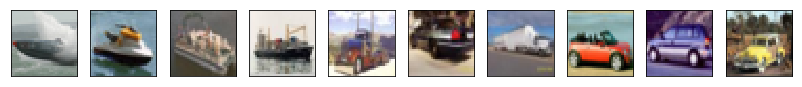

In [64]:
random.seed(654321)
ten_imgs_idx = random.choices(range(1000), k=10)


with np.load('cifar4-train.npz', allow_pickle=False) as data:
    train_data = dict(data.items())
    
pixel_tr, pixel_te = train_test_split(
    train_data['pixels'], train_size=4000, test_size=1000, random_state=0, stratify = train_data['labels'])

fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(14, 3))

for a, axis in enumerate(axes):
    axis.imshow(pixel_te[ten_imgs_idx[a]].reshape(32,32,3))
    axis.get_xaxis().set_visible(False) # disable x-axis
    axis.get_yaxis().set_visible(False)

In [90]:
preds = pipe_top.predict_proba(X_te[ten_imgs_idx])

C:\Users\jisnard.2015-JISNARD\Anaconda3\envs\exts-aml2\lib\site-packages\sklearn\linear_model\base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


In [91]:
prob_preds = pd.DataFrame(np.around(preds, decimals=2), columns=train_data['names'], 
                          index=['image {}'.format(i) for i in range(1, 11)])

prob_preds

,truck,car,airplane,ship
image 1,0.0,0.0,0.0,1.0
image 2,0.0,0.0,0.0,1.0
image 3,0.0,0.0,0.0,1.0
image 4,0.0,0.0,0.0,1.0
image 5,1.0,0.0,0.0,0.0
image 6,0.0,1.0,0.0,0.0
image 7,0.0,0.0,1.0,0.0
image 8,0.0,1.0,0.0,0.0
image 9,0.5,0.5,0.0,0.0
image 10,0.0,1.0,0.0,0.0


Only the long-white truck in image 7 is mislabeld among the highest probas. 

### Try with different regularization strengths. Write your observations.

In [130]:
### fit.transform once and for all X_tr with pca, to gain time
pca_top = PCA(n_components=np.int(logi_n_comp))
pca_top.fit(X_tr, y_tr)
X_tr_pca = pca_top.transform(X_tr)

for alpha in alphas: 
    logireg_reg_var = SGDClassifier(alpha = alpha, loss = 'log', max_iter=1000, 
                                    tol=1e-3, random_state=0, n_jobs=-1)
    
    logireg_reg_var.fit(X_tr_pca, y_tr)
    
    X_te_img_pca = pca_top.transform(X_te[ten_imgs_idx])
    preds = logireg_reg_var.predict_proba(X_te_img_pca)
    
    prob_preds = pd.DataFrame(np.around(preds, decimals=2), columns=train_data['names'], 
                          index=['image {}'.format(i) for i in range(1, 11)])
    
    print('Regularization = {}'.format(alpha))
    print(prob_preds, '\n\n')
    

C:\Users\jisnard.2015-JISNARD\Anaconda3\envs\exts-aml2\lib\site-packages\sklearn\linear_model\base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


Regularization = 0.0001
          truck  car  airplane  ship
image 1     0.0  0.0       0.0   1.0
image 2     0.0  0.0       0.0   1.0
image 3     0.0  0.0       0.0   1.0
image 4     0.0  0.0       0.0   1.0
image 5     1.0  0.0       0.0   0.0
image 6     0.0  1.0       0.0   0.0
image 7     0.0  0.0       0.5   0.5
image 8     0.0  1.0       0.0   0.0
image 9     0.0  1.0       0.0   0.0
image 10    0.0  1.0       0.0   0.0 


Regularization = 0.001
          truck  car  airplane  ship
image 1     0.0  0.0      0.00  1.00
image 2     0.0  0.0      0.00  1.00
image 3     0.0  0.0      0.00  1.00
image 4     0.0  0.0      0.00  1.00
image 5     1.0  0.0      0.00  0.00
image 6     0.0  1.0      0.00  0.00
image 7     0.0  0.0      0.39  0.61
image 8     0.0  1.0      0.00  0.00
image 9     0.0  1.0      0.00  0.00
image 10    0.0  1.0      0.00  0.00 


Regularization = 0.01
          truck   car  airplane  ship
image 1    0.00  0.00      0.00  1.00
image 2    0.00  0.00      0.00  1.

From scikit-learn documentation, we have:

    C : float, optional (default=1.0) Inverse of regularization strength;
    must be a positive float. Like in support vector machines, smaller
    values specify stronger regularization.
    
So, the bigger our alpha here, the smaller the regularization: we can indeed observe that the bigger the alpha, the smaller the regulariuaiton, hence the more indecisive the results from predict_proba() as the impact of all parameters is increased. 

### Export results

In [133]:
%store score_logi

Stored 'score_logi' (float64)


Getting there. 